In [1]:
import numpy
import tensorboard as tensorboard
import seaborn as seaborn
from tensorflow.python.client import device_lib
import tensorflow as tf
config = tf.compat.v1.ConfigProto(gpu_options = 
                         tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
# device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)
import os
import pandas as pd
import shap
import random
import numpy as np
import seaborn as sns
import csv
from skimage.util import random_noise
import time
import lime
from lime import lime_image
import sys
import grad_cam as grad
from importlib import reload
from skimage.segmentation import slic
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kr_helper_funcs as kr
print('tensorflow' + tf.__version__)
print('tensorboard' + tensorboard.__version__)
print('seaborn' + seaborn.__version__)
tf.config.list_physical_devices('GPU')
print(tf.test.is_built_with_cuda)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')
device_lib.list_local_devices()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

tensorflow2.2.0
tensorboard2.2.2
seaborn0.10.1
<function is_built_with_cuda at 0x00000210067C4430>
Num GPUs Available:  1


In [2]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [3]:
data_dir="../../input/pets"
test_path= os.path.join(data_dir, 'test')
train_path= os.path.join(data_dir, 'train')
os.listdir(test_path)

['cats', 'dogs']

In [4]:
image_shape =(224, 224, 3)
test_gen = ImageDataGenerator(rescale =1./255)
batch_size=32
test_image_gen= test_gen.flow_from_directory(test_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='binary',  shuffle=False)
test_image_gen.class_indices

Found 397 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

In [5]:
import shap
import numpy as np
X_test, _ = test_image_gen.next()
# background = X_test[np.random.choice(20, 10, replace=False)]
background = X_test[0:5]
# explain predictions of the model on three images
# e = shap.DeepExplainer(tf.keras.models.load_model('flowers'), background)

model =VGG16()
# tulip_image_path = test_path + '/tulip/' + os.listdir(test_path + '/tulip/')[5]
# tulip_image_path = test_path + '/cats/' + os.listdir(test_path + '/cats/')[5]
tulip_image_path = 'sample.png'
# plt.imshow(imread(dog_image))
img = image.load_img(tulip_image_path, target_size=(224, 224, 3))
# plt.imshow(imread(tulip_image_path))
img_orig = image.img_to_array(img)
# standardized_image = test_gen.standardize(img_orig)
# plt.imshow((standardized_image))

In [6]:
decode_predictions(model.predict(preprocess_input(np.expand_dims(img_orig.copy(), axis=0))))

[[('n02108089', 'boxer', 0.2350787),
  ('n02129604', 'tiger', 0.14950949),
  ('n02123159', 'tiger_cat', 0.12662995),
  ('n02108422', 'bull_mastiff', 0.09619654),
  ('n02109047', 'Great_Dane', 0.08623191)]]

tf.Tensor([[0.       0.       0.       ... 0.       5.933968 0.      ]], shape=(1, 25088), dtype=float32)
28


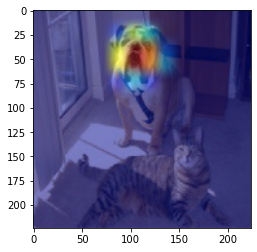

In [7]:
grad.test_drive_grad_original(img_orig, model)

In [8]:
os.listdir(test_path + '/cats/')

['00.jpg',
 '0001-0510-2619-5337.jpg',
 '0018-0412-2707-1542_SM.jpg',
 '013gatto_t.jpg',
 '016_gatto_b.jpg',
 '1016820907_0df38b5fcd.jpg',
 '1016831381_e2e4fc5542.jpg',
 '1016836647_2b9291bf51.jpg',
 '1016878327_e48012fb62.jpg',
 '1022505983_3ef93e328e.jpg',
 '1022510323_ab043cd5c6.jpg',
 '1023369448_c24479d6de.jpg',
 '1045005740_5b7500f3e4.jpg',
 '1050604083_c8e68bd8a0.jpg',
 '1054558482_8957be82b8.jpg',
 '1075677056_a36e3f8de1.jpg',
 '1089246094_32c3960726.jpg',
 '1095195491_5365d09db0.jpg',
 '1104532458_df10563131.jpg',
 '1106106131_ab6eb786da.jpg',
 '1107776596_52577aee0a.jpg',
 '112855917_0b79634ec6.jpg',
 '114428500_c2998b6c16.jpg',
 '119781563_d635f874ed.jpg',
 '1198120352_d384d8eea4.jpg',
 '1205647984_ab3647d770.jpg',
 '1207943166_cc80c6951d.jpg',
 '120px-Cat_odd-eye.jpg',
 '121063586_b2bba8c3ea.jpg',
 '122335635_5322e2d797.jpg',
 '123-2312_IMG.jpg',
 '123200130_5dd35b3153.jpg',
 '123740716_a6498ec3f1.jpg',
 '124245171_19da5bc00a.jpg',
 '124245174_2cb484506e.jpg',
 '124258127_6231a28c9c.jpg',
 '124259710_0fc64776d7.jpg',
 '1243745947_0042ae8da4.jpg',
 '1244802699_54ec5073b8.jpg',
 '1245305943_52195337b4.jpg',
 '124548137_5a80fda315.jpg',
 '124593939_7a1ca8a470.jpg',
 '124599905_6222154986.jpg',
 '124625934_6018339066.jpg',
 '124627315_b32c4db7e4.jpg',
 '124639486_0ec2315774.jpg',
 '125111548_bfe3efc168.jpg',
 '1255458139_a08e65cc34.jpg',
 '1255661117_ff3aa223f8.jpg',
 '126502160_fcf26bec6a.jpg',
 '1268388224_0b356cdb74.jpg',
 '126970702_f9b231ad0a.jpg',
 '1272723351_c098480747.jpg',
 '1273420794_685aa3d922.jpg',
 '1276806746_74ab2cd60b.jpg',
 '1279470165_ee90a43f47.jpg',
 '12cat.jpg',
 '1301159695_2143e61e7c.jpg',
 '1305782355_21a8656baf.jpg',
 '1305833784_1ca38f01a7.jpg',
 '1307107053_644bc42a0d.jpg',
 '1315854127_9541d5879d.jpg',
 '1318820172_ddd3e40f7c.jpg',
 '132074715_b3f67c1865.jpg',
 '132443502_9ddf7de47f.jpg',
 '1326327641_52c6fb282b.jpg',
 '1330064917_5370672de3.jpg',
 '1330961170_ebed8809c0.jpg',
 '1332852890_c60490d22e.jpg',
 '1341090543_4ffcd89729.jpg',
 '1350194792_e9cdedf176.jpg',
 '1352681371_6abb343f44.jpg',
 '135442563_d57f396110.jpg',
 '1355029319_c0b2975631.jpg',
 '1357499637_2513396e34.jpg',
 '136012344_1a1c1de6d7.jpg',
 '136012666_ff5ed97a00.jpg',
 '136013206_dc6764f192.jpg',
 '136013511_f16531f6d9.jpg',
 '136016826_3ee35179f8.jpg',
 '136104363_6ade4d4db9.jpg',
 '136841470_6414ff8558.jpg',
 '1368868314_02076f51cc.jpg',
 '1372025839_dfe22db56e.jpg',
 '1373255605_037d95f0c3.jpg',
 '1388838698_e08f2ec1d8.jpg',
 '1389644880_95e0545e6a.jpg',
 '139633900_117e3bdd25.jpg',
 '139731594_6bb33ed1b1.jpg',
 '1403508054_1bae7b6a74.jpg',
 '140829611_c9b8e199d8.jpg',
 '1408703815_b98ddaba6b.jpg',
 '141145745_bf0b09c38b.jpg',
 '1412126015_7446a60f6c.jpg',
 '141222666_20b04d59b7.jpg',
 '141222934_3e7c31a3d2.jpg',
 '141223368_6568791df3.jpg',
 '1413012442_1e1680ab74.jpg',
 '1413259576_60dc0d53c9.jpg',
 '1413743581_d5d0dad577.jpg',
 '1428673011_804c3f1502.jpg',
 '143274754_ba72bf10d0.jpg',
 '1436727743_94def376cb.jpg',
 '1437655096_400d7972af.jpg',
 '1438438371_2804fe9553.jpg',
 '1443298984_506a7ad123.jpg',
 '1447486978_6a91e465cc.jpg',
 '1449801588_75e51c77d1.jpg',
 '1456835745_a5f9496723.jpg',
 '1462511863_2ab9f216fd.jpg',
 '146472935_6b312e7ee4.jpg',
 '146499465_3b610fe427.jpg',
 '146500671_e9a6db5a8e.jpg',
 '146920643_77edefd1c6.jpg',
 '146920645_bfed2ab0e3.jpg',
 '1469373760_8e76da6673.jpg',
 '1472803782_c953e93531.jpg',
 '147332325_64a0fa0a99.jpg',
 '147496259_fa5733e1bb.jpg',
 '148058184_8caeb1e860.jpg',
 '1480705251_d59250a162.jpg',
 '148072778_571acb94ec.jpg',
 '148072779_9357c6a3b8.jpg',
 '1481563302_d7046eb1ee.jpg',
 '148225631_6c7956648d.jpg',
 '1489148881_0c51dc88dc.jpg',
 '149627959_eeb29cf855.jpg',
 '149783537_ba2990ade2.jpg',
 '150460634_29a4fc9caf.jpg',
 '151239486_f56db113af.jpg',
 '153092662_48d8e8947d.jpg',
 '180px-Norwegian_forest_cat.jpg',
 '180px-Patricinho.jpg',
 '200px-Six_weeks_old_cat_(aka)_edit.jpg',
 '224276449_2808abbca8.jpg',
 '229803161_efe2fea895.jpg',
 '234575293_291b025df1.jpg',
 '23

In [9]:
# segment the image so we don't have to explain every pixel
segments_slic = slic(img, n_segments=49, compactness=1000, sigma=3)

# define a function that depends on a binary mask representing if an image region is hidden
def mask_image(zs, segmentation, image, background=None):
    print((zs.shape[0], image.shape[0], image.shape[1], image.shape[2]))
    if background is None:
        background = image.mean((0,1))
    out = np.zeros((zs.shape[0], image.shape[0], image.shape[1], image.shape[2]))
    for i in range(zs.shape[0]):
        out[i,:,:,:] = image
        for j in range(zs.shape[1]):
            if zs[i,j] == 0:
                out[i][segmentation == j,:] = background
    return out
def f(z):
#     print("Call")
#     for i in z:
#         print (i)
#     print(img_orig.shape)

    return model.predict(preprocess_input(mask_image(z, segments_slic, img_orig.copy(), 255)))
#     return model.predict(mask_image(z, segments_slic, img_orig, 250))

# use Kernel SHAP to explain the network's predictions
explainer = shap.KernelExplainer(f, np.zeros((1,50)))
shap_values = explainer.shap_values(np.ones((1,50)) , nsamples=1000) # runs VGG16 1000 times

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.


(1, 224, 224, 3)


(1, 224, 224, 3)
(1000, 224, 224, 3)


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

In [10]:
# # use Kernel SHAP to explain the network's predictions
# explainer = shap.KernelExplainer(f, np.zeros((1,50)))
# shap_values = explainer.shap_values(np.ones((1,50)) , nsamples=1000) # runs VGG16 1000 times

In [11]:
list(test_image_gen.class_indices.keys())

['cats', 'dogs']

In [12]:
# get the top predictions from the model
preds = model.predict(preprocess_input(np.expand_dims(img.copy(), axis=0)))
top_preds = np.argsort(-preds)

In [13]:
decode_predictions(model.predict(preprocess_input(np.expand_dims(img.copy(), axis=0))))

[[('n02108089', 'boxer', 0.2350787),
  ('n02129604', 'tiger', 0.14950949),
  ('n02123159', 'tiger_cat', 0.12662995),
  ('n02108422', 'bull_mastiff', 0.09619654),
  ('n02109047', 'Great_Dane', 0.08623191)]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


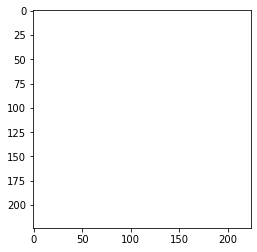

In [14]:
plt.imshow((np.expand_dims(img_orig.copy(), axis=0))[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


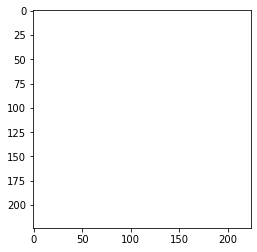

In [15]:
plt.imshow(img_orig.copy())

In [16]:
# make a color map
from matplotlib.colors import LinearSegmentedColormap
colors = []
for l in np.linspace(1,0,100):
    colors.append((245/255,39/255,87/255,l))
for l in np.linspace(0,1,100):
    colors.append((24/255,196/255,93/255,l))
cm = LinearSegmentedColormap.from_list("shap", colors)

In [17]:
len(shap_values)

1000

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.


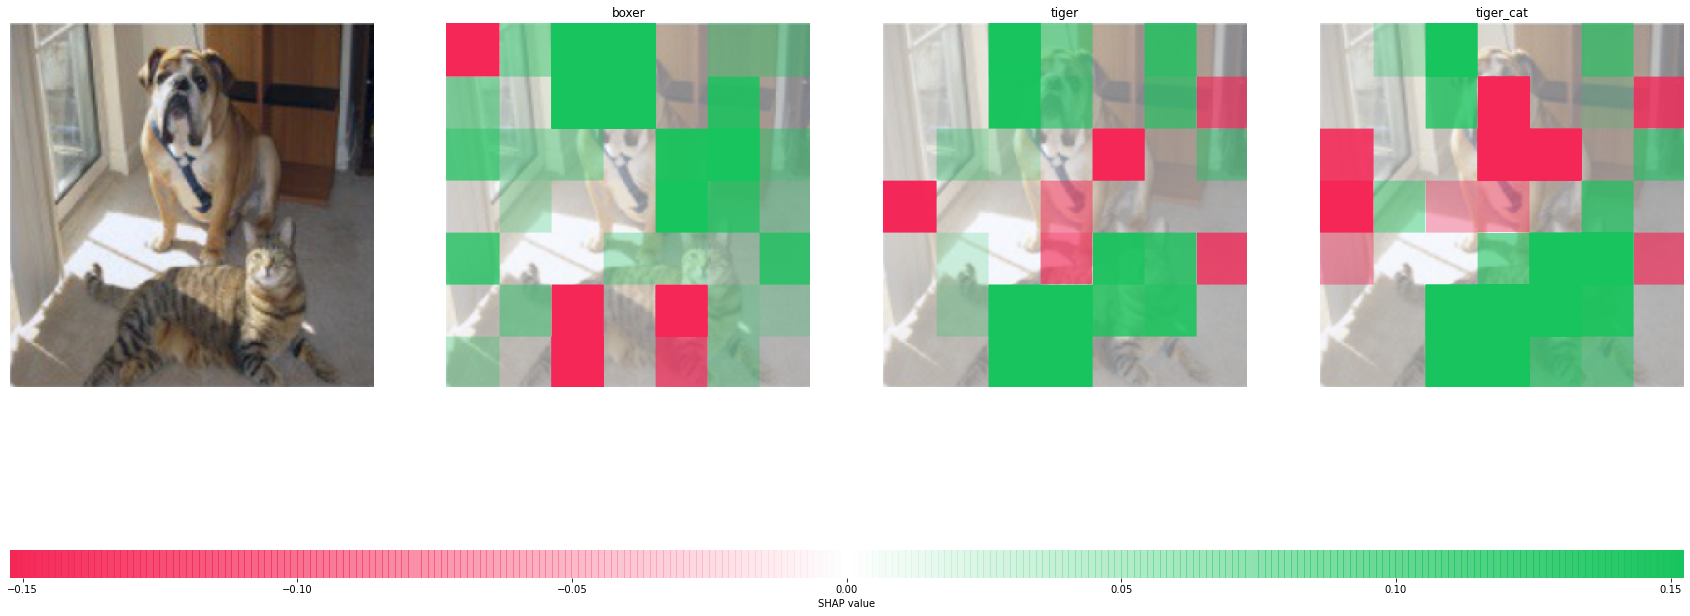

In [18]:
def fill_segmentation_original(values, segmentation):
    out = np.zeros(segmentation.shape)
    for i in range(len(values)):
        out[segmentation == i] = values[i] *10
    return out

import requests
r = requests.get('https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json')
feature_names = r.json()
def show_explanation(shap_values, img, inds):
#     img = Image.fromarray(img)

    segments_slic = slic(img, n_segments=49, compactness=1000, sigma=3)
    # plot our explanations
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30,20)) 
    axes[0].imshow(img)
    axes[0].axis('off')
    max_val = np.max([np.max(np.abs(shap_values[i][:,:-1])) for i in range(len(shap_values))])
    for i in range(3):
        m = fill_segmentation_original(shap_values[inds[i]][0], segments_slic)
        axes[i+1].set_title(feature_names[str(inds[i])][1])
        axes[i+1].imshow(img, alpha=0.5)
        im = axes[i+1].imshow(m, cmap=cm, vmin=-max_val, vmax=max_val)
        axes[i+1].axis('off')
    cb = fig.colorbar(im, ax=axes.ravel().tolist(), label="SHAP value", orientation="horizontal", aspect=60)
    cb.outline.set_visible(False)
    plt.show()
show_explanation(shap_values, img, top_preds[0])

In [19]:
list(test_image_gen.class_indices.keys())

['cats', 'dogs']

In [20]:
# def extract_top_ten(shap_values, num_features=10):
#     new_shap_values=[]
#     for values in shap_values:
#         shap_list = list(set([item for sublist in values for item in sublist]))
#         shap_list.sort(reverse=True)
#         shap_list = shap_list[:num_features]
#         new_values = [numpy.asarray([a if a in shap_list else 0 for a in l]) for l in values] # filter out negative values and keep top 10
#         new_shap_values.append(new_values)
#     shap_values = numpy.asarray(new_shap_values)
#     return shap_values

# def predict_fn(x):
#     preds = model.predict(x)
#     p0 = 1 - preds
#     return np.hstack((p0, preds))

# def show_cut_image(shap_values, img_orig, num_features=10):
# # segment the image so we don't have to explain every pixel
#     segments_slic = slic(img_orig, n_segments=49, compactness=30, sigma=3)

#     # define a function that depends on a binary mask representing if an image region is hidden
#     def mask_image(zs, segmentation, image, background=None):
#         if background is None:
#             background = image.mean((0,1))
#         out = np.zeros((zs.shape[0], image.shape[0], image.shape[1], image.shape[2]))
#         for i in range(zs.shape[0]):
#             out[i,:,:,:] = image
#             for j in range(zs.shape[1]):
#                 if zs[i,j] == 0:
#                     out[i][segmentation == j,:] = background
#         return out
# #     def f(z):
# #         for img in mask_image(z, segments_slic, img_orig, 250):
# #             plt.imshow(img)
# #             plt.show()
# #         print(model.predict(mask_image(z, segments_slic, img_orig, 250)))
# #         return model.predict((mask_image(z, segments_slic, img_orig, 250)))

#     # # use Kernel SHAP to explain the network's predictions
# #     explainer = shap.KernelExplainer(f, np.zeros((1,50)))
# #     shap_values = explainer.shap_values(np.ones((1,50)), nsamples=1000) # runs model 1000 times

#     shap_values = extract_top_ten(shap_values, num_features)

#     # get the top predictions from the model
#     preds = predict_fn((np.expand_dims(img_orig.copy(), axis=0)))
#     top_preds = np.argsort(-preds)

#     # make a color map
#     from matplotlib.colors import LinearSegmentedColormap
#     colors = []
#     for l in np.linspace(1,0,100):
#         colors.append((0.2,0.2,0.2,l))
#     for l in np.linspace(0,1,100):
#         colors.append((0.5,0.5,0.5,l))
#     cm = LinearSegmentedColormap.from_list("shap", colors)

#     def fill_segmentation(values, segmentation):
#         out = np.zeros(segmentation.shape)
#         for i in range(len(values)):
#             out[segmentation == i] = 0 if values[i]> 0 else values[i]+0.5
#         return out

#     # plot our explanations
#     fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,20))
#     inds = top_preds[0]
#     axes[0].imshow(img_orig)
#     axes[0].axis('off')
#     max_val = np.max([np.max(np.abs(shap_values[i][:,:-1])) for i in range(len(shap_values))])
#     for i in range(2):
#         m = fill_segmentation(shap_values[inds[i]][0], segments_slic)
#         axes[i+1].set_title(str(list(test_image_gen.class_indices.keys())[inds[i]]))
#         axes[i+1].imshow(img_orig)
#         im = axes[i+1].imshow(m, cmap=cm, vmin=-max_val, vmax=max_val)
#         plt.savefig('foo.png')
#         axes[i+1].axis('off')
#     cb = fig.colorbar(im, ax=axes.ravel().tolist(), label="SHAP value", orientation="horizontal", aspect=60)
#     cb.outline.set_visible(False)
#     plt.show()
    
# show_cut_image(shap_values, img_orig)

In [21]:
np.argsort(-preds)

array([[242, 292, 282, 243, 246, 172, 247, 254, 225, 676, 180, 251, 159,
        238, 163, 235, 208, 162, 383, 164, 248, 537, 249, 234, 168, 174,
        179, 166, 281, 789, 253, 250, 799, 534, 245, 285, 171, 273, 182,
        236, 227, 209, 161, 239, 241, 151, 202, 173, 539, 244, 287, 170,
        212, 290, 286, 262, 167, 255, 176, 371, 240, 207, 382, 198, 264,
        427, 195, 169, 210, 257, 158, 230, 196, 380, 215, 275, 805, 852,
        204, 729, 155, 384, 421, 753, 651, 434, 811, 178, 184, 882, 165,
        269, 311, 200, 191, 312, 156, 237, 177, 263, 293, 999, 568, 211,
        201, 897, 793, 160, 861, 430, 733, 288, 840, 105, 894, 217, 377,
        921, 104, 222, 276, 904, 299, 260, 154, 770, 910, 428, 218, 765,
        197, 271,  61, 535, 743, 231, 665, 905, 435, 340, 491, 519, 193,
        700, 747, 291, 381, 370, 463, 543,  10, 740, 517, 876, 863, 731,
        577, 188, 272, 284, 691, 561, 219, 194, 189, 786, 603, 450, 760,
        476, 851, 289,  62, 214, 791, 118, 706, 697

In [22]:
shap_values

[array([[ 0.00000000e+00, -2.92056210e-06, -1.92557320e-05,
         -6.00728029e-06,  0.00000000e+00, -4.98318145e-06,
         -8.69385292e-06, -1.46419675e-05, -1.11483441e-05,
         -5.88050472e-06,  0.00000000e+00,  0.00000000e+00,
         -1.94952083e-05, -7.69053069e-06,  0.00000000e+00,
         -8.14267083e-06, -2.00226542e-05, -5.75313243e-06,
         -1.18418483e-05, -8.07210483e-06, -6.66596975e-06,
          0.00000000e+00, -3.66598337e-06, -9.09835637e-06,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -1.51285554e-05, -1.20103119e-05,
          0.00000000e+00, -8.87536575e-06,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -4.84488204e-06,  0.00000000e+00, -3.18090807e-06,
          0.00000000e+00,  0.00000000e+00, -1.10264221e-05,
         -1.12582838e-05,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -7.17261194e-06,
          0.00000000e+00,  0.00000000e+00]]),
 array([[ 0.00000000e+00, -4.27128069e-06, -1.74077463e-05,
         -7.66892817e-06,  0.00000000e+00,  0.00000000e+00,
         -5.67721300e-06, -1.91710814e-05, -1.43253331e-05,
         -5.05716845e-06, -3.06119131e-06,  0.00000000e+00,
         -1.85742247e-05, -1.35203322e-05,  0.00000000e+00,
         -1.17976109e-05, -2.73699379e-05, -1.30964400e-05,
         -1.89938579e-05, -8.71073601e-06, -7.65968025e-06,
         -5.64155220e-06, -5.05605623e-06, -8.83500671e-06,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -1.81083211e-05, -1.14313492e-05,
          0.00000000e+00, -8.13511986e-06, -4.79733567e-06,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -5.45499791e-06,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -1.11037480e-05, -9.79466121e-06,
         -1.35090426e-05,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -1.27497574e-05,
          0.00000000e+00,  0.00000000e+00]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]]),
 array([[ 0.00000000e+00,  0.00000000e+00, -2.09848512e-05,
         -1.70228282e-05, -1.45961104e-05, -1.26030762e-05,
         -1.17411037e-05,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -1.93148458e-05,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -1.93763379e-05,  0.00000000e+00,
         -1.33265277e-05, -1.61903401e-05,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -1.31709630e-05,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00]]),
 array([[ 0.00000000e+00,  0.00000000e+00, -3.07871965e-05,
         -1.61623185e-05, -3.26327701e-05, -1.20874477e-05,
         -2.06731839e-05, -1.85126657e-05, -1.75364828e-05,
         -1.16728302e-05, -1.04535018e-05, -5.63574389e-06,
         -2.20158272e-05, -1.65629058e-05,  0.00000000e+00,
         -7.99972029e-06, -1.47901109e-05,  0.00000000e+00,
         -8.20984723e-06, -1.87441651e-05,  0.00000000e+00,
         -1.99842673e-05,  0.00000000e+00, -9.53203464e-06,
         -9.29045632e-06,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -1.86076014e-05,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -4.67867137e-06,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+0

In [37]:
# make a color map
# reload(grad)

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
import cv2


# colors = []
# for l in np.linspace(1,0,100):
#     colors.append((0,0,0,l))
# for l in np.linspace(0,1,100):
#     colors.append((0,0,0,l))
# cm = LinearSegmentedColormap.from_list("shap", colors)

colors = []
for l in np.linspace(1,0,100):
    colors.append((245/255,39/255,87/255,l))
for l in np.linspace(0,1,100):
    colors.append((24/255,196/255,93/255,l))
cm = LinearSegmentedColormap.from_list("shap", colors)

def convert_to_shap_values(heatmap, verbose = 0):
    plt.matshow(heatmap)
    plt.axis('off')
    plt.margins(0,0)
    # cb = fig.colorbar(im, ax=axes.ravel().tolist(), label="SHAP value", orientation="horizontal", aspect=60)
    # cb.outline.set_visible(False)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig("heatmap.png", bbox_inches = 'tight',pad_inches = 0)
    plt.close()
#     img = image.load_img("heatmap.png", target_size=(7, 7, 1))
    
    fname = 'heatmap.png'
    image = Image.open(fname).convert("L")
    image.thumbnail((7,7))
    arr = np.asarray(image)
    if verbose:
        plt.imshow(arr, vmin=0, vmax=255)
        plt.show()
#     print(arr)
    
    shap_values = []
    for i in range (1000):
            shap_values.append([[item for sublist in arr for item in sublist]])
    shap_values = np.array(shap_values)
    shap_values = shap_values/np.max(shap_values)
#     print(shap_values)
    return shap_values

def extract_top_ten(shap_values, num_features=10):
    new_shap_values=[]
    for values in shap_values:
        shap_list = list(set([item for sublist in values for item in sublist]))
        shap_list.sort(reverse=True)
        shap_list = shap_list[:num_features]
        new_values = [numpy.asarray([1 if a in shap_list else 0 for a in l]) for l in values] # filter out negative values and keep top 10
        new_shap_values.append(new_values)
    shap_values = numpy.asarray(new_shap_values)
    return shap_values


def extract_top_ten(shap_values, num_features=10):
    shap_values_new = shap_values.copy()
    
    for values in shap_values_new:
        indices_of_features_to_zero = values[0].argsort()[:-num_features]
        values[0][indices_of_features_to_zero] = 0

    return shap_values_new

def extract_top_ten1(shap_values, num_features=10):
    new_shap_values=[]
    for values in shap_values:
        shap_list = sorted(enumerate(item for sublist in values for item in sublist), key=lambda t: t[1], ascending=False)
        shap_list.sort(reverse=True)
        shap_list = shap_list[:num_features]
        new_values = [numpy.asarray([1 if a in shap_list else 0 for a in l]) for l in values] # filter out negative values and keep top 10
        new_shap_values.append(new_values)
    shap_values = numpy.asarray(new_shap_values)
    return shap_values


def init_csv(explainer_name):
    model_name = "pets"
    newrows_filename =  "{}_{}_rows.csv".format(model_name, explainer_name, model_name)
#     newrows_filename =  "{}-values.csv".format(model_name)
    if os.path.exists(newrows_filename):
        os.remove(newrows_filename)

    with open(newrows_filename, 'a', newline='') as fd:
        writer = csv.writer(fd)
        header = ["original_class", "original_probability", "new_probability",
                  "confidence_diff","class_change", "new_class",
                  "explainer","strategy", "sigma", "time", "num_features"]
        writer.writerow(header)

def save_row(original_class, original_probability, new_probability, confidence_diff ,class_change, new_class, explainer,strategy, sigma, time, num_features):
    model_name = "pets"
    fileName =  "{}_{}_rows.csv".format(model_name, explainer, model_name)
#     fileName =  "{}-values.csv".format(model_name)
    with open(fileName, 'a', newline='') as fd:
        writer = csv.writer(fd)
        result = [original_class, original_probability, new_probability, confidence_diff,class_change, new_class, explainer,strategy, sigma, time, num_features]
        writer.writerow(result)
        
# def fill_segmentation(values, segmentation, keep_top):
#         out = np.zeros((segmentation.shape))
#         for i in range(len(values)):
#             if keep_top:
#                 out[segmentation == i] = 0 if values[i]> 0 else 1
#             else:
#                 out[segmentation == i] = 1 if values[i]> 0 else 0
#         return out

    # define a function that depends on a binary mask representing if an image region is hidden
def mask_image(zs, segmentation, image, background=None):
    if background is None:
        background = image.mean((0,1))
    out = np.zeros((zs.shape[0], image.shape[0], image.shape[1], image.shape[2]))
    for i in range(zs.shape[0]):
        out[i,:,:,:] = image
        for j in range(zs.shape[1]):
            if zs[i,j] == 0:
                out[i][segmentation == j,:] = background
    return out

def mask_image_with_noise(zs, segmentation, image, sigma):
    out = np.zeros((zs.shape[0], image.shape[0], image.shape[1], image.shape[2]))
    mask= np.zeros((zs.shape[0], image.shape[0], image.shape[1], image.shape[2]))
    for i in range(zs.shape[0]):
        out[i,:,:,:] = image
        mask[i,:,:,:] = random_noise(image/255, mode='gaussian', seed=42, var=sigma**2) *255 # tf.keras.preprocessing.image.img_to_array(random_noise(image))
        plt.imshow(mask[i,:,:,:])
        for j in range(zs.shape[1]):
            if zs[i,j] == 0:
                out[i][segmentation == j,:] = mask[i][segmentation == j,:]
    return out

def f_lime(z):
    return model.predict(preprocess_input(z.copy()))

prev_shap_values=None
prev_img_orig =None
prev_explanation = None
def calculate_predictions(img, img_orig, original_class_position, explainer_name, num_features, strategy, sigma, verbose = 0):
    # segment the image so we don't have to explain every pixel
    segments_slic = slic(img, n_segments=49, compactness=1000, sigma=3)
   
    def f(z):
        return model.predict(preprocess_input(mask_image(z, segments_slic, img_orig.copy(), 255)))
    
    new_class_lime = None
    new_prediction_lime = None
    global prev_shap_values
    global prev_img_orig
    global prev_explanation
    if ((explainer_name =='shap' or explainer_name =='random' or explainer_name =='grad') & (img_orig == prev_img_orig).all()):
        print ("Hitting cache, returning prev values")
        shap_values = prev_shap_values
    elif explainer_name =='shap':
        # use Kernel SHAP to explain the network's predictions
        explainer = shap.KernelExplainer(f, np.zeros((1,49)), start_label=1)
        shap_values = explainer.shap_values(np.ones((1,49)), nsamples=1000, start_label=1) # runs model 1000 times
    elif explainer_name =='grad':
        heatmap_orig = grad.make_gradcam_heatmap(img_orig.copy().reshape(1,224, 224, 3), model)
        heatmap =  cv2.resize(heatmap_orig, (7, 7))

        if verbose:
            plt.imshow(heatmap_orig)
            plt.show()
            plt.imshow(heatmap)
            plt.show()
            grad.test_drive_grad_original(img_orig, model)
        shap_values = []
        for i in range(1000):
            shap_values.append([[item for sublist in heatmap for item in sublist]])
        shap_values = np.array(shap_values)
        shap_values = shap_values / np.max(shap_values)
        
    elif explainer_name =='random':
        shap_values =[numpy.asarray([[random.uniform(0,1)  for iter in range(50)]]) for i in range(1000)]
    elif explainer_name == 'lime':
        if ((img_orig == prev_img_orig).all()):
            explanation = prev_explanation
            print ("Hitting LIME cache, returning prev values")
        else :
            explainer = lime_image.LimeImageExplainer()
            explanation = explainer.explain_instance(img_orig.astype("double"), f_lime, num_samples = 1000)
            prev_explanation = explanation
            prev_img_orig =img_orig
        
        print (explanation.top_labels)
        print(original_class_position)
#         if strategy == "top":
#             lime_img, _ = explanation.get_image_and_mask(explanation.top_labels[0] , positive_only=True, negative_only=False, hide_rest=True, num_features = num_features, min_weight=0)
#         else:
#             lime_img, _ = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, negative_only=True, num_features=1000, hide_rest=True)
#         new_class_lime = model.predict_classes(lime_img.reshape(1,224,224,3))[0]
#         new_prediction_lime = model.predict(preprocess_input(mask_image(z, segments_slic, img_orig.copy(), 255)))
        
        lime_img, mask = explanation.get_image_and_mask(explanation.top_labels[0] , positive_only=True, negative_only=False, hide_rest=True, num_features = num_features, min_weight=0)
        heatmap = cv2.resize(mask/255, (7, 7), interpolation=cv2.INTER_AREA )
        
        if verbose :
            plt.matshow(lime_img/255)
            plt.show()
            plt.matshow(mask)
            plt.show()
            plt.matshow(heatmap)
            plt.show()
        
        shap_values = []
        for i in range (1000):
            shap_values.append([[item for sublist in heatmap for item in sublist]])
        shap_values = np.array(shap_values)
        shap_values = shap_values

    
    prev_shap_values=shap_values.copy()
    prev_img_orig =img_orig.copy()
    # get the top predictions from the model
    preds = model.predict(preprocess_input(np.expand_dims(img_orig.copy(), axis=0)))
    top_preds = np.argsort(-preds)
    inds = top_preds[0]

#     if verbose:
#         show_explanation(shap_values, img, inds)
    
    shap_values = [np.where(a<0, 0, a) for a in shap_values]
    shap_values = extract_top_ten(shap_values, num_features)
    
    if strategy == 'top':
        new_shap_values = shap_values.copy()
        for values in new_shap_values:
            zeros_index = values == 0
            values[zeros_index] = 1
            values[~zeros_index] = 0
        shap_values = new_shap_values
    
    
    
    masked_image = mask_image_with_noise(shap_values[inds[0]], segments_slic, img_orig.copy(), sigma)[0]
    
    if verbose:
        plt.imshow((masked_image).astype(np.uint8))
        plt.show()
    
    prediction = model.predict(preprocess_input(np.expand_dims(masked_image.copy(), axis=0)))
    new_class  = decode_predictions(prediction)[0][0][1]
    new_prediction = prediction[0][original_class_position]
    
    if verbose:
        for pred in decode_predictions(prediction, 1000)[0]:
            if (pred[2] == new_prediction):
                print (pred)
    
    return new_class, new_prediction, new_class_lime, new_prediction_lime
    

def start(explainer_name, num_features_list, verbose = 0):
    counter = 0
#     for i in range(len(test_image_gen)):
#         batch = test_image_gen[i]
#         for j in range(len(batch[0])):
    data_dir="../../input/vgg-catsdogs/"
    for i in os.listdir(data_dir):
#         img = batch[0][j]
        image_path= data_dir  +i
        img = image.load_img(image_path, target_size=(224, 224, 3))
        img_orig = image.img_to_array(img)
        pred = model.predict(preprocess_input(np.expand_dims(img_orig.copy(), axis=0)))
        original_class_position = np.argmax(pred[0])
        prediction = decode_predictions(pred)[0][0]
        original_class = prediction[1]
        original_confidence = prediction[2]
#         print(original_class)
        if original_confidence>0.9 and counter <100 :
            counter = counter + 1
            print(image_path)
            if verbose:
                plt.imshow((img))
                plt.show()
                plt.close()
            for num_features in num_features_list:
                for strategy in ["top", "rest"]:
                    for sigma in [1]:
                        start_time = time.time()
                        new_class, new_prediction, _, _ = calculate_predictions(img, img_orig, original_class_position, explainer_name, num_features, strategy, sigma, verbose)
                        total_time = time.time() - start_time
                        print ("Explainer name: {} Image number: {} num_features {} strategy {}".format(explainer_name, counter, num_features, strategy))
                        print ("Original Class: {} original confidence:{} new class top:{} new confidence {}: {} "
                               .format(original_class, original_confidence, new_class, strategy, new_prediction) )

                        save_row(original_class, original_confidence, new_prediction,original_confidence - new_prediction ,original_class != new_class, new_class, explainer_name, strategy, sigma, total_time, num_features)

verbose= 0
for explainer_name in ["random"]:
# for explainer_name in [ "lime"]:
# for explainer_name in [sys.argv[1]]:
    init_csv(explainer_name)
    start(explainer_name, list(range(1,21)), verbose)


../../input/vgg-catsdogs/cat.10000.jpg


skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.


Explainer name: random Image number: 1 num_features 1 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Egyptian_cat new confidence top: 0.9843222498893738 
Hitting cache, returning prev values


Explainer name: random Image number: 1 num_features 1 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:jigsaw_puzzle new confidence rest: 0.00036814980558119714 
Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 2 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Egyptian_cat new confidence top: 0.9748274683952332 
Hitting cache, returning prev values


Explainer name: random Image number: 1 num_features 2 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:birdhouse new confidence rest: 1.3875050171918701e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 3 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Egyptian_cat new confidence top: 0.9823579788208008 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 3 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:birdhouse new confidence rest: 6.779189334338298e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 4 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Egyptian_cat new confidence top: 0.9745103120803833 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 4 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:birdhouse new confidence rest: 6.03515445618541e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 5 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Egyptian_cat new confidence top: 0.9679356813430786 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 5 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:birdhouse new confidence rest: 6.324531113932608e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 6 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Egyptian_cat new confidence top: 0.9014637470245361 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 6 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:birdhouse new confidence rest: 2.064544787572231e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 7 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Egyptian_cat new confidence top: 0.7866643071174622 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 7 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:birdhouse new confidence rest: 1.4359613942360738e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 8 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Egyptian_cat new confidence top: 0.7691338062286377 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 8 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:birdhouse new confidence rest: 2.682083277250058e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 9 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Egyptian_cat new confidence top: 0.6813457012176514 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 9 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:birdhouse new confidence rest: 5.479023457155563e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 10 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Egyptian_cat new confidence top: 0.5985587239265442 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 10 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:birdhouse new confidence rest: 1.2999963473703247e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 11 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Egyptian_cat new confidence top: 0.5386940240859985 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 11 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:birdhouse new confidence rest: 1.9114344468107447e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 1 num_features 12 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Egyptian_cat new confidence top: 0.5861120223999023 
Hitting cache, returning prev values


Explainer name: random Image number: 1 num_features 12 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:apron new confidence rest: 5.508279718924314e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 1 num_features 13 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Egyptian_cat new confidence top: 0.28826630115509033 
Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 13 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:birdhouse new confidence rest: 4.1663384763523936e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 1 num_features 14 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Christmas_stocking new confidence top: 0.2204451709985733 
Hitting cache, returning prev values


Explainer name: random Image number: 1 num_features 14 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:apron new confidence rest: 4.8062520363600925e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 1 num_features 15 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Siamese_cat new confidence top: 0.0982404425740242 
Hitting cache, returning prev values


Explainer name: random Image number: 1 num_features 15 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:apron new confidence rest: 0.00016447024245280772 
Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 16 strategy top


Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Siamese_cat new confidence top: 0.10016203671693802 
Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 16 strategy rest


Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Persian_cat new confidence rest: 0.013012190349400043 
Hitting cache, returning prev values


Explainer name: random Image number: 1 num_features 17 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Siamese_cat new confidence top: 0.08487248420715332 
Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 17 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Persian_cat new confidence rest: 0.020162910223007202 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 18 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Siamese_cat new confidence top: 0.09005431085824966 
Hitting cache, returning prev values


Explainer name: random Image number: 1 num_features 18 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Persian_cat new confidence rest: 0.03164634108543396 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 19 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Siamese_cat new confidence top: 0.09844970703125 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 19 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Persian_cat new confidence rest: 0.05030566826462746 


Hitting cache, returning prev values
Explainer name: random Image number: 1 num_features 20 strategy top
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:jigsaw_puzzle new confidence top: 0.019020026549696922 
Hitting cache, returning prev values


Explainer name: random Image number: 1 num_features 20 strategy rest
Original Class: Egyptian_cat original confidence:0.976787269115448 new class top:Egyptian_cat new confidence rest: 0.1248445063829422 


../../input/vgg-catsdogs/cat.10005.jpg


Explainer name: random Image number: 2 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:Siamese_cat new confidence top: 0.6903282999992371 
Hitting cache, returning prev values


Explainer name: random Image number: 2 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:birdhouse new confidence rest: 5.332445653039031e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.0926833301782608 


Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:birdhouse new confidence rest: 3.499686499708332e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.013931033201515675 


Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:birdhouse new confidence rest: 1.444530971639324e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 2 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.023567285388708115 
Hitting cache, returning prev values


Explainer name: random Image number: 2 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:birdhouse new confidence rest: 1.6417874348917394e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.08064346015453339 


Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:birdhouse new confidence rest: 1.9561496173992055e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.046007148921489716 


Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:birdhouse new confidence rest: 1.4650554476247635e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.008811368606984615 
Hitting cache, returning prev values


Explainer name: random Image number: 2 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:birdhouse new confidence rest: 2.3719472665106878e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 2 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.01886514388024807 
Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:apron new confidence rest: 9.954549022950232e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.07770497351884842 
Hitting cache, returning prev values


Explainer name: random Image number: 2 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:apron new confidence rest: 7.886504317866638e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.023217160254716873 


Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:apron new confidence rest: 0.00011497364175738767 
Hitting cache, returning prev values


Explainer name: random Image number: 2 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.036553334444761276 
Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 11 strategy rest


Original Class: Siamese_cat original confidence:0.960754930973053 new class top:apron new confidence rest: 3.528258457663469e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.023452717810869217 


Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:apron new confidence rest: 2.6164427254116163e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 2 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.01460692472755909 
Hitting cache, returning prev values


Explainer name: random Image number: 2 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:apron new confidence rest: 4.139808515901677e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.010997612029314041 


Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:apron new confidence rest: 2.3172495275503024e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:standard_poodle new confidence top: 0.007406644057482481 


Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:apron new confidence rest: 9.88325791695388e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 2 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.005411192309111357 
Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:apron new confidence rest: 1.3358913747651968e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.003383856499567628 
Hitting cache, returning prev values


Explainer name: random Image number: 2 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:apron new confidence rest: 1.9407536456128582e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.006364213302731514 


Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:apron new confidence rest: 1.1856262972287368e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 2 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.010444093495607376 
Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:apron new confidence rest: 3.2616582757327706e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 2 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:keeshond new confidence top: 0.012073665857315063 
Hitting cache, returning prev values
Explainer name: random Image number: 2 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.960754930973053 new class top:apron new confidence rest: 4.100086516700685e-05 


../../input/vgg-catsdogs/cat.1004.jpg
Explainer name: random Image number: 3 num_features 1 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.9863919019699097 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 1 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:maze new confidence rest: 0.0009028618806041777 
Hitting cache, returning prev values


Explainer name: random Image number: 3 num_features 2 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.9806463718414307 
Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 2 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:maze new confidence rest: 0.0009111312101595104 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 3 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.9651200175285339 
Hitting cache, returning prev values


Explainer name: random Image number: 3 num_features 3 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:jigsaw_puzzle new confidence rest: 0.0008339685155078769 
Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 4 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.9766275882720947 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 4 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:maze new confidence rest: 0.00035573021159507334 
Hitting cache, returning prev values


Explainer name: random Image number: 3 num_features 5 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.9887303709983826 
Hitting cache, returning prev values


Explainer name: random Image number: 3 num_features 5 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:birdhouse new confidence rest: 0.00019853591220453382 
Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 6 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.980695903301239 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 6 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:birdhouse new confidence rest: 0.00048821987002156675 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 7 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.9659445285797119 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 7 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:birdhouse new confidence rest: 0.003383918898180127 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 8 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.9719955325126648 
Hitting cache, returning prev values


Explainer name: random Image number: 3 num_features 8 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:birdhouse new confidence rest: 0.0027810672763735056 
Hitting cache, returning prev values


Explainer name: random Image number: 3 num_features 9 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.9529150128364563 
Hitting cache, returning prev values


Explainer name: random Image number: 3 num_features 9 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:jigsaw_puzzle new confidence rest: 0.003124054754152894 
Hitting cache, returning prev values


Explainer name: random Image number: 3 num_features 10 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.9492400288581848 
Hitting cache, returning prev values


Explainer name: random Image number: 3 num_features 10 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:jigsaw_puzzle new confidence rest: 0.006697931792587042 
Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 11 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.8978524208068848 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 11 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:jigsaw_puzzle new confidence rest: 0.0028140838257968426 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 12 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.8861189484596252 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 12 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:triceratops new confidence rest: 0.0007847609813325107 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 13 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.8855507373809814 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 13 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:triceratops new confidence rest: 0.00038872825098223984 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 14 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.8815038800239563 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 14 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:starfish new confidence rest: 0.0005454677157104015 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 15 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.8845025300979614 
Hitting cache, returning prev values


Explainer name: random Image number: 3 num_features 15 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:starfish new confidence rest: 0.001136226230300963 
Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 16 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.9054845571517944 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 16 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:starfish new confidence rest: 0.0008125767344608903 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 17 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.8524280190467834 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 17 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:jigsaw_puzzle new confidence rest: 0.008113508112728596 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 18 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.7318924069404602 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 18 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:jigsaw_puzzle new confidence rest: 0.04059915617108345 
Hitting cache, returning prev values


Explainer name: random Image number: 3 num_features 19 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.6914229393005371 
Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 19 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:jigsaw_puzzle new confidence rest: 0.04851074516773224 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 20 strategy top
Original Class: quilt original confidence:0.9760070443153381 new class top:quilt new confidence top: 0.5969750881195068 


Hitting cache, returning prev values
Explainer name: random Image number: 3 num_features 20 strategy rest
Original Class: quilt original confidence:0.9760070443153381 new class top:jigsaw_puzzle new confidence rest: 0.04536427557468414 


../../input/vgg-catsdogs/cat.10061.jpg
Explainer name: random Image number: 4 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.9995224475860596 


Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:barn new confidence rest: 0.00019825859635602683 


Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.9996390342712402 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:birdhouse new confidence rest: 0.0005335794994607568 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.9996812343597412 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:birdhouse new confidence rest: 0.00028699138783849776 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.9989232420921326 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:birdhouse new confidence rest: 0.00020474813936743885 
Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 5 strategy top


Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.9986159801483154 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:birdhouse new confidence rest: 0.00030900389538146555 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.997871994972229 
Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:birdhouse new confidence rest: 0.0002313834265805781 


Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.9186524748802185 


Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:apron new confidence rest: 0.0002204463235102594 


Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.9139786958694458 


Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:apron new confidence rest: 0.00018026272300630808 


Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.9364161491394043 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:apron new confidence rest: 0.00034574937308207154 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.7604283094406128 
Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:shovel new confidence rest: 0.00035855313763022423 


Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.7590024471282959 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:apron new confidence rest: 0.012983696535229683 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.734847903251648 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:apron new confidence rest: 0.007485868409276009 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.7403256297111511 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:apron new confidence rest: 0.003009697888046503 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.7432475090026855 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:apron new confidence rest: 0.007110697217285633 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.6211954355239868 
Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:apron new confidence rest: 0.005869873333722353 


Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.7056781649589539 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:apron new confidence rest: 0.0023356915917247534 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.7846633195877075 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:apron new confidence rest: 0.0014568044571205974 
Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.8400350213050842 


Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:apron new confidence rest: 0.000525873911101371 


Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.9571608304977417 
Hitting cache, returning prev values


Explainer name: random Image number: 4 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:apron new confidence rest: 0.0012686625123023987 
Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:Siamese_cat new confidence top: 0.9605466723442078 


Hitting cache, returning prev values
Explainer name: random Image number: 4 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.999819815158844 new class top:apron new confidence rest: 0.0033012963831424713 


../../input/vgg-catsdogs/cat.10073.jpg


Explainer name: random Image number: 5 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.9914161562919617 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:poncho new confidence rest: 0.0003041237941943109 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.9970855116844177 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:poncho new confidence rest: 0.0036128226201981306 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.9981045722961426 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:apron new confidence rest: 0.0030163717456161976 
Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.9975191354751587 


Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:birdhouse new confidence rest: 0.0002283383801113814 


Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.9868473410606384 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:apron new confidence rest: 7.620924588991329e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.9890745282173157 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:apron new confidence rest: 7.263768202392384e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.9841979146003723 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:jigsaw_puzzle new confidence rest: 0.0028391601517796516 
Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.9885991811752319 


Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:apron new confidence rest: 0.006928343791514635 


Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.9900708794593811 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:apron new confidence rest: 0.005860310047864914 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.9796916842460632 
Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:bib new confidence rest: 0.0084640858694911 


Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.9752807021141052 


Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:bib new confidence rest: 0.010411051101982594 


Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.9185025095939636 


Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:jigsaw_puzzle new confidence rest: 0.04447972774505615 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.7116268277168274 
Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:jigsaw_puzzle new confidence rest: 0.05772904306650162 


Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.667629063129425 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:jigsaw_puzzle new confidence rest: 0.056836795061826706 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.751010000705719 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:jigsaw_puzzle new confidence rest: 0.05409599095582962 
Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.6380738615989685 


Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:bib new confidence rest: 0.03970656543970108 


Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.8488962054252625 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:keeshond new confidence rest: 0.10722683370113373 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.47011426091194153 
Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:keeshond new confidence rest: 0.07805173844099045 


Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Persian_cat new confidence top: 0.25358375906944275 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Siamese_cat new confidence rest: 0.20735672116279602 
Hitting cache, returning prev values


Explainer name: random Image number: 5 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Christmas_stocking new confidence top: 0.23857438564300537 
Hitting cache, returning prev values
Explainer name: random Image number: 5 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9132350087165833 new class top:Siamese_cat new confidence rest: 0.2107750028371811 


../../input/vgg-catsdogs/cat.10094.jpg


Explainer name: random Image number: 6 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:Persian_cat new confidence top: 0.9788514375686646 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:birdhouse new confidence rest: 5.5610718845855445e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 6 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:Persian_cat new confidence top: 0.9910392165184021 


Hitting cache, returning prev values
Explainer name: random Image number: 6 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:birdhouse new confidence rest: 4.627790258382447e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 6 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:Persian_cat new confidence top: 0.9959793090820312 


Hitting cache, returning prev values
Explainer name: random Image number: 6 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:birdhouse new confidence rest: 2.8614080292754807e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 6 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:Persian_cat new confidence top: 0.9934053421020508 


Hitting cache, returning prev values
Explainer name: random Image number: 6 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:birdhouse new confidence rest: 8.542274736100808e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 6 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:Persian_cat new confidence top: 0.9879230856895447 


Hitting cache, returning prev values
Explainer name: random Image number: 6 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:birdhouse new confidence rest: 0.00014660721353720874 


Hitting cache, returning prev values
Explainer name: random Image number: 6 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:Persian_cat new confidence top: 0.9636257886886597 


Hitting cache, returning prev values
Explainer name: random Image number: 6 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:bib new confidence rest: 5.666788638336584e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 6 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:Persian_cat new confidence top: 0.977079451084137 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:birdhouse new confidence rest: 0.0012974233832210302 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:Persian_cat new confidence top: 0.9771952033042908 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:bib new confidence rest: 0.0057770623825490475 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:keeshond new confidence top: 0.25614747405052185 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:birdhouse new confidence rest: 0.0034538027830421925 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:keeshond new confidence top: 0.18945029377937317 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:birdhouse new confidence rest: 0.0015506320632994175 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:keeshond new confidence top: 0.15155397355556488 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:birdhouse new confidence rest: 0.0016289425548166037 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:keeshond new confidence top: 0.12652882933616638 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:birdhouse new confidence rest: 0.002286262810230255 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:keeshond new confidence top: 0.07526686787605286 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:birdhouse new confidence rest: 0.0012102799955755472 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:keeshond new confidence top: 0.039769019931554794 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:birdhouse new confidence rest: 0.0006213398883119226 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:keeshond new confidence top: 0.03434642404317856 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:Pomeranian new confidence rest: 0.08294378966093063 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:groenendael new confidence top: 0.03388720378279686 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:Persian_cat new confidence rest: 0.1909620612859726 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:keeshond new confidence top: 0.03479146212339401 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:Persian_cat new confidence rest: 0.16865237057209015 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:keeshond new confidence top: 0.02959262579679489 
Hitting cache, returning prev values
Explainer name: random Image number: 6 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:Persian_cat new confidence rest: 0.2249174863100052 


Hitting cache, returning prev values
Explainer name: random Image number: 6 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:groenendael new confidence top: 0.0055048344656825066 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:quilt new confidence rest: 0.12045217305421829 
Hitting cache, returning prev values


Explainer name: random Image number: 6 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:keeshond new confidence top: 0.013555541634559631 
Hitting cache, returning prev values
Explainer name: random Image number: 6 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9752017259597778 new class top:quilt new confidence rest: 0.09963684529066086 


../../input/vgg-catsdogs/cat.10105.jpg


Explainer name: random Image number: 7 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:Persian_cat new confidence top: 0.9089407920837402 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:prayer_rug new confidence rest: 9.101813702727668e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:Persian_cat new confidence top: 0.9035646319389343 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:prayer_rug new confidence rest: 1.789222915249411e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:Persian_cat new confidence top: 0.9434970021247864 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:jigsaw_puzzle new confidence rest: 0.00021898356499150395 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:Persian_cat new confidence top: 0.6401711106300354 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:jigsaw_puzzle new confidence rest: 7.805717905284837e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:Persian_cat new confidence top: 0.6679756045341492 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:birdhouse new confidence rest: 5.985192910884507e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:Persian_cat new confidence top: 0.6629404425621033 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:jigsaw_puzzle new confidence rest: 6.791031046304852e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:Persian_cat new confidence top: 0.9246624708175659 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:jigsaw_puzzle new confidence rest: 8.220854942919686e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:Persian_cat new confidence top: 0.6946739554405212 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:jigsaw_puzzle new confidence rest: 8.308078395202756e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:Persian_cat new confidence top: 0.7138650417327881 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:jigsaw_puzzle new confidence rest: 7.386994548141956e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:Persian_cat new confidence top: 0.3470698893070221 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:jigsaw_puzzle new confidence rest: 5.3548570576822385e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:keeshond new confidence top: 0.3279542326927185 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:birdhouse new confidence rest: 1.6083915397757664e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:keeshond new confidence top: 0.3308833837509155 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:birdhouse new confidence rest: 4.274932507541962e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:keeshond new confidence top: 0.18775023519992828 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:jigsaw_puzzle new confidence rest: 4.563355469144881e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:keeshond new confidence top: 0.21831592917442322 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:jigsaw_puzzle new confidence rest: 2.9753076887573116e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:Persian_cat new confidence top: 0.4980601668357849 
Hitting cache, returning prev values


Explainer name: random Image number: 7 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:jigsaw_puzzle new confidence rest: 0.0006391846691258252 
Hitting cache, returning prev values
Explainer name: random Image number: 7 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:Persian_cat new confidence top: 0.45109307765960693 


Hitting cache, returning prev values
Explainer name: random Image number: 7 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:jigsaw_puzzle new confidence rest: 0.0012093894183635712 


Hitting cache, returning prev values
Explainer name: random Image number: 7 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:keeshond new confidence top: 0.35062000155448914 


Hitting cache, returning prev values
Explainer name: random Image number: 7 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:jigsaw_puzzle new confidence rest: 0.000895553850568831 


Hitting cache, returning prev values
Explainer name: random Image number: 7 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:Persian_cat new confidence top: 0.40721216797828674 


Hitting cache, returning prev values
Explainer name: random Image number: 7 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:jigsaw_puzzle new confidence rest: 0.0008351983269676566 


Hitting cache, returning prev values
Explainer name: random Image number: 7 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:Persian_cat new confidence top: 0.5866966247558594 


Hitting cache, returning prev values
Explainer name: random Image number: 7 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:jigsaw_puzzle new confidence rest: 0.0027056667022407055 


Hitting cache, returning prev values
Explainer name: random Image number: 7 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:Persian_cat new confidence top: 0.44885018467903137 


Hitting cache, returning prev values
Explainer name: random Image number: 7 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9270220994949341 new class top:jigsaw_puzzle new confidence rest: 0.010170097462832928 


../../input/vgg-catsdogs/cat.10141.jpg
Explainer name: random Image number: 8 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:Siamese_cat new confidence top: 0.9732677936553955 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:poncho new confidence rest: 1.3666979612025898e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:Siamese_cat new confidence top: 0.9780704379081726 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:poncho new confidence rest: 4.199026079731993e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:Siamese_cat new confidence top: 0.9019920229911804 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:poncho new confidence rest: 3.856497642118484e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:Siamese_cat new confidence top: 0.8358116745948792 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:bib new confidence rest: 3.252607257309137e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:Siamese_cat new confidence top: 0.8188464045524597 
Hitting cache, returning prev values


Explainer name: random Image number: 8 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:mask new confidence rest: 3.2682362416380784e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:Siamese_cat new confidence top: 0.7842044830322266 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:bib new confidence rest: 6.334150384645909e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:Siamese_cat new confidence top: 0.7806286811828613 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:bib new confidence rest: 1.1400205949030351e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:Siamese_cat new confidence top: 0.8071678876876831 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:bib new confidence rest: 3.69805857189931e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:Siamese_cat new confidence top: 0.8554590344429016 
Hitting cache, returning prev values


Explainer name: random Image number: 8 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:apron new confidence rest: 0.00011296926822979003 
Hitting cache, returning prev values


Explainer name: random Image number: 8 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:Siamese_cat new confidence top: 0.7952662706375122 
Hitting cache, returning prev values


Explainer name: random Image number: 8 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:apron new confidence rest: 5.429419979918748e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 8 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:Siamese_cat new confidence top: 0.37492039799690247 
Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:apron new confidence rest: 6.673572897852864e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:Siamese_cat new confidence top: 0.6379334330558777 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:apron new confidence rest: 8.161998266587034e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:Siamese_cat new confidence top: 0.6177341341972351 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:apron new confidence rest: 4.327393526182277e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:pinwheel new confidence top: 0.025941312313079834 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:apron new confidence rest: 9.650259016780183e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:bib new confidence top: 0.008598697371780872 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:bib new confidence rest: 2.5961657229345292e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:bib new confidence top: 0.001341243856586516 
Hitting cache, returning prev values


Explainer name: random Image number: 8 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:birdhouse new confidence rest: 0.00024967369972728193 
Hitting cache, returning prev values


Explainer name: random Image number: 8 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:bib new confidence top: 0.0007240445702336729 
Hitting cache, returning prev values


Explainer name: random Image number: 8 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:bib new confidence rest: 0.0006417951663024724 
Hitting cache, returning prev values


Explainer name: random Image number: 8 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:bib new confidence top: 0.0006863403832539916 
Hitting cache, returning prev values


Explainer name: random Image number: 8 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:bib new confidence rest: 0.00020220858277752995 
Hitting cache, returning prev values


Explainer name: random Image number: 8 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:bib new confidence top: 0.0010497216135263443 
Hitting cache, returning prev values


Explainer name: random Image number: 8 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:bib new confidence rest: 0.000503740506246686 
Hitting cache, returning prev values


Explainer name: random Image number: 8 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:bib new confidence top: 0.0010497216135263443 
Hitting cache, returning prev values
Explainer name: random Image number: 8 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9161961078643799 new class top:bib new confidence rest: 0.000503740506246686 


../../input/vgg-catsdogs/cat.10163.jpg


Explainer name: random Image number: 9 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:Persian_cat new confidence top: 0.9954896569252014 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:jigsaw_puzzle new confidence rest: 2.152130036847666e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:Persian_cat new confidence top: 0.9953383207321167 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:jigsaw_puzzle new confidence rest: 5.083513315184973e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:Persian_cat new confidence top: 0.9966039657592773 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:jigsaw_puzzle new confidence rest: 3.77719770767726e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:Persian_cat new confidence top: 0.9915850162506104 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:jigsaw_puzzle new confidence rest: 2.398881406406872e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:Persian_cat new confidence top: 0.673790693283081 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:jigsaw_puzzle new confidence rest: 8.027273725019768e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:Persian_cat new confidence top: 0.5976762175559998 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:apron new confidence rest: 0.00014321909111458808 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:Persian_cat new confidence top: 0.3302847146987915 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:apron new confidence rest: 2.7372703698347323e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:pillow new confidence top: 0.09182482212781906 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:apron new confidence rest: 1.8947441276395693e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:pillow new confidence top: 0.05253167450428009 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:apron new confidence rest: 2.6686851924750954e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:pillow new confidence top: 0.05253167450428009 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:apron new confidence rest: 2.6686851924750954e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:pillow new confidence top: 0.0008232907275669277 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:bib new confidence rest: 1.7949163520825095e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:pillow new confidence top: 0.000459050148492679 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:bib new confidence rest: 4.408129825606011e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:pillow new confidence top: 0.0013158604269847274 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:bib new confidence rest: 9.953013204722083e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:pillow new confidence top: 0.0007782935281284153 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:bib new confidence rest: 5.869746928510722e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:pillow new confidence top: 0.0008410399314016104 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:apron new confidence rest: 4.4509491203825746e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:pillow new confidence top: 0.0009265696280635893 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:bib new confidence rest: 8.556234121215311e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:pillow new confidence top: 0.0004449964326340705 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:apron new confidence rest: 1.9017551977640323e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:pillow new confidence top: 0.0006065143970772624 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:apron new confidence rest: 1.7163017673738068e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:pillow new confidence top: 0.0013366134371608496 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:apron new confidence rest: 5.892617505054432e-09 
Hitting cache, returning prev values


Explainer name: random Image number: 9 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:pillow new confidence top: 1.6377074643969536e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 9 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9866377115249634 new class top:apron new confidence rest: 5.784905443562138e-09 


../../input/vgg-catsdogs/cat.1017.jpg


Explainer name: random Image number: 10 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:Persian_cat new confidence top: 0.9881095290184021 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:poncho new confidence rest: 8.94462937139906e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:Persian_cat new confidence top: 0.9843496680259705 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:birdhouse new confidence rest: 8.376914047403261e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:Persian_cat new confidence top: 0.9685604572296143 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:birdhouse new confidence rest: 0.00010629813914420083 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:Persian_cat new confidence top: 0.8421639204025269 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:birdhouse new confidence rest: 1.0839769856829662e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:Persian_cat new confidence top: 0.6489683985710144 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:bib new confidence rest: 1.5293591104637017e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:Persian_cat new confidence top: 0.5308945775032043 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:bib new confidence rest: 5.579183834925061e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:Persian_cat new confidence top: 0.47021913528442383 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:bib new confidence rest: 1.5075559645083558e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:Persian_cat new confidence top: 0.5229578018188477 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:bib new confidence rest: 1.569304401982663e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:Persian_cat new confidence top: 0.5503653287887573 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:bib new confidence rest: 8.948950380727183e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:Persian_cat new confidence top: 0.6804278492927551 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:bib new confidence rest: 4.069082024216186e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:Persian_cat new confidence top: 0.4830634891986847 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:bib new confidence rest: 1.8473817817721283e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:apron new confidence top: 0.07732830196619034 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:bib new confidence rest: 2.363155317652854e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:apron new confidence top: 0.021733881905674934 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:bib new confidence rest: 1.4457439192483434e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:apron new confidence top: 0.02487889677286148 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:bib new confidence rest: 7.162750080169644e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:apron new confidence top: 0.02594589814543724 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:apron new confidence rest: 1.0605331226543058e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:apron new confidence top: 0.040195126086473465 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:apron new confidence rest: 1.5662644727854058e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:apron new confidence top: 0.00015597831225022674 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:apron new confidence rest: 3.654171905509429e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:apron new confidence top: 5.2386294555617496e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:apron new confidence rest: 4.442394492798485e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:apron new confidence top: 0.00010064775415230542 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:apron new confidence rest: 0.00016638982924632728 
Hitting cache, returning prev values


Explainer name: random Image number: 10 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:apron new confidence top: 1.2043581136822468e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 10 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9878266453742981 new class top:apron new confidence rest: 0.001648360164836049 


../../input/vgg-catsdogs/cat.10197.jpg


Explainer name: random Image number: 11 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:Siamese_cat new confidence top: 0.9529092907905579 
Hitting cache, returning prev values


Explainer name: random Image number: 11 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:poncho new confidence rest: 0.00014475904754363 
Hitting cache, returning prev values


Explainer name: random Image number: 11 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:Siamese_cat new confidence top: 0.9537902474403381 
Hitting cache, returning prev values


Explainer name: random Image number: 11 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:poncho new confidence rest: 1.326892106590094e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:Siamese_cat new confidence top: 0.9366990327835083 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:poncho new confidence rest: 2.8061405828339048e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:Siamese_cat new confidence top: 0.8821962475776672 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:birdhouse new confidence rest: 3.475057383184321e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:Siamese_cat new confidence top: 0.8623961806297302 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:birdhouse new confidence rest: 4.00024582631886e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:Siamese_cat new confidence top: 0.6749167442321777 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:apron new confidence rest: 6.841475260443985e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:Siamese_cat new confidence top: 0.6271564960479736 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:apron new confidence rest: 4.160524986218661e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:Siamese_cat new confidence top: 0.5304181575775146 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:birdhouse new confidence rest: 1.6625788703095168e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:keeshond new confidence top: 0.10411582142114639 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:birdhouse new confidence rest: 6.6513275669422e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:keeshond new confidence top: 0.08846323192119598 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:apron new confidence rest: 4.660981630877359e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:keeshond new confidence top: 0.07513131201267242 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:apron new confidence rest: 2.3673205760132987e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:keeshond new confidence top: 0.13623462617397308 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:apron new confidence rest: 1.0531714451644802e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:keeshond new confidence top: 0.2934609353542328 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:apron new confidence rest: 3.5822549193653686e-07 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:keeshond new confidence top: 0.21575552225112915 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:apron new confidence rest: 1.9658903056551935e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:keeshond new confidence top: 0.20423945784568787 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:apron new confidence rest: 1.886013137664122e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:Christmas_stocking new confidence top: 0.13472309708595276 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:apron new confidence rest: 9.868277857094654e-07 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:Christmas_stocking new confidence top: 0.12498349696397781 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:apron new confidence rest: 4.74984943821255e-07 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:Christmas_stocking new confidence top: 0.187006413936615 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:apron new confidence rest: 4.773669388669077e-07 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:Christmas_stocking new confidence top: 0.09309616684913635 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:apron new confidence rest: 9.172983368443965e-07 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:Christmas_stocking new confidence top: 0.044065818190574646 


Hitting cache, returning prev values
Explainer name: random Image number: 11 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9850996136665344 new class top:apron new confidence rest: 2.378573753958335e-06 


../../input/vgg-catsdogs/cat.10283.jpg


Explainer name: random Image number: 12 num_features 1 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.9808855652809143 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 1 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:poncho new confidence rest: 0.00015030345821287483 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 2 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.9654368162155151 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 2 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:birdhouse new confidence rest: 0.0008825738914310932 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 3 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.8363727331161499 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 3 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:birdhouse new confidence rest: 0.000305468391161412 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 4 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.7655255198478699 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 4 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:birdhouse new confidence rest: 1.9015726138604805e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 5 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.7830580472946167 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 5 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:birdhouse new confidence rest: 4.685829935624497e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 6 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.7356694340705872 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 6 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:birdhouse new confidence rest: 1.8056335875371587e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 7 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.8112596273422241 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 7 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:birdhouse new confidence rest: 8.208651706809178e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 8 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.5800895094871521 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 8 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:birdhouse new confidence rest: 2.799571348077734e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 9 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.5833590626716614 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 9 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:birdhouse new confidence rest: 3.383939883860876e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 10 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.4454682767391205 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 10 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:birdhouse new confidence rest: 0.00011982655996689573 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 11 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.3013286590576172 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 11 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:birdhouse new confidence rest: 0.0007576707284897566 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 12 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.3739031255245209 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 12 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:birdhouse new confidence rest: 0.0016143631655722857 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 13 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.39301639795303345 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 13 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:birdhouse new confidence rest: 0.021912831813097 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 14 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.42019781470298767 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 14 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:apron new confidence rest: 0.006726414430886507 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 15 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.1380864530801773 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 15 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:apron new confidence rest: 0.0017973077483475208 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 16 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.13207046687602997 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 16 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:apron new confidence rest: 0.0019003348425030708 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 17 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.08991631865501404 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 17 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:apron new confidence rest: 0.0018543481128290296 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 18 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:kimono new confidence top: 0.09188984334468842 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 18 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:apron new confidence rest: 0.008914504200220108 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 19 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:groenendael new confidence top: 0.13384971022605896 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 19 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:apron new confidence rest: 0.013258139602839947 
Hitting cache, returning prev values


Explainer name: random Image number: 12 num_features 20 strategy top
Original Class: groenendael original confidence:0.9808855652809143 new class top:kimono new confidence top: 0.10182113945484161 
Hitting cache, returning prev values
Explainer name: random Image number: 12 num_features 20 strategy rest
Original Class: groenendael original confidence:0.9808855652809143 new class top:apron new confidence rest: 0.01932196505367756 


../../input/vgg-catsdogs/cat.10312.jpg


Explainer name: random Image number: 13 num_features 1 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:schipperke new confidence top: 0.9654276967048645 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 1 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:poncho new confidence rest: 7.025417289696634e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 2 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:schipperke new confidence top: 0.9622160196304321 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 2 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:mask new confidence rest: 6.054715413483791e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 3 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:schipperke new confidence top: 0.9084043502807617 
Hitting cache, returning prev values
Explainer name: random Image number: 13 num_features 3 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:mask new confidence rest: 0.0001728559291223064 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 4 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:schipperke new confidence top: 0.8640538454055786 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 4 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:birdhouse new confidence rest: 3.3048130717361346e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 5 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:schipperke new confidence top: 0.7328372001647949 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 5 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:birdhouse new confidence rest: 1.4453387848334387e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 6 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:schipperke new confidence top: 0.2907606363296509 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 6 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:birdhouse new confidence rest: 5.00140231451951e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 7 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:Christmas_stocking new confidence top: 0.061781320720911026 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 7 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:birdhouse new confidence rest: 1.7709470512272674e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 8 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:Christmas_stocking new confidence top: 0.061781320720911026 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 8 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:birdhouse new confidence rest: 1.7709470512272674e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 9 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:Christmas_stocking new confidence top: 0.040236975997686386 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 9 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:birdhouse new confidence rest: 3.568601698589191e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 10 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:Christmas_stocking new confidence top: 0.0038076008204370737 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 10 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:birdhouse new confidence rest: 4.207487563689938e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 11 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:Christmas_stocking new confidence top: 0.00518816988915205 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 11 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:birdhouse new confidence rest: 3.4309348393435357e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 12 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:Christmas_stocking new confidence top: 0.0026673872489482164 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 12 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:birdhouse new confidence rest: 7.071387244650396e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 13 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:Christmas_stocking new confidence top: 0.0006134349387139082 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 13 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:apron new confidence rest: 8.129765774356201e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 14 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:Christmas_stocking new confidence top: 0.000405310420319438 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 14 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:apron new confidence rest: 8.260920367320068e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 15 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:Christmas_stocking new confidence top: 0.0003722641267813742 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 15 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:apron new confidence rest: 4.498337148106657e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 16 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:pillow new confidence top: 0.0006300407112576067 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 16 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:apron new confidence rest: 6.576512078027008e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 17 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:Christmas_stocking new confidence top: 0.0002900811959989369 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 17 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:apron new confidence rest: 5.412445716501679e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 18 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:pillow new confidence top: 6.21358776697889e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 18 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:apron new confidence rest: 4.557280135486508e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 19 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:pillow new confidence top: 2.9604396331706084e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 19 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:apron new confidence rest: 2.4498272068740334e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 13 num_features 20 strategy top
Original Class: schipperke original confidence:0.9634385108947754 new class top:apron new confidence top: 2.8515507437987253e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 13 num_features 20 strategy rest
Original Class: schipperke original confidence:0.9634385108947754 new class top:apron new confidence rest: 6.485265089395398e-07 


../../input/vgg-catsdogs/cat.10320.jpg


Explainer name: random Image number: 14 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.9993677735328674 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:poncho new confidence rest: 0.00017313593707513064 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.9992382526397705 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:poncho new confidence rest: 0.00012587812670972198 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.9994022846221924 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:poncho new confidence rest: 6.71794477966614e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.9997249245643616 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:jersey new confidence rest: 0.00010299062705598772 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.9997528195381165 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:jersey new confidence rest: 5.038468589191325e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.9898706078529358 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:apron new confidence rest: 2.6932268156087957e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.9849509000778198 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:apron new confidence rest: 5.784285895060748e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.972052812576294 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:apron new confidence rest: 0.0002658090088516474 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.9630169868469238 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:apron new confidence rest: 0.0003999036271125078 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.9706674218177795 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:apron new confidence rest: 0.000188591904588975 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.9838085770606995 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:apron new confidence rest: 0.00024674131418578327 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.8969377875328064 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:apron new confidence rest: 0.0001161362451966852 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.893152117729187 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:apron new confidence rest: 3.674965410027653e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.7559511065483093 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:apron new confidence rest: 3.627239857451059e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.6124858260154724 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:apron new confidence rest: 1.466814774175873e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.5302008390426636 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:apron new confidence rest: 1.4175754586176481e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.4216562509536743 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:apron new confidence rest: 0.00013486697571352124 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.561912477016449 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:apron new confidence rest: 7.145795825636014e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:Siamese_cat new confidence top: 0.305525541305542 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:apron new confidence rest: 1.0084023415402044e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 14 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:apron new confidence top: 0.22740237414836884 
Hitting cache, returning prev values
Explainer name: random Image number: 14 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9974948167800903 new class top:apron new confidence rest: 9.029316970554646e-06 


../../input/vgg-catsdogs/cat.10391.jpg


Explainer name: random Image number: 15 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:Siamese_cat new confidence top: 0.9467033743858337 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:doormat new confidence rest: 0.0039045053999871016 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:Siamese_cat new confidence top: 0.8731033802032471 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:poncho new confidence rest: 0.0025006153155118227 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:Siamese_cat new confidence top: 0.8731033802032471 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:poncho new confidence rest: 0.0025006153155118227 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:Siamese_cat new confidence top: 0.8938084840774536 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:bib new confidence rest: 0.001415406004525721 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:Siamese_cat new confidence top: 0.8821264505386353 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:poncho new confidence rest: 0.0002976346586365253 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:Siamese_cat new confidence top: 0.8969626426696777 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:apron new confidence rest: 0.00021114434639457613 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:Siamese_cat new confidence top: 0.9075866937637329 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:apron new confidence rest: 0.0001146841241279617 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:Siamese_cat new confidence top: 0.7164854407310486 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:apron new confidence rest: 4.124224687984679e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:Siamese_cat new confidence top: 0.876750648021698 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:apron new confidence rest: 2.8616168492590077e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:keeshond new confidence top: 0.40097659826278687 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:apron new confidence rest: 1.617867042114085e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:keeshond new confidence top: 0.3589273691177368 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:apron new confidence rest: 1.0515448138903594e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:keeshond new confidence top: 0.33457469940185547 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:apron new confidence rest: 3.862985522573581e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:Siamese_cat new confidence top: 0.6516274213790894 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:apron new confidence rest: 1.6295272189381649e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:Siamese_cat new confidence top: 0.6703714728355408 
Hitting cache, returning prev values
Explainer name: random Image number: 15 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:apron new confidence rest: 4.087200068170205e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:Siamese_cat new confidence top: 0.5285560488700867 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:apron new confidence rest: 1.4539506082655862e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:Siamese_cat new confidence top: 0.5575849413871765 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:apron new confidence rest: 7.060231291688979e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:keeshond new confidence top: 0.3637583255767822 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:apron new confidence rest: 0.00022659669048152864 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:keeshond new confidence top: 0.1328243464231491 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:bib new confidence rest: 0.0007559283403679729 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:keeshond new confidence top: 0.12026069313287735 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:apron new confidence rest: 0.0009229164570569992 
Hitting cache, returning prev values


Explainer name: random Image number: 15 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:keeshond new confidence top: 0.175992950797081 
Hitting cache, returning prev values
Explainer name: random Image number: 15 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9965883493423462 new class top:apron new confidence rest: 0.0066152457147836685 


../../input/vgg-catsdogs/cat.10397.jpg


Explainer name: random Image number: 16 num_features 1 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:hamper new confidence top: 0.7767181396484375 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 1 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:jigsaw_puzzle new confidence rest: 0.00031194862094707787 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 2 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:hamper new confidence top: 0.8331580758094788 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 2 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 0.000509555044118315 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 3 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:hamper new confidence top: 0.8457987904548645 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 3 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 0.000687717751134187 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 4 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:hamper new confidence top: 0.5937241315841675 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 4 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 0.00046670131268911064 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 5 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:hamper new confidence top: 0.45799270272254944 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 5 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 0.0009471668745391071 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 6 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:Siamese_cat new confidence top: 0.12756235897541046 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 6 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 0.0006822881405241787 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 7 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:Siamese_cat new confidence top: 0.05701231211423874 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 7 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 0.0005972171202301979 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 8 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:schipperke new confidence top: 0.0026523994747549295 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 8 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 0.00014491895854007453 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 9 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:Siamese_cat new confidence top: 0.002306849928572774 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 9 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 8.388427522731945e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 10 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:Siamese_cat new confidence top: 0.006081241648644209 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 10 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 3.823052975349128e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 11 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:Siamese_cat new confidence top: 0.004609869327396154 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 11 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 0.00011069879110436887 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 12 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:Siamese_cat new confidence top: 0.001031919033266604 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 12 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 4.636876474251039e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 13 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:Siamese_cat new confidence top: 0.0026672149542719126 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 13 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 6.637586920987815e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 14 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:Siamese_cat new confidence top: 0.0006322369445115328 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 14 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 0.0002077573590213433 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 15 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:Siamese_cat new confidence top: 0.0006198653718456626 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 15 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 0.0008393832249566913 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 16 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:Siamese_cat new confidence top: 0.0006489073275588453 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 16 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 0.0005838967044837773 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 17 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:Siamese_cat new confidence top: 0.0004929007263854146 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 17 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 0.002362938830628991 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 18 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:Siamese_cat new confidence top: 6.875112740090117e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 18 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 0.0016534916358068585 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 19 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:Siamese_cat new confidence top: 8.813390195427928e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 19 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 0.002166576450690627 
Hitting cache, returning prev values


Explainer name: random Image number: 16 num_features 20 strategy top
Original Class: hamper original confidence:0.916935384273529 new class top:pillow new confidence top: 5.489368413691409e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 16 num_features 20 strategy rest
Original Class: hamper original confidence:0.916935384273529 new class top:birdhouse new confidence rest: 0.0007393656414933503 


../../input/vgg-catsdogs/cat.10404.jpg


Explainer name: random Image number: 17 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.9897828698158264 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:window_screen new confidence rest: 9.446119656786323e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.8027751445770264 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:doormat new confidence rest: 0.0001089248908101581 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.7284129858016968 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:doormat new confidence rest: 0.00012167995737399906 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.6508489847183228 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:doormat new confidence rest: 0.00013974735338706523 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.6508489847183228 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:doormat new confidence rest: 0.00013974735338706523 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:keeshond new confidence top: 0.2830660343170166 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:doormat new confidence rest: 0.00021715076582040638 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.4143131673336029 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:poncho new confidence rest: 0.00030346523271873593 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.293427437543869 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:poncho new confidence rest: 0.00043131495476700366 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.5106270909309387 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:castle new confidence rest: 0.000250127020990476 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.5458453297615051 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:megalith new confidence rest: 0.0001292754168389365 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.5918176770210266 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:megalith new confidence rest: 0.00011717543384293094 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.6318319439888 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:maze new confidence rest: 0.0001183610365842469 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.6634308695793152 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:jigsaw_puzzle new confidence rest: 0.00013599103840533644 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.7205235958099365 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:megalith new confidence rest: 0.00010911350545939058 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.26994287967681885 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:birdhouse new confidence rest: 8.18603530206019e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.34410858154296875 
Hitting cache, returning prev values
Explainer name: random Image number: 17 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:birdhouse new confidence rest: 0.0007161946268752217 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.31923457980155945 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:birdhouse new confidence rest: 0.0006275296909734607 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.4687056541442871 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:birdhouse new confidence rest: 0.001272196532227099 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.3388963043689728 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:birdhouse new confidence rest: 0.0010537155903875828 
Hitting cache, returning prev values


Explainer name: random Image number: 17 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:Siamese_cat new confidence top: 0.4977998733520508 
Hitting cache, returning prev values
Explainer name: random Image number: 17 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.987695574760437 new class top:birdhouse new confidence rest: 0.0009298795484937727 
../../input/vgg-catsdogs/cat.10432.jpg


Explainer name: random Image number: 18 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:Siamese_cat new confidence top: 0.983826220035553 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:poncho new confidence rest: 3.410731005715206e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:Siamese_cat new confidence top: 0.9434358477592468 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:bib new confidence rest: 1.659182998992037e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:Siamese_cat new confidence top: 0.9434358477592468 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:bib new confidence rest: 1.659182998992037e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:Great_Pyrenees new confidence top: 0.28679418563842773 
Hitting cache, returning prev values
Explainer name: random Image number: 18 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:bib new confidence rest: 3.928856244783674e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:Great_Pyrenees new confidence top: 0.15759088099002838 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:poncho new confidence rest: 8.534932476322865e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:Great_Pyrenees new confidence top: 0.07320596277713776 
Hitting cache, returning prev values
Explainer name: random Image number: 18 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:bib new confidence rest: 2.0183593107958586e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:Great_Pyrenees new confidence top: 0.05331778898835182 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:bib new confidence rest: 1.771359876556744e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:Great_Pyrenees new confidence top: 0.02043953537940979 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:bib new confidence rest: 2.3405909814755432e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:Great_Pyrenees new confidence top: 0.019146881997585297 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:bib new confidence rest: 1.8820521745510632e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:standard_poodle new confidence top: 0.02718164771795273 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:bib new confidence rest: 1.0452830565554905e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:Christmas_stocking new confidence top: 0.01633591391146183 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:apron new confidence rest: 6.640921128564514e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:Christmas_stocking new confidence top: 0.005066281650215387 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:apron new confidence rest: 7.706593123657512e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:Christmas_stocking new confidence top: 0.0019599096849560738 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:apron new confidence rest: 4.0162831282941625e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:Christmas_stocking new confidence top: 0.0015068157808855176 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:apron new confidence rest: 8.638315193820745e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:fur_coat new confidence top: 0.00258509605191648 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:apron new confidence rest: 0.00027786815189756453 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:fur_coat new confidence top: 0.002356534590944648 
Hitting cache, returning prev values
Explainer name: random Image number: 18 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:apron new confidence rest: 0.00015901446749921888 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:apron new confidence top: 0.0045714289881289005 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:apron new confidence rest: 5.3885301895206794e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:Christmas_stocking new confidence top: 0.007845518179237843 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:apron new confidence rest: 0.00030541696469299495 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:apron new confidence top: 0.0023961542174220085 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:apron new confidence rest: 0.00027621223125606775 
Hitting cache, returning prev values
Explainer name: random Image number: 18 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:Christmas_stocking new confidence top: 0.0025252122431993484 
Hitting cache, returning prev values


Explainer name: random Image number: 18 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9256296753883362 new class top:apron new confidence rest: 8.862655522534624e-05 


../../input/vgg-catsdogs/cat.1045.jpg


Explainer name: random Image number: 19 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.9999387264251709 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:prayer_rug new confidence rest: 0.00012456222611945122 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.9999620914459229 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:jigsaw_puzzle new confidence rest: 0.0001263250014744699 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.9999072551727295 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:poncho new confidence rest: 0.00016086413234006613 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.9999125003814697 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:birdhouse new confidence rest: 1.4487456610368099e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.9984254837036133 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:birdhouse new confidence rest: 3.82110956707038e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.983253002166748 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:birdhouse new confidence rest: 5.861083991476335e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.9506020545959473 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:birdhouse new confidence rest: 1.2046524716424756e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.9536797404289246 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:birdhouse new confidence rest: 1.017230169964023e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.6252484917640686 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:birdhouse new confidence rest: 5.824603431392461e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.7331069707870483 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:birdhouse new confidence rest: 4.555905979941599e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.5812022089958191 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:bib new confidence rest: 3.9260430639842525e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.48596322536468506 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:birdhouse new confidence rest: 9.048175706993788e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.7089874744415283 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:bib new confidence rest: 0.03383522480726242 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.8463701605796814 
Hitting cache, returning prev values
Explainer name: random Image number: 19 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:bib new confidence rest: 0.16518303751945496 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.9348857998847961 
Hitting cache, returning prev values
Explainer name: random Image number: 19 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:bib new confidence rest: 0.17774663865566254 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.8596869707107544 
Hitting cache, returning prev values
Explainer name: random Image number: 19 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:bib new confidence rest: 0.08216774463653564 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.9131951332092285 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence rest: 0.4065498411655426 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.7881749868392944 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:bib new confidence rest: 0.1867903620004654 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.8392564058303833 
Hitting cache, returning prev values
Explainer name: random Image number: 19 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence rest: 0.35219135880470276 
Hitting cache, returning prev values


Explainer name: random Image number: 19 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence top: 0.8810775279998779 
Hitting cache, returning prev values
Explainer name: random Image number: 19 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9999387264251709 new class top:Siamese_cat new confidence rest: 0.4459856450557709 


../../input/vgg-catsdogs/cat.10485.jpg


Explainer name: random Image number: 20 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Persian_cat new confidence top: 0.9706742763519287 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:poncho new confidence rest: 3.336420559207909e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Persian_cat new confidence top: 0.9848256707191467 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:poncho new confidence rest: 0.0001012817956507206 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Persian_cat new confidence top: 0.9674793481826782 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:poncho new confidence rest: 2.6218938728561625e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Persian_cat new confidence top: 0.9817906618118286 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:bib new confidence rest: 6.263076647883281e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Persian_cat new confidence top: 0.9757775068283081 
Hitting cache, returning prev values
Explainer name: random Image number: 20 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:bib new confidence rest: 3.363090945640579e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Persian_cat new confidence top: 0.9802932143211365 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:bib new confidence rest: 2.0756029698532075e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Persian_cat new confidence top: 0.9919455647468567 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:bib new confidence rest: 0.0004377083678264171 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Persian_cat new confidence top: 0.9888012409210205 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:bib new confidence rest: 0.0001740680745569989 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Persian_cat new confidence top: 0.989950954914093 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:bib new confidence rest: 0.0002212987164966762 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Persian_cat new confidence top: 0.9814649224281311 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:bib new confidence rest: 0.000361056299880147 
Hitting cache, returning prev values
Explainer name: random Image number: 20 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Persian_cat new confidence top: 0.9660869240760803 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:bib new confidence rest: 0.0005712361889891326 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Persian_cat new confidence top: 0.9135335087776184 
Hitting cache, returning prev values
Explainer name: random Image number: 20 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:bib new confidence rest: 0.022379446774721146 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Persian_cat new confidence top: 0.880075991153717 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:bib new confidence rest: 0.01744024083018303 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Persian_cat new confidence top: 0.8368405103683472 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:bib new confidence rest: 0.00438042962923646 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Persian_cat new confidence top: 0.7306904196739197 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:bib new confidence rest: 0.0038835390005260706 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Persian_cat new confidence top: 0.5773664712905884 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:bib new confidence rest: 0.00403378251940012 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Persian_cat new confidence top: 0.5144084095954895 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:bib new confidence rest: 0.0035421543288975954 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Angora new confidence top: 0.19334302842617035 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:bib new confidence rest: 0.006691718939691782 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Angora new confidence top: 0.11636704206466675 
Hitting cache, returning prev values
Explainer name: random Image number: 20 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:apron new confidence rest: 0.023246033117175102 
Hitting cache, returning prev values


Explainer name: random Image number: 20 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:Angora new confidence top: 0.16932813823223114 
Hitting cache, returning prev values
Explainer name: random Image number: 20 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9510937929153442 new class top:apron new confidence rest: 0.008423577062785625 


../../input/vgg-catsdogs/cat.10514.jpg


Explainer name: random Image number: 21 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Persian_cat new confidence top: 0.960309624671936 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:poncho new confidence rest: 1.7887061403598636e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Persian_cat new confidence top: 0.9651480913162231 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:poncho new confidence rest: 9.910140215652063e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Persian_cat new confidence top: 0.9732521176338196 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:poncho new confidence rest: 0.00030445115407928824 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Persian_cat new confidence top: 0.7398675084114075 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:bib new confidence rest: 7.915122114354745e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Persian_cat new confidence top: 0.7235867977142334 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:bib new confidence rest: 3.5130633477820083e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Persian_cat new confidence top: 0.6398679614067078 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:bib new confidence rest: 1.2361424523987807e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Persian_cat new confidence top: 0.6818922162055969 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:bib new confidence rest: 9.514475095784292e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Persian_cat new confidence top: 0.6692535877227783 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:bib new confidence rest: 6.126129392214352e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Persian_cat new confidence top: 0.5644028782844543 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:birdhouse new confidence rest: 1.2267654483366641e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Persian_cat new confidence top: 0.5237085223197937 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:birdhouse new confidence rest: 1.6383737602154724e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Persian_cat new confidence top: 0.5384799242019653 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:birdhouse new confidence rest: 8.688726666150615e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Persian_cat new confidence top: 0.5263968706130981 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:birdhouse new confidence rest: 1.2066849194525275e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Persian_cat new confidence top: 0.5463668704032898 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:birdhouse new confidence rest: 5.565249921346549e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Persian_cat new confidence top: 0.5463668704032898 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:birdhouse new confidence rest: 5.565249921346549e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Persian_cat new confidence top: 0.555443286895752 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:birdhouse new confidence rest: 2.259810753457714e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Pomeranian new confidence top: 0.42631784081459045 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:bib new confidence rest: 5.9459965996211395e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Pomeranian new confidence top: 0.4003026485443115 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:apron new confidence rest: 4.4024338421877474e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Pomeranian new confidence top: 0.2608434557914734 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:apron new confidence rest: 8.036357758101076e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Shih-Tzu new confidence top: 0.05296337604522705 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:apron new confidence rest: 8.648579387227073e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 21 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:Pomeranian new confidence top: 0.055269598960876465 
Hitting cache, returning prev values
Explainer name: random Image number: 21 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9731355905532837 new class top:apron new confidence rest: 9.47798034758307e-05 


../../input/vgg-catsdogs/cat.10541.jpg


Explainer name: random Image number: 22 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.9983383417129517 
Hitting cache, returning prev values
Explainer name: random Image number: 22 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:maze new confidence rest: 5.455670179799199e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.9980260133743286 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:poncho new confidence rest: 0.0001695799146546051 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.9990069270133972 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:castle new confidence rest: 6.503916665678844e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.9903276562690735 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:jigsaw_puzzle new confidence rest: 0.0037440049927681684 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.958798348903656 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:jigsaw_puzzle new confidence rest: 0.11199034750461578 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.9536117911338806 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:jigsaw_puzzle new confidence rest: 0.05976609140634537 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.9332104325294495 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:jigsaw_puzzle new confidence rest: 0.049397218972444534 
Hitting cache, returning prev values
Explainer name: random Image number: 22 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.9195992350578308 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:jigsaw_puzzle new confidence rest: 0.2593201696872711 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.9026790261268616 
Hitting cache, returning prev values
Explainer name: random Image number: 22 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:jigsaw_puzzle new confidence rest: 0.11900544166564941 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.9083406925201416 
Hitting cache, returning prev values
Explainer name: random Image number: 22 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence rest: 0.8375623226165771 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.7920038104057312 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence rest: 0.67013019323349 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.6414873600006104 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence rest: 0.8144727349281311 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.5582836866378784 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence rest: 0.8446113467216492 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.7736595869064331 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence rest: 0.8316547870635986 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.6783848404884338 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence rest: 0.9927219748497009 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.5880010724067688 
Hitting cache, returning prev values
Explainer name: random Image number: 22 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence rest: 0.9912233352661133 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.5988540053367615 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence rest: 0.9947829842567444 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.5858631134033203 
Hitting cache, returning prev values
Explainer name: random Image number: 22 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence rest: 0.9925194978713989 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.6714698076248169 
Hitting cache, returning prev values
Explainer name: random Image number: 22 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence rest: 0.9867158532142639 
Hitting cache, returning prev values


Explainer name: random Image number: 22 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence top: 0.6966495513916016 
Hitting cache, returning prev values
Explainer name: random Image number: 22 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9963414072990417 new class top:Siamese_cat new confidence rest: 0.9916370511054993 


../../input/vgg-catsdogs/cat.10567.jpg


Explainer name: random Image number: 23 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Persian_cat new confidence top: 0.9735077023506165 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:doormat new confidence rest: 2.3978360331966542e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Persian_cat new confidence top: 0.9452786445617676 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:doormat new confidence rest: 0.0005909907631576061 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Persian_cat new confidence top: 0.9492000937461853 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:maze new confidence rest: 0.0007512932643294334 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Persian_cat new confidence top: 0.9212174415588379 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:prayer_rug new confidence rest: 0.0006961618782952428 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Persian_cat new confidence top: 0.960837721824646 
Hitting cache, returning prev values
Explainer name: random Image number: 23 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:quilt new confidence rest: 0.0004603130801115185 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Persian_cat new confidence top: 0.9642502665519714 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:pillow new confidence rest: 0.000265095237409696 
Hitting cache, returning prev values
Explainer name: random Image number: 23 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Persian_cat new confidence top: 0.9228149056434631 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:apron new confidence rest: 0.00030099088326096535 
Hitting cache, returning prev values
Explainer name: random Image number: 23 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Persian_cat new confidence top: 0.9766452312469482 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:apron new confidence rest: 2.6896977942669764e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Persian_cat new confidence top: 0.3602033853530884 
Hitting cache, returning prev values
Explainer name: random Image number: 23 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:bib new confidence rest: 7.98223918536678e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Christmas_stocking new confidence top: 0.27554580569267273 
Hitting cache, returning prev values
Explainer name: random Image number: 23 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:bib new confidence rest: 1.554962909722235e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Christmas_stocking new confidence top: 0.13724994659423828 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:bib new confidence rest: 2.6572901333565824e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Christmas_stocking new confidence top: 0.024515800178050995 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:apron new confidence rest: 9.605860213923734e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Christmas_stocking new confidence top: 0.006356224417686462 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:bib new confidence rest: 6.927421054570004e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Christmas_stocking new confidence top: 0.0006902676541358232 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:bib new confidence rest: 6.782847322028829e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Christmas_stocking new confidence top: 0.0004729613719973713 
Hitting cache, returning prev values
Explainer name: random Image number: 23 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:apron new confidence rest: 1.9785982203757158e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Christmas_stocking new confidence top: 0.0004729613719973713 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:apron new confidence rest: 1.9785982203757158e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Christmas_stocking new confidence top: 0.0007742429152131081 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:apron new confidence rest: 4.636178800865309e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 23 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:Christmas_stocking new confidence top: 0.000792735896538943 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:apron new confidence rest: 3.7930283269815845e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:apron new confidence top: 0.0004967527347616851 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:apron new confidence rest: 8.09473192475707e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 23 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.968302309513092 new class top:apron new confidence top: 0.0006547034136019647 
Hitting cache, returning prev values
Explainer name: random Image number: 23 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.968302309513092 new class top:apron new confidence rest: 9.103393949771998e-07 


../../input/vgg-catsdogs/cat.10585.jpg


Explainer name: random Image number: 24 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.9996587038040161 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:poncho new confidence rest: 5.427185169537552e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 24 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.9998190999031067 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:maze new confidence rest: 2.563161433499772e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 24 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.9998379945755005 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:mailbox new confidence rest: 2.5496134185232222e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.9997785687446594 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:birdhouse new confidence rest: 0.0033002798445522785 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.9998182654380798 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:jigsaw_puzzle new confidence rest: 0.0012348119635134935 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.999850869178772 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:birdhouse new confidence rest: 0.0011812300654128194 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.9996645450592041 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:birdhouse new confidence rest: 3.946004653698765e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 24 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.999679446220398 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:birdhouse new confidence rest: 5.860512828803621e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.999840259552002 
Hitting cache, returning prev values
Explainer name: random Image number: 24 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:birdhouse new confidence rest: 3.7869565858272836e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.9989073276519775 
Hitting cache, returning prev values
Explainer name: random Image number: 24 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:birdhouse new confidence rest: 0.021022744476795197 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.9993003606796265 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:birdhouse new confidence rest: 0.015863193199038506 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.9997313618659973 


Hitting cache, returning prev values
Explainer name: random Image number: 24 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:birdhouse new confidence rest: 0.03419101983308792 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.9999227523803711 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:birdhouse new confidence rest: 0.02602381631731987 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.9998780488967896 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:birdhouse new confidence rest: 0.03550016134977341 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.9999046325683594 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:birdhouse new confidence rest: 0.08067655563354492 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.999906063079834 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:birdhouse new confidence rest: 0.012404282577335835 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.9998871088027954 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:birdhouse new confidence rest: 0.01376220490783453 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Siamese_cat new confidence top: 0.8915645480155945 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:birdhouse new confidence rest: 0.06358837336301804 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Christmas_stocking new confidence top: 0.2643495202064514 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Pomeranian new confidence rest: 0.16981695592403412 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:Christmas_stocking new confidence top: 0.35603660345077515 
Hitting cache, returning prev values


Explainer name: random Image number: 24 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.999538779258728 new class top:apron new confidence rest: 0.09802410751581192 
../../input/vgg-catsdogs/cat.10588.jpg


Explainer name: random Image number: 25 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:Persian_cat new confidence top: 0.9970781803131104 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:bib new confidence rest: 0.0003125817747786641 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:Persian_cat new confidence top: 0.9982824325561523 
Hitting cache, returning prev values
Explainer name: random Image number: 25 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:bib new confidence rest: 2.5417490178369917e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:Persian_cat new confidence top: 0.9985963702201843 
Hitting cache, returning prev values
Explainer name: random Image number: 25 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:bib new confidence rest: 4.8570447688689455e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:Persian_cat new confidence top: 0.9974923133850098 
Hitting cache, returning prev values
Explainer name: random Image number: 25 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:apron new confidence rest: 1.9408931621001102e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:Persian_cat new confidence top: 0.9964882135391235 
Hitting cache, returning prev values
Explainer name: random Image number: 25 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:apron new confidence rest: 1.6268058971036226e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:Persian_cat new confidence top: 0.9939972162246704 
Hitting cache, returning prev values
Explainer name: random Image number: 25 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:apron new confidence rest: 2.816981759679038e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:Persian_cat new confidence top: 0.9965088963508606 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:bib new confidence rest: 1.6065090676420368e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:Persian_cat new confidence top: 0.9983775615692139 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:bib new confidence rest: 3.7083491406519897e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:Persian_cat new confidence top: 0.9977666139602661 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:bib new confidence rest: 6.972073833821923e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:Persian_cat new confidence top: 0.9961357712745667 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:bib new confidence rest: 1.500134629850436e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:Persian_cat new confidence top: 0.9961231350898743 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:bib new confidence rest: 1.667340825406427e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:Persian_cat new confidence top: 0.9950730204582214 
Hitting cache, returning prev values
Explainer name: random Image number: 25 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:bib new confidence rest: 1.4968530592796014e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:Persian_cat new confidence top: 0.9455236196517944 
Hitting cache, returning prev values
Explainer name: random Image number: 25 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:bib new confidence rest: 2.5228944267041697e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:Persian_cat new confidence top: 0.924536406993866 
Hitting cache, returning prev values
Explainer name: random Image number: 25 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:bib new confidence rest: 1.5870833536268947e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:Persian_cat new confidence top: 0.8648703694343567 
Hitting cache, returning prev values
Explainer name: random Image number: 25 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:bib new confidence rest: 3.206581666859165e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:Persian_cat new confidence top: 0.6032789945602417 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:bib new confidence rest: 7.444346294960269e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:Persian_cat new confidence top: 0.7370334267616272 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:bib new confidence rest: 3.0059866276133107e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:apron new confidence top: 0.060474544763565063 
Hitting cache, returning prev values
Explainer name: random Image number: 25 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:bib new confidence rest: 2.1534465304284822e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:apron new confidence top: 0.04984677582979202 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:bib new confidence rest: 2.6816787794814445e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 25 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:apron new confidence top: 0.0846153274178505 
Hitting cache, returning prev values


Explainer name: random Image number: 25 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9974421262741089 new class top:bib new confidence rest: 1.1023221304640174e-05 


../../input/vgg-catsdogs/cat.10640.jpg


Explainer name: random Image number: 26 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.9996950626373291 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:poncho new confidence rest: 4.3599731725407764e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.9981200098991394 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:poncho new confidence rest: 2.2558097043656744e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.9845022559165955 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:poncho new confidence rest: 7.697855471633375e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.9574485421180725 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:poncho new confidence rest: 6.439853314077482e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.9574485421180725 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:poncho new confidence rest: 6.439853314077482e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.9784145355224609 
Hitting cache, returning prev values
Explainer name: random Image number: 26 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:poncho new confidence rest: 3.602512151701376e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.9268973469734192 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:apron new confidence rest: 1.2459486242732964e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.9159882068634033 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:bib new confidence rest: 1.0446670785313472e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 26 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.9456090927124023 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:bib new confidence rest: 7.790275958541315e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 26 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.7798182368278503 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:apron new confidence rest: 3.6553878999256995e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.9706303477287292 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:apron new confidence rest: 8.084597538982052e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.9921236634254456 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:apron new confidence rest: 7.889683729445096e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.9853357672691345 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:apron new confidence rest: 1.6985781030598446e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.969468355178833 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:apron new confidence rest: 2.3566462914459407e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.9766212105751038 
Hitting cache, returning prev values
Explainer name: random Image number: 26 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:bib new confidence rest: 1.2717939625872532e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.8896161317825317 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:bib new confidence rest: 8.044234505177883e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.8785315752029419 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:bib new confidence rest: 1.5553462162642973e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.8073839545249939 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:apron new confidence rest: 2.2308147435978753e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.786343514919281 
Hitting cache, returning prev values
Explainer name: random Image number: 26 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:apron new confidence rest: 8.63793866301421e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 26 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:Siamese_cat new confidence top: 0.4484710991382599 
Hitting cache, returning prev values
Explainer name: random Image number: 26 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9986874461174011 new class top:apron new confidence rest: 5.673627674696036e-05 


../../input/vgg-catsdogs/cat.10709.jpg


Explainer name: random Image number: 27 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.9999712705612183 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:doormat new confidence rest: 0.00018331586034037173 
Hitting cache, returning prev values
Explainer name: random Image number: 27 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.999992847442627 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 5.759224222856574e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.9999923706054688 
Hitting cache, returning prev values
Explainer name: random Image number: 27 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 1.3959445823275018e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.9999935626983643 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 9.488615432928782e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.9999927282333374 
Hitting cache, returning prev values
Explainer name: random Image number: 27 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 3.1196855161397252e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.9999847412109375 
Hitting cache, returning prev values
Explainer name: random Image number: 27 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 4.530976696059952e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.9999877214431763 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 9.41195921200233e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.9999905824661255 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 2.1860067533907568e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.9999903440475464 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 7.348761954517613e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.9999635219573975 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 1.2474641835069633e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.9999747276306152 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 5.971264158688427e-07 
Hitting cache, returning prev values
Explainer name: random Image number: 27 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.9999779462814331 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 5.616132625618775e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.9999784231185913 
Hitting cache, returning prev values
Explainer name: random Image number: 27 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 1.8581903304948355e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.999592125415802 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 5.6479118939023465e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.9996200799942017 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 7.047459075693041e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.9991269707679749 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 8.182282181223854e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.6903442144393921 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 0.000543577189091593 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.8312785625457764 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 0.0006182543584145606 
Hitting cache, returning prev values
Explainer name: random Image number: 27 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.571347177028656 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 0.0008930379408411682 
Hitting cache, returning prev values
Explainer name: random Image number: 27 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:Siamese_cat new confidence top: 0.6096721887588501 
Hitting cache, returning prev values


Explainer name: random Image number: 27 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9999507665634155 new class top:apron new confidence rest: 0.00022470427211374044 
../../input/vgg-catsdogs/cat.10713.jpg


Explainer name: random Image number: 28 num_features 1 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Angora new confidence top: 0.9086441397666931 
Hitting cache, returning prev values
Explainer name: random Image number: 28 num_features 1 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:doormat new confidence rest: 2.5102635845541954e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 2 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Angora new confidence top: 0.8147677779197693 
Hitting cache, returning prev values
Explainer name: random Image number: 28 num_features 2 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:poncho new confidence rest: 2.5154437025776133e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 3 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Angora new confidence top: 0.8004288673400879 
Hitting cache, returning prev values
Explainer name: random Image number: 28 num_features 3 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:poncho new confidence rest: 1.017194335872773e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 4 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Angora new confidence top: 0.8165576457977295 
Hitting cache, returning prev values
Explainer name: random Image number: 28 num_features 4 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:poncho new confidence rest: 1.3275203855300788e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 5 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Angora new confidence top: 0.9118041396141052 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 5 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:poncho new confidence rest: 1.1432963447077782e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 6 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Angora new confidence top: 0.8542656302452087 
Hitting cache, returning prev values
Explainer name: random Image number: 28 num_features 6 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:apron new confidence rest: 2.325991090401658e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 7 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Angora new confidence top: 0.6658762097358704 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 7 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:apron new confidence rest: 4.71245039079804e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 8 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Angora new confidence top: 0.5862467885017395 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 8 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:apron new confidence rest: 7.190794804046163e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 9 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Angora new confidence top: 0.6289307475090027 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 9 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:apron new confidence rest: 9.990953913074918e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 10 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Angora new confidence top: 0.5605812668800354 
Hitting cache, returning prev values
Explainer name: random Image number: 28 num_features 10 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:apron new confidence rest: 1.8060060256175348e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 11 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Angora new confidence top: 0.4444321095943451 
Hitting cache, returning prev values
Explainer name: random Image number: 28 num_features 11 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:apron new confidence rest: 0.00022784974134992808 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 12 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Christmas_stocking new confidence top: 0.16309650242328644 
Hitting cache, returning prev values
Explainer name: random Image number: 28 num_features 12 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:apron new confidence rest: 0.0028350804932415485 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 13 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Christmas_stocking new confidence top: 0.2311895191669464 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 13 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:quilt new confidence rest: 0.0011253502452746034 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 14 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Christmas_stocking new confidence top: 0.20089495182037354 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 14 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:quilt new confidence rest: 0.0018954522674903274 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 15 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Christmas_stocking new confidence top: 0.20089495182037354 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 15 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:quilt new confidence rest: 0.0018954522674903274 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 16 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Christmas_stocking new confidence top: 0.03795313462615013 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 16 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:quilt new confidence rest: 0.001428323215804994 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 17 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Christmas_stocking new confidence top: 0.0822441503405571 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 17 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:Persian_cat new confidence rest: 0.02048066444694996 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 18 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Christmas_stocking new confidence top: 0.055051323026418686 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 18 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:Persian_cat new confidence rest: 0.009733602404594421 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 19 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:Christmas_stocking new confidence top: 0.04487982392311096 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 19 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:Persian_cat new confidence rest: 0.0076962606981396675 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 20 strategy top
Original Class: Angora original confidence:0.983085572719574 new class top:pillow new confidence top: 0.030107388272881508 
Hitting cache, returning prev values


Explainer name: random Image number: 28 num_features 20 strategy rest
Original Class: Angora original confidence:0.983085572719574 new class top:Persian_cat new confidence rest: 0.007355120964348316 


../../input/vgg-catsdogs/cat.10773.jpg


Explainer name: random Image number: 29 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Siamese_cat new confidence top: 0.9782861471176147 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:poncho new confidence rest: 0.00011677104339469224 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Siamese_cat new confidence top: 0.9723832011222839 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:poncho new confidence rest: 0.00012028210039716214 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Siamese_cat new confidence top: 0.9706788063049316 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:poncho new confidence rest: 0.00010810512321768329 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Siamese_cat new confidence top: 0.9668805003166199 
Hitting cache, returning prev values
Explainer name: random Image number: 29 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:poncho new confidence rest: 6.285060226218775e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Siamese_cat new confidence top: 0.9823992252349854 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:poncho new confidence rest: 2.2576630726689473e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 29 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Siamese_cat new confidence top: 0.9697967171669006 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:birdhouse new confidence rest: 5.923930530116195e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Siamese_cat new confidence top: 0.9198598861694336 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:bib new confidence rest: 0.00019722478464245796 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Siamese_cat new confidence top: 0.9132733941078186 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:bib new confidence rest: 0.0008618970750831068 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Siamese_cat new confidence top: 0.4378502666950226 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:bib new confidence rest: 0.0006948868394829333 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Siamese_cat new confidence top: 0.7027401924133301 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:apron new confidence rest: 0.0007015766459517181 


Hitting cache, returning prev values
Explainer name: random Image number: 29 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Siamese_cat new confidence top: 0.7070997953414917 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:apron new confidence rest: 0.00032043069950304925 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Siamese_cat new confidence top: 0.8455410003662109 


Hitting cache, returning prev values
Explainer name: random Image number: 29 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:apron new confidence rest: 0.0002604880719445646 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Siamese_cat new confidence top: 0.8370325565338135 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:bib new confidence rest: 0.0012999953469261527 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Siamese_cat new confidence top: 0.6667072772979736 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:bib new confidence rest: 0.00012260170478839427 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Christmas_stocking new confidence top: 0.22250182926654816 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:bib new confidence rest: 0.0005937345558777452 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Christmas_stocking new confidence top: 0.08178019523620605 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:bib new confidence rest: 0.0004442180215846747 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Christmas_stocking new confidence top: 0.09106595069169998 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:bib new confidence rest: 0.0011460997629910707 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:apron new confidence top: 0.07380519807338715 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:bib new confidence rest: 0.000455692526884377 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Christmas_stocking new confidence top: 0.08921709656715393 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:bib new confidence rest: 0.0020311272237449884 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:Christmas_stocking new confidence top: 0.09085211902856827 
Hitting cache, returning prev values


Explainer name: random Image number: 29 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9918557405471802 new class top:bib new confidence rest: 0.006290764547884464 
../../input/vgg-catsdogs/cat.1078.jpg


Explainer name: random Image number: 30 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:Siamese_cat new confidence top: 0.9997854828834534 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:window_screen new confidence rest: 0.0009806975722312927 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:Siamese_cat new confidence top: 0.999516487121582 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:maze new confidence rest: 0.00022218159574549645 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:Siamese_cat new confidence top: 0.9933658242225647 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:mailbox new confidence rest: 0.00015664678358007222 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:Siamese_cat new confidence top: 0.9924694895744324 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:apron new confidence rest: 0.0003762255946639925 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:Siamese_cat new confidence top: 0.989924430847168 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:birdhouse new confidence rest: 0.00012289492588024586 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:Siamese_cat new confidence top: 0.7333216071128845 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:birdhouse new confidence rest: 7.517492485931143e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:Siamese_cat new confidence top: 0.5243388414382935 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:bagel new confidence rest: 4.537867062026635e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:Siamese_cat new confidence top: 0.4813171923160553 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:bagel new confidence rest: 7.37080627004616e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:Christmas_stocking new confidence top: 0.16133606433868408 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:apron new confidence rest: 0.0001211327180499211 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:Christmas_stocking new confidence top: 0.18071646988391876 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:bib new confidence rest: 0.0003701976966112852 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:Christmas_stocking new confidence top: 0.26324906945228577 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:bib new confidence rest: 0.0019815564155578613 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:Christmas_stocking new confidence top: 0.20013880729675293 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:bib new confidence rest: 0.013933275826275349 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:Christmas_stocking new confidence top: 0.12110774219036102 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:apron new confidence rest: 0.02802794612944126 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:bib new confidence top: 0.07587811350822449 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:apron new confidence rest: 0.012492691166698933 
Hitting cache, returning prev values
Explainer name: random Image number: 30 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:Christmas_stocking new confidence top: 0.11540975421667099 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:apron new confidence rest: 0.003203302389010787 
Hitting cache, returning prev values
Explainer name: random Image number: 30 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:bib new confidence top: 0.11458932608366013 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:apron new confidence rest: 0.008606328628957272 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:apron new confidence top: 0.018695103004574776 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:apron new confidence rest: 0.008204281330108643 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:apron new confidence top: 0.011051132343709469 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:apron new confidence rest: 0.006804548669606447 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:apron new confidence top: 0.011278904974460602 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:apron new confidence rest: 0.004080267623066902 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:apron new confidence top: 0.03487703204154968 
Hitting cache, returning prev values


Explainer name: random Image number: 30 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9989458918571472 new class top:apron new confidence rest: 0.10006094723939896 
../../input/vgg-catsdogs/cat.1079.jpg


Explainer name: random Image number: 31 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:Siamese_cat new confidence top: 0.9854739904403687 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:poncho new confidence rest: 4.7253724915208295e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:Siamese_cat new confidence top: 0.9867653846740723 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:poncho new confidence rest: 5.0085312977898866e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:Siamese_cat new confidence top: 0.9889619946479797 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:birdhouse new confidence rest: 3.800075501203537e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:Siamese_cat new confidence top: 0.9958913326263428 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:birdhouse new confidence rest: 2.703202517295722e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:Siamese_cat new confidence top: 0.9979044198989868 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:birdhouse new confidence rest: 4.939431164530106e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:Siamese_cat new confidence top: 0.9982522130012512 
Hitting cache, returning prev values
Explainer name: random Image number: 31 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:birdhouse new confidence rest: 5.815732947667129e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:Siamese_cat new confidence top: 0.9977533221244812 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:birdhouse new confidence rest: 3.2639774872222915e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:Siamese_cat new confidence top: 0.9966642260551453 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:birdhouse new confidence rest: 1.601921030669473e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:Siamese_cat new confidence top: 0.9946460723876953 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:apron new confidence rest: 3.206964174751192e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:Siamese_cat new confidence top: 0.994297444820404 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:birdhouse new confidence rest: 1.7242833564523607e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:Siamese_cat new confidence top: 0.9967669248580933 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:apron new confidence rest: 5.678855086443946e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:Siamese_cat new confidence top: 0.9272637367248535 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:birdhouse new confidence rest: 5.5690114095341414e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:Siamese_cat new confidence top: 0.6754855513572693 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:pinwheel new confidence rest: 3.595302041503601e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:Siamese_cat new confidence top: 0.5559488534927368 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:birdhouse new confidence rest: 2.9815180823788978e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:apron new confidence top: 0.0003941304748877883 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:apron new confidence rest: 0.00016188812151085585 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:apron new confidence top: 4.060191349708475e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:apron new confidence rest: 0.0003078388108406216 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:apron new confidence top: 4.060191349708475e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 31 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:apron new confidence rest: 0.0003078388108406216 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:apron new confidence top: 1.325054563494632e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 31 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:apron new confidence rest: 0.00020729433163069189 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:apron new confidence top: 1.5317338693421334e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 31 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:apron new confidence rest: 5.757687540608458e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:apron new confidence top: 7.487292805308243e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 31 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9748256802558899 new class top:apron new confidence rest: 0.00017999211559072137 


../../input/vgg-catsdogs/cat.10807.jpg


Explainer name: random Image number: 32 num_features 1 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:Angora new confidence top: 0.9490688443183899 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 1 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:barn new confidence rest: 4.173626621195581e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 2 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:Angora new confidence top: 0.1539883315563202 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 2 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:dome new confidence rest: 2.8612503228941932e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 3 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:fountain new confidence top: 0.03644751384854317 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 3 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:poncho new confidence rest: 1.5092537068994716e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 4 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:fountain new confidence top: 0.01624688319861889 
Hitting cache, returning prev values
Explainer name: random Image number: 32 num_features 4 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:poncho new confidence rest: 7.899066076788586e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 5 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:fountain new confidence top: 0.007620991673320532 
Hitting cache, returning prev values
Explainer name: random Image number: 32 num_features 5 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:poncho new confidence rest: 3.339794147905195e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 6 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:shower_curtain new confidence top: 0.0025123809464275837 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 6 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:birdhouse new confidence rest: 6.029769110682537e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 7 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:shower_curtain new confidence top: 0.0007799315499141812 
Hitting cache, returning prev values
Explainer name: random Image number: 32 num_features 7 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:birdhouse new confidence rest: 4.712420889063651e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 8 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:shower_curtain new confidence top: 0.00021974749688524753 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 8 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:birdhouse new confidence rest: 1.563426167194848e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 9 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:shower_curtain new confidence top: 8.983717998489738e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 32 num_features 9 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:apron new confidence rest: 7.878627457102994e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 10 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:kimono new confidence top: 3.696272324305028e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 10 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:apron new confidence rest: 8.224332646022958e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 11 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:pinwheel new confidence top: 2.3905618945718743e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 11 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:apron new confidence rest: 2.856464504930045e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 12 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:shower_curtain new confidence top: 1.7993205574384774e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 12 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:apron new confidence rest: 2.5775545964279445e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 13 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:shower_curtain new confidence top: 9.561774731992045e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 13 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:apron new confidence rest: 1.937032010346229e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 14 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:shower_curtain new confidence top: 1.4155599501464167e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 14 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:apron new confidence rest: 8.887685680747381e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 15 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:shower_curtain new confidence top: 4.675397917708324e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 15 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:apron new confidence rest: 1.020574927679263e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 16 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:shower_curtain new confidence top: 2.1642142655764474e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 16 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:apron new confidence rest: 8.789435241851606e-07 
Hitting cache, returning prev values
Explainer name: random Image number: 32 num_features 17 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:shower_curtain new confidence top: 2.553801721205673e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 17 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:apron new confidence rest: 1.0542015616010758e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 18 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:fountain new confidence top: 3.2332971500181884e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 18 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:apron new confidence rest: 1.3372278999668197e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 19 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:shower_curtain new confidence top: 3.2059401178230473e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 19 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:apron new confidence rest: 2.027599066423136e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 32 num_features 20 strategy top
Original Class: Angora original confidence:0.9887518286705017 new class top:shower_curtain new confidence top: 7.161461326177232e-07 
Hitting cache, returning prev values
Explainer name: random Image number: 32 num_features 20 strategy rest
Original Class: Angora original confidence:0.9887518286705017 new class top:apron new confidence rest: 2.412009962426964e-06 
../../input/vgg-catsdogs/cat.1082.jpg


Explainer name: random Image number: 33 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:Persian_cat new confidence top: 0.9873326420783997 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:chainlink_fence new confidence rest: 1.4106845810601953e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:Persian_cat new confidence top: 0.9820130467414856 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:barn new confidence rest: 3.095168494837708e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:Persian_cat new confidence top: 0.9727585911750793 
Hitting cache, returning prev values
Explainer name: random Image number: 33 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:barn new confidence rest: 2.048632268270012e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:Persian_cat new confidence top: 0.9660018086433411 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:barn new confidence rest: 2.2839658413431607e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:Persian_cat new confidence top: 0.8846985101699829 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:birdhouse new confidence rest: 0.00041088758734986186 
Hitting cache, returning prev values
Explainer name: random Image number: 33 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:Persian_cat new confidence top: 0.8906773924827576 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:birdhouse new confidence rest: 7.914547313703224e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:Persian_cat new confidence top: 0.8287460207939148 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:birdhouse new confidence rest: 0.0012014253297820687 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:Persian_cat new confidence top: 0.5905857086181641 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:birdhouse new confidence rest: 0.00046658626524731517 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:Shetland_sheepdog new confidence top: 0.12247249484062195 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:bib new confidence rest: 0.0011262077605351806 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:Shetland_sheepdog new confidence top: 0.11630531400442123 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:bib new confidence rest: 0.0034357933327555656 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:Shetland_sheepdog new confidence top: 0.1123279482126236 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:bib new confidence rest: 0.0059360056184232235 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:Shetland_sheepdog new confidence top: 0.12464641034603119 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:bib new confidence rest: 0.0019782858435064554 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:Shetland_sheepdog new confidence top: 0.08560935407876968 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:bib new confidence rest: 0.019620131701231003 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:Shetland_sheepdog new confidence top: 0.05302879214286804 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:bib new confidence rest: 0.0071688867174088955 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:Pomeranian new confidence top: 0.0809030830860138 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:bib new confidence rest: 0.002268765354529023 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:Christmas_stocking new confidence top: 0.0004314548277761787 
Hitting cache, returning prev values
Explainer name: random Image number: 33 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:bib new confidence rest: 0.0009848177433013916 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:apron new confidence top: 0.000662362203001976 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:bib new confidence rest: 0.0003699471999425441 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:apron new confidence top: 0.0005466693546622992 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:bib new confidence rest: 0.001608089660294354 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:apron new confidence top: 0.00032626165193505585 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:bib new confidence rest: 0.0032898641657084227 
Hitting cache, returning prev values


Explainer name: random Image number: 33 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:apron new confidence top: 0.0002639646118041128 
Hitting cache, returning prev values
Explainer name: random Image number: 33 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9759722948074341 new class top:apron new confidence rest: 0.0013626513537019491 


../../input/vgg-catsdogs/cat.10832.jpg


Explainer name: random Image number: 34 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.9651869535446167 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:jigsaw_puzzle new confidence rest: 0.00010196964285569265 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.9786659479141235 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 8.100790000753477e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.9672660231590271 
Hitting cache, returning prev values
Explainer name: random Image number: 34 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 6.800527626182884e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.9599154591560364 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 9.467466588830575e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.4462501108646393 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 2.1775715140393004e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.6140447854995728 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 2.0505209249677137e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.49470722675323486 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 1.629881990083959e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.5417587757110596 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 2.5279725832660915e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.5611448884010315 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 2.6880074983637314e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.5611448884010315 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 2.6880074983637314e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.5910258889198303 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 1.2879869473181316e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.4644411504268646 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 1.5087298379512504e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.20363470911979675 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 1.5569757749744895e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.19776207208633423 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 1.336117747996468e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.1973186433315277 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 1.7131088725363952e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.18502850830554962 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 2.8447091153793735e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Pomeranian new confidence top: 0.16955852508544922 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 3.2386656130256597e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:keeshond new confidence top: 0.1727120280265808 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 5.438470452645561e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.2387048602104187 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 1.3080121789244004e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 34 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.928615391254425 new class top:Persian_cat new confidence top: 0.25608575344085693 
Hitting cache, returning prev values
Explainer name: random Image number: 34 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.928615391254425 new class top:apron new confidence rest: 4.72437241114676e-05 
../../input/vgg-catsdogs/cat.10837.jpg


Explainer name: random Image number: 35 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Siamese_cat new confidence top: 0.9999891519546509 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:poncho new confidence rest: 0.00011657621507765725 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Siamese_cat new confidence top: 0.9999903440475464 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:apron new confidence rest: 0.00023131637135520577 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Siamese_cat new confidence top: 0.9999912977218628 
Hitting cache, returning prev values
Explainer name: random Image number: 35 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:apron new confidence rest: 0.0002417655778117478 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Siamese_cat new confidence top: 0.9922203421592712 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:bib new confidence rest: 0.0013420497998595238 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Siamese_cat new confidence top: 0.9844628572463989 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:bib new confidence rest: 0.00438302056863904 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Siamese_cat new confidence top: 0.9836606383323669 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:bib new confidence rest: 0.0020735799334943295 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Siamese_cat new confidence top: 0.9886394739151001 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:bib new confidence rest: 0.004112948197871447 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Siamese_cat new confidence top: 0.9856457114219666 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:apron new confidence rest: 0.06492175161838531 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Siamese_cat new confidence top: 0.9966398477554321 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:apron new confidence rest: 0.03661937266588211 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Siamese_cat new confidence top: 0.9875838160514832 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:apron new confidence rest: 0.047287944704294205 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Siamese_cat new confidence top: 0.9883756637573242 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:keeshond new confidence rest: 0.078333280980587 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Siamese_cat new confidence top: 0.903475284576416 
Hitting cache, returning prev values
Explainer name: random Image number: 35 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:pillow new confidence rest: 0.053348783403635025 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Siamese_cat new confidence top: 0.2665344774723053 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:pillow new confidence rest: 0.025539474561810493 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Siamese_cat new confidence top: 0.5653846263885498 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:bib new confidence rest: 0.02764458768069744 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Siamese_cat new confidence top: 0.6741819977760315 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:apron new confidence rest: 0.02654670923948288 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Siamese_cat new confidence top: 0.6563423275947571 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:keeshond new confidence rest: 0.05154607445001602 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Siamese_cat new confidence top: 0.3064342737197876 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:keeshond new confidence rest: 0.08428359031677246 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Christmas_stocking new confidence top: 0.0834672749042511 
Hitting cache, returning prev values
Explainer name: random Image number: 35 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:bib new confidence rest: 0.0909191370010376 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Christmas_stocking new confidence top: 0.19983191788196564 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:keeshond new confidence rest: 0.07598569244146347 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:Christmas_stocking new confidence top: 0.2874179780483246 
Hitting cache, returning prev values


Explainer name: random Image number: 35 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.999954104423523 new class top:bib new confidence rest: 0.05896313488483429 
../../input/vgg-catsdogs/cat.10843.jpg


Explainer name: random Image number: 36 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:Persian_cat new confidence top: 0.9907151460647583 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:doormat new confidence rest: 0.00019919662736356258 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:Persian_cat new confidence top: 0.9911496639251709 
Hitting cache, returning prev values
Explainer name: random Image number: 36 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:bib new confidence rest: 0.00017546492745168507 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:Persian_cat new confidence top: 0.9901068210601807 
Hitting cache, returning prev values
Explainer name: random Image number: 36 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:bib new confidence rest: 0.00020733346173074096 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:Persian_cat new confidence top: 0.9914242625236511 
Hitting cache, returning prev values
Explainer name: random Image number: 36 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:jigsaw_puzzle new confidence rest: 0.0005418731016106904 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:Persian_cat new confidence top: 0.988784909248352 
Hitting cache, returning prev values
Explainer name: random Image number: 36 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:birdhouse new confidence rest: 0.00017337562167085707 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:Persian_cat new confidence top: 0.9832173585891724 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:birdhouse new confidence rest: 0.00011915081267943606 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:Persian_cat new confidence top: 0.9752360582351685 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:birdhouse new confidence rest: 0.00017069693421944976 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:Pomeranian new confidence top: 0.2499476820230484 
Hitting cache, returning prev values
Explainer name: random Image number: 36 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:bib new confidence rest: 1.2880348549515475e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:Pomeranian new confidence top: 0.2156369388103485 
Hitting cache, returning prev values
Explainer name: random Image number: 36 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:apron new confidence rest: 1.1260712199145928e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:Pomeranian new confidence top: 0.20422393083572388 
Hitting cache, returning prev values
Explainer name: random Image number: 36 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:bib new confidence rest: 7.1471004048362374e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:Pomeranian new confidence top: 0.19459906220436096 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:bib new confidence rest: 0.00017823101370595396 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:keeshond new confidence top: 0.20103693008422852 
Hitting cache, returning prev values
Explainer name: random Image number: 36 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:bib new confidence rest: 3.830823698081076e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:keeshond new confidence top: 0.22941167652606964 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:apron new confidence rest: 6.055921039660461e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:keeshond new confidence top: 0.1477748602628708 
Hitting cache, returning prev values
Explainer name: random Image number: 36 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:apron new confidence rest: 5.286570740281604e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:keeshond new confidence top: 0.17461879551410675 
Hitting cache, returning prev values
Explainer name: random Image number: 36 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:apron new confidence rest: 3.258620563428849e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:keeshond new confidence top: 0.15231777727603912 
Hitting cache, returning prev values
Explainer name: random Image number: 36 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:apron new confidence rest: 8.159930439433083e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:keeshond new confidence top: 0.15231777727603912 
Hitting cache, returning prev values
Explainer name: random Image number: 36 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:apron new confidence rest: 8.159930439433083e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:keeshond new confidence top: 0.11736471205949783 
Hitting cache, returning prev values
Explainer name: random Image number: 36 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:apron new confidence rest: 5.0427785026840866e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:keeshond new confidence top: 0.08269304782152176 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:apron new confidence rest: 0.00040256738429889083 
Hitting cache, returning prev values


Explainer name: random Image number: 36 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.988281786441803 new class top:keeshond new confidence top: 0.053743500262498856 
Hitting cache, returning prev values
Explainer name: random Image number: 36 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.988281786441803 new class top:jigsaw_puzzle new confidence rest: 0.007270988542586565 


../../input/vgg-catsdogs/cat.10874.jpg


Explainer name: random Image number: 37 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.999901294708252 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:maze new confidence rest: 0.0001648184406803921 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.9999251365661621 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:birdhouse new confidence rest: 0.00020658399444073439 
Hitting cache, returning prev values
Explainer name: random Image number: 37 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.9999402761459351 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:birdhouse new confidence rest: 0.00010433352872496471 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.9999779462814331 
Hitting cache, returning prev values
Explainer name: random Image number: 37 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:birdhouse new confidence rest: 4.515804903348908e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.9999586343765259 
Hitting cache, returning prev values
Explainer name: random Image number: 37 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:apron new confidence rest: 3.5002525692107156e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.9999444484710693 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:apron new confidence rest: 3.1268471047951607e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.9999358654022217 
Hitting cache, returning prev values
Explainer name: random Image number: 37 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:apron new confidence rest: 9.365447112941183e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.9983637928962708 
Hitting cache, returning prev values
Explainer name: random Image number: 37 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:apron new confidence rest: 2.1032008135080105e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.9990409016609192 
Hitting cache, returning prev values
Explainer name: random Image number: 37 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:apron new confidence rest: 1.7081162013710127e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.9995094537734985 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:apron new confidence rest: 2.0454760942811845e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.9987741112709045 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:bib new confidence rest: 1.5902085124253063e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.9996047616004944 
Hitting cache, returning prev values
Explainer name: random Image number: 37 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:bib new confidence rest: 3.2185496934289404e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.9976450800895691 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:bib new confidence rest: 2.183125076271608e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.9972763657569885 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:bib new confidence rest: 7.851488135202089e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.9947953820228577 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:bib new confidence rest: 7.091020961524919e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.9775486588478088 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:bib new confidence rest: 2.332951112293813e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.9860343337059021 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:bib new confidence rest: 2.079135725807646e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.9824652075767517 
Hitting cache, returning prev values
Explainer name: random Image number: 37 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:bib new confidence rest: 2.431707457617449e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Siamese_cat new confidence top: 0.6491823196411133 
Hitting cache, returning prev values
Explainer name: random Image number: 37 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:bib new confidence rest: 5.059906129645242e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 37 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:Christmas_stocking new confidence top: 0.13069453835487366 
Hitting cache, returning prev values
Explainer name: random Image number: 37 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9998897314071655 new class top:bib new confidence rest: 1.3085099226373131e-07 


../../input/vgg-catsdogs/cat.10899.jpg


Explainer name: random Image number: 38 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:Siamese_cat new confidence top: 0.957902193069458 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:birdhouse new confidence rest: 0.008228459395468235 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:Siamese_cat new confidence top: 0.6875778436660767 
Hitting cache, returning prev values
Explainer name: random Image number: 38 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:birdhouse new confidence rest: 5.8539153542369604e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:Siamese_cat new confidence top: 0.5981953144073486 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:birdhouse new confidence rest: 9.03015024960041e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:Siamese_cat new confidence top: 0.6867478489875793 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:birdhouse new confidence rest: 0.011715922504663467 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:Siamese_cat new confidence top: 0.5425326228141785 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:birdhouse new confidence rest: 0.02171718329191208 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:Siamese_cat new confidence top: 0.4818211793899536 
Hitting cache, returning prev values
Explainer name: random Image number: 38 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:birdhouse new confidence rest: 0.029630914330482483 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:Siamese_cat new confidence top: 0.3467434048652649 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:birdhouse new confidence rest: 0.004548613913357258 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:Siamese_cat new confidence top: 0.4767147898674011 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:birdhouse new confidence rest: 0.027619486674666405 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:Siamese_cat new confidence top: 0.3913450539112091 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:bib new confidence rest: 0.012410368770360947 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:Siamese_cat new confidence top: 0.33199912309646606 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:bib new confidence rest: 0.03877012059092522 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:Siamese_cat new confidence top: 0.2547183632850647 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:bib new confidence rest: 0.029879998415708542 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:Christmas_stocking new confidence top: 0.013985455967485905 
Hitting cache, returning prev values
Explainer name: random Image number: 38 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:bib new confidence rest: 0.007279039826244116 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:Christmas_stocking new confidence top: 0.012034795247018337 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:bib new confidence rest: 0.00628375168889761 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:apron new confidence top: 0.005166647490113974 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:pillow new confidence rest: 0.020299168303608894 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:apron new confidence top: 0.011302167549729347 
Hitting cache, returning prev values
Explainer name: random Image number: 38 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:bib new confidence rest: 0.005270188674330711 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:apron new confidence top: 0.0018552455585449934 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:bib new confidence rest: 0.0011094852816313505 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:pillow new confidence top: 0.0011733714491128922 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:pillow new confidence rest: 0.001970227574929595 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:pillow new confidence top: 0.0011733714491128922 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:pillow new confidence rest: 0.001970227574929595 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:apron new confidence top: 0.0007147879805415869 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:pillow new confidence rest: 0.0032644723542034626 
Hitting cache, returning prev values
Explainer name: random Image number: 38 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:apron new confidence top: 0.0001915187167469412 
Hitting cache, returning prev values


Explainer name: random Image number: 38 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9187567830085754 new class top:pillow new confidence rest: 0.013015419244766235 


../../input/vgg-catsdogs/cat.1092.jpg


Explainer name: random Image number: 39 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9918439984321594 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:poncho new confidence rest: 3.5241737350588664e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 39 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9893500208854675 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:poncho new confidence rest: 0.00011495604849187657 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.995465099811554 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:birdhouse new confidence rest: 0.00030828407034277916 
Hitting cache, returning prev values
Explainer name: random Image number: 39 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9958757758140564 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:birdhouse new confidence rest: 0.0005810818402096629 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9960771203041077 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:jigsaw_puzzle new confidence rest: 0.010577710345387459 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9782719016075134 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:jigsaw_puzzle new confidence rest: 0.002834367100149393 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9528372883796692 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:apron new confidence rest: 0.000502329901792109 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9375821948051453 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:apron new confidence rest: 0.00037985065137036145 
Hitting cache, returning prev values
Explainer name: random Image number: 39 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9286266565322876 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:apron new confidence rest: 0.0005220547900535166 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9441519379615784 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:apron new confidence rest: 0.0002679940371308476 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9894565939903259 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:apron new confidence rest: 0.0007135929190553725 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9889382123947144 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:apron new confidence rest: 0.000655036885291338 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9865303635597229 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:apron new confidence rest: 0.0024373705964535475 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9811092615127563 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:apron new confidence rest: 0.001163902459666133 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9825890064239502 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:apron new confidence rest: 0.0012606583768501878 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9724187254905701 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:apron new confidence rest: 0.012608851306140423 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9675465226173401 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:apron new confidence rest: 0.02733222022652626 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9705021381378174 
Hitting cache, returning prev values
Explainer name: random Image number: 39 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:apron new confidence rest: 0.007904082536697388 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.7600853443145752 
Hitting cache, returning prev values
Explainer name: random Image number: 39 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:apron new confidence rest: 0.010808945633471012 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:Siamese_cat new confidence top: 0.9214822053909302 
Hitting cache, returning prev values


Explainer name: random Image number: 39 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9920738935470581 new class top:apron new confidence rest: 0.06865250319242477 
../../input/vgg-catsdogs/cat.10920.jpg


Explainer name: random Image number: 40 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Persian_cat new confidence top: 0.9818388223648071 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:colobus new confidence rest: 5.917841554037295e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Persian_cat new confidence top: 0.9575139284133911 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:screw new confidence rest: 0.0005144620663486421 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Persian_cat new confidence top: 0.9649574756622314 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Pomeranian new confidence rest: 0.0013916579773649573 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Persian_cat new confidence top: 0.975077211856842 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:birdhouse new confidence rest: 0.00202145311050117 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Persian_cat new confidence top: 0.9613381624221802 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Boston_bull new confidence rest: 0.0001458128244848922 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Persian_cat new confidence top: 0.9713754653930664 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Boston_bull new confidence rest: 0.00033691490534693 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Persian_cat new confidence top: 0.9400079250335693 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Boston_bull new confidence rest: 9.48180168052204e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Persian_cat new confidence top: 0.9130286574363708 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Boston_bull new confidence rest: 4.709301356342621e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 40 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Persian_cat new confidence top: 0.9285051822662354 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Boston_bull new confidence rest: 4.913759767077863e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Persian_cat new confidence top: 0.9465299844741821 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:pug new confidence rest: 0.00028448569355532527 
Hitting cache, returning prev values
Explainer name: random Image number: 40 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Persian_cat new confidence top: 0.7061659693717957 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Siamese_cat new confidence rest: 0.00024836487136781216 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Persian_cat new confidence top: 0.6840746998786926 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Siberian_husky new confidence rest: 0.0001373143313685432 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Persian_cat new confidence top: 0.6249605417251587 
Hitting cache, returning prev values
Explainer name: random Image number: 40 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Siberian_husky new confidence rest: 9.57184674916789e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Persian_cat new confidence top: 0.5034739375114441 
Hitting cache, returning prev values
Explainer name: random Image number: 40 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Siberian_husky new confidence rest: 8.405771950492635e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:keeshond new confidence top: 0.15841808915138245 
Hitting cache, returning prev values
Explainer name: random Image number: 40 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Siberian_husky new confidence rest: 0.00017682074394542724 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:keeshond new confidence top: 0.21934834122657776 
Hitting cache, returning prev values
Explainer name: random Image number: 40 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Siberian_husky new confidence rest: 0.0003144851652905345 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:keeshond new confidence top: 0.2588099241256714 
Hitting cache, returning prev values
Explainer name: random Image number: 40 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Siberian_husky new confidence rest: 0.000487717567011714 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:keeshond new confidence top: 0.27968212962150574 
Hitting cache, returning prev values
Explainer name: random Image number: 40 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:apron new confidence rest: 0.0008722688653506339 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:keeshond new confidence top: 0.21908162534236908 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Siberian_husky new confidence rest: 0.0006943580810911953 
Hitting cache, returning prev values


Explainer name: random Image number: 40 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Persian_cat new confidence top: 0.40677908062934875 
Hitting cache, returning prev values
Explainer name: random Image number: 40 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9682202339172363 new class top:Siberian_husky new confidence rest: 0.0008934626821428537 
../../input/vgg-catsdogs/cat.10925.jpg


Explainer name: random Image number: 41 num_features 1 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:Angora new confidence top: 0.9632782936096191 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 1 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:window_screen new confidence rest: 1.3761501577391755e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 2 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:Angora new confidence top: 0.941440224647522 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 2 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:maze new confidence rest: 2.520552880014293e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 3 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:Angora new confidence top: 0.7786003947257996 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 3 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:birdhouse new confidence rest: 1.754427285050042e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 4 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:Angora new confidence top: 0.17149131000041962 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 4 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:birdhouse new confidence rest: 4.687679393100552e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 5 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:kimono new confidence top: 0.12432892620563507 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 5 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:birdhouse new confidence rest: 4.029398041893728e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 41 num_features 6 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:Angora new confidence top: 0.20088301599025726 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 6 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:bib new confidence rest: 4.913051270705182e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 7 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:plastic_bag new confidence top: 0.018799684941768646 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 7 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:bib new confidence rest: 2.27127929974813e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 8 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:handkerchief new confidence top: 0.0016577556962147355 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 8 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:birdhouse new confidence rest: 1.5743742096674396e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 9 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:handkerchief new confidence top: 8.538689144188538e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 9 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:birdhouse new confidence rest: 2.456028596498072e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 10 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:handkerchief new confidence top: 0.000129589723655954 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 10 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:birdhouse new confidence rest: 2.8917004328832263e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 11 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence top: 6.739491072949022e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 41 num_features 11 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:bib new confidence rest: 4.7102611233640346e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 12 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence top: 2.9815578272973653e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 12 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence rest: 1.5824421097931918e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 13 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence top: 1.775129021552857e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 41 num_features 13 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence rest: 4.982050541002536e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 14 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence top: 1.2760948493450996e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 14 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence rest: 4.6174139356480737e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 15 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence top: 1.6222859358094865e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 41 num_features 15 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence rest: 3.660611298528238e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 16 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence top: 2.299162770214025e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 41 num_features 16 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence rest: 1.0563410057784495e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 17 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence top: 7.235657540149987e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 41 num_features 17 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence rest: 1.6497057941933235e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 18 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence top: 6.045061309123412e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 18 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence rest: 2.903930607089933e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 19 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence top: 0.00010029183613369241 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 19 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence rest: 1.4211241072814573e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 41 num_features 20 strategy top
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence top: 6.974743155296892e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 41 num_features 20 strategy rest
Original Class: Angora original confidence:0.9558790326118469 new class top:apron new confidence rest: 2.391852937932981e-08 
../../input/vgg-catsdogs/cat.10928.jpg


Explainer name: random Image number: 42 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:Siamese_cat new confidence top: 0.976956307888031 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:window_screen new confidence rest: 0.00034656692878343165 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:Siamese_cat new confidence top: 0.9562433958053589 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:poncho new confidence rest: 0.00016490681446157396 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:Siamese_cat new confidence top: 0.9709417819976807 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:bib new confidence rest: 0.0009661185322329402 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:Siamese_cat new confidence top: 0.6452738046646118 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:shovel new confidence rest: 0.0049231271259486675 
Hitting cache, returning prev values
Explainer name: random Image number: 42 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:Siamese_cat new confidence top: 0.6943672895431519 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:shovel new confidence rest: 0.0008204636978916824 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:Siamese_cat new confidence top: 0.30514585971832275 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:bib new confidence rest: 0.00017091749759856611 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:Siamese_cat new confidence top: 0.19214597344398499 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:bib new confidence rest: 0.00012133373093092814 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:Christmas_stocking new confidence top: 0.18008171021938324 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:bib new confidence rest: 7.021844066912308e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:Siamese_cat new confidence top: 0.20199307799339294 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence rest: 2.6553927455097437e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:Christmas_stocking new confidence top: 0.16106382012367249 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence rest: 6.227344420040026e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 42 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:Christmas_stocking new confidence top: 0.2233552485704422 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence rest: 4.490737774176523e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:Christmas_stocking new confidence top: 0.14220933616161346 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence rest: 3.528898741933517e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 42 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence top: 0.00389433978125453 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence rest: 1.604759381734766e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence top: 0.012485653162002563 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence rest: 0.00016440630133729428 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:Christmas_stocking new confidence top: 0.019776955246925354 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence rest: 0.00023712062102276832 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence top: 0.018627924844622612 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence rest: 0.00014182733139023185 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence top: 0.015146295540034771 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence rest: 4.146898936596699e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence top: 0.0005816337652504444 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence rest: 7.6199880822969135e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence top: 6.557197775691748e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence rest: 1.608712409506552e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 42 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence top: 2.8701842893497087e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 42 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9896163940429688 new class top:apron new confidence rest: 1.809107970984769e-06 


../../input/vgg-catsdogs/cat.10955.jpg


Explainer name: random Image number: 43 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:Persian_cat new confidence top: 0.9999902248382568 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:poncho new confidence rest: 3.9349321014015004e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:Persian_cat new confidence top: 0.9999561309814453 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:bib new confidence rest: 0.0002616922138258815 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:Persian_cat new confidence top: 0.9999492168426514 
Hitting cache, returning prev values
Explainer name: random Image number: 43 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:bib new confidence rest: 0.00012294760381337255 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:Persian_cat new confidence top: 0.9999618530273438 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:bib new confidence rest: 2.77722083410481e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:Persian_cat new confidence top: 0.9995884299278259 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:bib new confidence rest: 1.20515232993057e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:Persian_cat new confidence top: 0.9990785121917725 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:bib new confidence rest: 1.2014722415187862e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:Persian_cat new confidence top: 0.999168872833252 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:bib new confidence rest: 1.0851877959794365e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:Persian_cat new confidence top: 0.9980239868164062 
Hitting cache, returning prev values
Explainer name: random Image number: 43 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:bib new confidence rest: 0.0001736430131131783 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:Persian_cat new confidence top: 0.9962211847305298 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:bib new confidence rest: 2.4690914870006964e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:Persian_cat new confidence top: 0.8669835925102234 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:bib new confidence rest: 1.9639886886579916e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:hair_slide new confidence top: 0.20042939484119415 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:bib new confidence rest: 1.4208607126420247e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:hair_slide new confidence top: 0.12406057864427567 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:bib new confidence rest: 9.858588782662991e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:hair_slide new confidence top: 0.14018194377422333 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:bib new confidence rest: 8.249308848462533e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:hair_slide new confidence top: 0.10966034233570099 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:bib new confidence rest: 1.255196093552513e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:hair_slide new confidence top: 0.11006924510002136 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:apron new confidence rest: 2.0325327568571083e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:hair_slide new confidence top: 0.08115564286708832 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:apron new confidence rest: 5.114780833537225e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:pillow new confidence top: 0.024960869923233986 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:apron new confidence rest: 3.7096965570526663e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:pillow new confidence top: 0.031800977885723114 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:apron new confidence rest: 1.6393598798458697e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:pillow new confidence top: 0.001306928345002234 
Hitting cache, returning prev values
Explainer name: random Image number: 43 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:apron new confidence rest: 3.0469958801404573e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 43 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:pillow new confidence top: 0.0011147854384034872 
Hitting cache, returning prev values
Explainer name: random Image number: 43 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9999862909317017 new class top:apron new confidence rest: 6.139843753771856e-05 


../../input/vgg-catsdogs/cat.10986.jpg


Explainer name: random Image number: 44 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Siamese_cat new confidence top: 0.9997162222862244 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:poncho new confidence rest: 0.00011069563333876431 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Siamese_cat new confidence top: 0.9986141920089722 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:poncho new confidence rest: 0.0002582934102974832 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Siamese_cat new confidence top: 0.9989750385284424 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:birdhouse new confidence rest: 5.179806976229884e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Siamese_cat new confidence top: 0.9989684820175171 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:birdhouse new confidence rest: 8.563361006963532e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Siamese_cat new confidence top: 0.9994785189628601 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:birdhouse new confidence rest: 3.26789086102508e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Siamese_cat new confidence top: 0.9997730851173401 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:bib new confidence rest: 7.782156217217562e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Siamese_cat new confidence top: 0.9936421513557434 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:bib new confidence rest: 1.2724737530334096e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Siamese_cat new confidence top: 0.9953781366348267 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:bib new confidence rest: 1.380663263716997e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Siamese_cat new confidence top: 0.975452184677124 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:bib new confidence rest: 4.034330913782469e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Siamese_cat new confidence top: 0.8339764475822449 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:bib new confidence rest: 4.7695834837213624e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Siamese_cat new confidence top: 0.953184187412262 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:bib new confidence rest: 2.1826069769304013e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Siamese_cat new confidence top: 0.9726333022117615 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:bib new confidence rest: 2.2164936126500834e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Siamese_cat new confidence top: 0.760080873966217 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:bib new confidence rest: 8.339181363226089e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Siamese_cat new confidence top: 0.6409980654716492 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:bib new confidence rest: 1.0742620304426964e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Siamese_cat new confidence top: 0.5450620651245117 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:bib new confidence rest: 1.8413949192108703e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Siamese_cat new confidence top: 0.7383227348327637 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:bib new confidence rest: 4.985562554793432e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Siamese_cat new confidence top: 0.5759056806564331 
Hitting cache, returning prev values
Explainer name: random Image number: 44 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:bib new confidence rest: 3.3833866837085225e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Christmas_stocking new confidence top: 0.00727651035413146 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:bib new confidence rest: 2.213425204899977e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Christmas_stocking new confidence top: 0.007189237512648106 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:bib new confidence rest: 6.56002521282062e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 44 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:Christmas_stocking new confidence top: 0.006381048820912838 
Hitting cache, returning prev values
Explainer name: random Image number: 44 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9996517896652222 new class top:bib new confidence rest: 0.00023277713626157492 


../../input/vgg-catsdogs/cat.110.jpg


Explainer name: random Image number: 45 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.9857580661773682 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:poncho new confidence rest: 3.887850834871642e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.9949433207511902 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:poncho new confidence rest: 4.6131353883538395e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 45 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.9981191754341125 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:barn new confidence rest: 0.0004521831579040736 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.999267041683197 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:apron new confidence rest: 6.945236964384094e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.9987186193466187 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:apron new confidence rest: 5.709542892873287e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.9985345602035522 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:apron new confidence rest: 0.00011247691872995347 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.9978437423706055 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:apron new confidence rest: 7.671784987905994e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 45 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.9981446266174316 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:apron new confidence rest: 0.0006997286109253764 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.9962190985679626 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:apron new confidence rest: 0.002504421165212989 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.9491455554962158 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:apron new confidence rest: 0.0012091626413166523 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.9736368656158447 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:apron new confidence rest: 0.00048163230530917645 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.9695054292678833 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:apron new confidence rest: 0.0004747650236822665 
Hitting cache, returning prev values
Explainer name: random Image number: 45 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.8421829342842102 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:apron new confidence rest: 0.003789392998442054 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.882175624370575 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:apron new confidence rest: 0.002317367121577263 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.88303542137146 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:apron new confidence rest: 0.001465087290853262 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.8509657979011536 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:apron new confidence rest: 0.006084468215703964 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.8254969716072083 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:apron new confidence rest: 0.007991906255483627 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.7850351929664612 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:apron new confidence rest: 0.014180672354996204 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.4449199140071869 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:apron new confidence rest: 0.016159841790795326 
Hitting cache, returning prev values


Explainer name: random Image number: 45 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:Persian_cat new confidence top: 0.39530375599861145 
Hitting cache, returning prev values
Explainer name: random Image number: 45 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9586498737335205 new class top:apron new confidence rest: 0.024633001536130905 
../../input/vgg-catsdogs/cat.1100.jpg


Explainer name: random Image number: 46 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:Persian_cat new confidence top: 0.9041125178337097 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:poncho new confidence rest: 0.0005402832175604999 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:Persian_cat new confidence top: 0.8985391855239868 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:poncho new confidence rest: 0.0002608138311188668 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:chow new confidence top: 0.3348800539970398 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:poncho new confidence rest: 6.318767555058002e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:chow new confidence top: 0.17931431531906128 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:mask new confidence rest: 4.6370827476494014e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:chow new confidence top: 0.22039026021957397 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:jersey new confidence rest: 3.5025492252316326e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:chow new confidence top: 0.11169624328613281 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:birdhouse new confidence rest: 4.8183883336605504e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:chow new confidence top: 0.12640681862831116 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:birdhouse new confidence rest: 3.6451707273954526e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:chow new confidence top: 0.19917316734790802 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:apron new confidence rest: 2.1753334294771776e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:chow new confidence top: 0.3536554276943207 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:bib new confidence rest: 1.136436821980169e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:Persian_cat new confidence top: 0.6092360019683838 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:bib new confidence rest: 1.0756851224869024e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:Persian_cat new confidence top: 0.5640554428100586 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:apron new confidence rest: 4.26504630013369e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:Persian_cat new confidence top: 0.5261129140853882 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:apron new confidence rest: 5.743453584727831e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:Persian_cat new confidence top: 0.44042548537254333 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:apron new confidence rest: 0.000575442798435688 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:Persian_cat new confidence top: 0.4478291869163513 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:apron new confidence rest: 0.011622544378042221 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:chow new confidence top: 0.2460825890302658 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:apron new confidence rest: 0.006211547646671534 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:chow new confidence top: 0.30606338381767273 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:Pomeranian new confidence rest: 0.02800069749355316 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:Persian_cat new confidence top: 0.26137450337409973 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:Irish_setter new confidence rest: 0.00831454899162054 
Hitting cache, returning prev values
Explainer name: random Image number: 46 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:Persian_cat new confidence top: 0.3297092616558075 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:Irish_setter new confidence rest: 0.005758808460086584 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:Persian_cat new confidence top: 0.45481520891189575 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:apron new confidence rest: 0.010362152010202408 
Hitting cache, returning prev values


Explainer name: random Image number: 46 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:Persian_cat new confidence top: 0.45899492502212524 
Hitting cache, returning prev values
Explainer name: random Image number: 46 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9338560104370117 new class top:apron new confidence rest: 0.009707510471343994 
../../input/vgg-catsdogs/cat.11002.jpg


Explainer name: random Image number: 47 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:Siamese_cat new confidence top: 0.9715097546577454 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:poncho new confidence rest: 0.00016101868823170662 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:Siamese_cat new confidence top: 0.9658156037330627 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:poncho new confidence rest: 0.00029524124693125486 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:Siamese_cat new confidence top: 0.9745886325836182 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:apron new confidence rest: 0.0002351313887629658 
Hitting cache, returning prev values
Explainer name: random Image number: 47 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:Siamese_cat new confidence top: 0.9861316680908203 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:apron new confidence rest: 0.00020394417515490204 
Hitting cache, returning prev values
Explainer name: random Image number: 47 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:Siamese_cat new confidence top: 0.9906160235404968 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:bib new confidence rest: 0.000434286572271958 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:Siamese_cat new confidence top: 0.9910408854484558 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:bib new confidence rest: 0.0003281896351836622 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:Siamese_cat new confidence top: 0.9838860034942627 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:bib new confidence rest: 0.0011514561483636498 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:Chesapeake_Bay_retriever new confidence top: 0.0510040707886219 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:birdhouse new confidence rest: 0.0004864911315962672 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:Chesapeake_Bay_retriever new confidence top: 0.08464855700731277 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:birdhouse new confidence rest: 0.0002497470413800329 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:Chesapeake_Bay_retriever new confidence top: 0.15646468102931976 
Hitting cache, returning prev values
Explainer name: random Image number: 47 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:apron new confidence rest: 0.00021322770044207573 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:Chesapeake_Bay_retriever new confidence top: 0.24339771270751953 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:apron new confidence rest: 0.00011622975580394268 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:Siamese_cat new confidence top: 0.26661765575408936 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:apron new confidence rest: 3.786367233260535e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:standard_poodle new confidence top: 0.07280714809894562 
Hitting cache, returning prev values
Explainer name: random Image number: 47 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:apron new confidence rest: 0.00026239821454510093 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:Irish_terrier new confidence top: 0.12102124840021133 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:apron new confidence rest: 0.0002598613209556788 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:Irish_terrier new confidence top: 0.12102124840021133 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:apron new confidence rest: 0.0002598613209556788 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:Siamese_cat new confidence top: 0.18074990808963776 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:apron new confidence rest: 0.002965377876535058 
Hitting cache, returning prev values
Explainer name: random Image number: 47 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:Christmas_stocking new confidence top: 0.14640551805496216 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:apron new confidence rest: 0.002511821687221527 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:Christmas_stocking new confidence top: 0.09584437310695648 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:apron new confidence rest: 0.00579572981223464 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:quilt new confidence top: 0.10958587378263474 
Hitting cache, returning prev values
Explainer name: random Image number: 47 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:apron new confidence rest: 0.002730834297835827 
Hitting cache, returning prev values


Explainer name: random Image number: 47 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:apron new confidence top: 0.07277960330247879 
Hitting cache, returning prev values
Explainer name: random Image number: 47 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9529197812080383 new class top:apron new confidence rest: 0.00345080834813416 


../../input/vgg-catsdogs/cat.11012.jpg


Explainer name: random Image number: 48 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:Siamese_cat new confidence top: 0.9646176099777222 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:doormat new confidence rest: 0.00014738920435775071 
Hitting cache, returning prev values
Explainer name: random Image number: 48 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:Siamese_cat new confidence top: 0.9568943977355957 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:bib new confidence rest: 0.00012998103920836002 
Hitting cache, returning prev values
Explainer name: random Image number: 48 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:Siamese_cat new confidence top: 0.9529790878295898 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:bib new confidence rest: 0.0002472540072631091 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:Siamese_cat new confidence top: 0.9636138081550598 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:bib new confidence rest: 0.0001480772189097479 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:Siamese_cat new confidence top: 0.9627364873886108 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:bib new confidence rest: 3.463523171376437e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:Siamese_cat new confidence top: 0.9687870740890503 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:bib new confidence rest: 2.6355732188676484e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 48 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:Siamese_cat new confidence top: 0.9475281834602356 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:bib new confidence rest: 6.371185008902103e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 48 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:Siamese_cat new confidence top: 0.9722031354904175 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:apron new confidence rest: 0.00014187088527251035 
Hitting cache, returning prev values
Explainer name: random Image number: 48 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:Siamese_cat new confidence top: 0.9720976948738098 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:apron new confidence rest: 0.00029156848904676735 
Hitting cache, returning prev values
Explainer name: random Image number: 48 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:Siamese_cat new confidence top: 0.6192325353622437 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:apron new confidence rest: 0.003935560584068298 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:Siamese_cat new confidence top: 0.5342662930488586 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:apron new confidence rest: 0.007016135845333338 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:Chesapeake_Bay_retriever new confidence top: 0.1436084657907486 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:apron new confidence rest: 0.011310414411127567 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:Arabian_camel new confidence top: 0.08707495033740997 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:apron new confidence rest: 0.0032908751163631678 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:standard_poodle new confidence top: 0.027060454711318016 
Hitting cache, returning prev values
Explainer name: random Image number: 48 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:apron new confidence rest: 0.003096375148743391 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:standard_poodle new confidence top: 0.015930714085698128 
Hitting cache, returning prev values
Explainer name: random Image number: 48 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:bib new confidence rest: 0.001155951409600675 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:standard_poodle new confidence top: 0.017374705523252487 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:bib new confidence rest: 0.00601210817694664 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:standard_poodle new confidence top: 0.019050009548664093 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:bib new confidence rest: 0.006015139631927013 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:standard_poodle new confidence top: 0.02496994286775589 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:bib new confidence rest: 0.006039007566869259 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:standard_poodle new confidence top: 0.07110002636909485 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:bib new confidence rest: 0.009302203543484211 
Hitting cache, returning prev values


Explainer name: random Image number: 48 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:standard_poodle new confidence top: 0.06015082448720932 
Hitting cache, returning prev values
Explainer name: random Image number: 48 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9390266537666321 new class top:bib new confidence rest: 0.0077752224169671535 


../../input/vgg-catsdogs/cat.11022.jpg


Explainer name: random Image number: 49 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.9998716115951538 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:barn new confidence rest: 3.2334617571905255e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 49 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.999848484992981 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:barn new confidence rest: 3.153971556457691e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.9998509883880615 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:apron new confidence rest: 9.73872283793753e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.9999713897705078 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:apron new confidence rest: 4.2540104914223775e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.999984622001648 
Hitting cache, returning prev values
Explainer name: random Image number: 49 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:birdhouse new confidence rest: 1.4133225931800553e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.9872151613235474 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:birdhouse new confidence rest: 1.6827232684590854e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.9799020290374756 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:birdhouse new confidence rest: 2.0267392756068148e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.961137056350708 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:birdhouse new confidence rest: 1.754366167006083e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.9658254981040955 
Hitting cache, returning prev values
Explainer name: random Image number: 49 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:apron new confidence rest: 9.304474224336445e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.9486002922058105 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:apron new confidence rest: 0.00014119900879450142 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.9477590918540955 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:apron new confidence rest: 8.826556586427614e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.9393714666366577 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:apron new confidence rest: 0.004594855476170778 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.9620032906532288 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:apron new confidence rest: 0.0017986855236813426 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.9690701961517334 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:apron new confidence rest: 0.0022061094641685486 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.9743772745132446 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:apron new confidence rest: 0.00732457684352994 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.9373764395713806 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:apron new confidence rest: 0.01022383663803339 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.823001503944397 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:apron new confidence rest: 0.019888803362846375 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.8152866363525391 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:apron new confidence rest: 0.012195631861686707 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.851037859916687 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:pillow new confidence rest: 0.01357029564678669 
Hitting cache, returning prev values


Explainer name: random Image number: 49 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:Siamese_cat new confidence top: 0.8222391605377197 
Hitting cache, returning prev values
Explainer name: random Image number: 49 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9994820952415466 new class top:pillow new confidence rest: 0.006515450309962034 
../../input/vgg-catsdogs/cat.11071.jpg


Explainer name: random Image number: 50 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Siamese_cat new confidence top: 0.9926517605781555 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:thatch new confidence rest: 6.697461503790691e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Siamese_cat new confidence top: 0.9853951930999756 
Hitting cache, returning prev values
Explainer name: random Image number: 50 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:mailbox new confidence rest: 3.051528074138332e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Siamese_cat new confidence top: 0.9705765843391418 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:poncho new confidence rest: 3.9079124690033495e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Siamese_cat new confidence top: 0.9823028445243835 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:thatch new confidence rest: 5.8592955610947683e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Siamese_cat new confidence top: 0.9737825393676758 
Hitting cache, returning prev values
Explainer name: random Image number: 50 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:thatch new confidence rest: 9.683195094112307e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Siamese_cat new confidence top: 0.9464325904846191 
Hitting cache, returning prev values
Explainer name: random Image number: 50 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:mailbox new confidence rest: 4.66452183900401e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Siamese_cat new confidence top: 0.9831134080886841 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:cardigan new confidence rest: 3.674189792945981e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Siamese_cat new confidence top: 0.9771115183830261 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:apron new confidence rest: 8.174784306902438e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Siamese_cat new confidence top: 0.9779543876647949 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:apron new confidence rest: 0.00010359274892834947 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Siamese_cat new confidence top: 0.9622188806533813 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:apron new confidence rest: 0.00012627571413759142 
Hitting cache, returning prev values
Explainer name: random Image number: 50 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Siamese_cat new confidence top: 0.8541842103004456 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:apron new confidence rest: 7.126760465325788e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Siamese_cat new confidence top: 0.8814443349838257 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:apron new confidence rest: 0.00016305215831380337 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Siamese_cat new confidence top: 0.7487579584121704 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:apron new confidence rest: 0.00014765793457627296 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Siamese_cat new confidence top: 0.729245662689209 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:apron new confidence rest: 8.877538493834436e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Siamese_cat new confidence top: 0.7170173525810242 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:apron new confidence rest: 0.0003649932623375207 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Christmas_stocking new confidence top: 0.4385146498680115 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:apron new confidence rest: 0.00019878000603057444 
Hitting cache, returning prev values
Explainer name: random Image number: 50 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Christmas_stocking new confidence top: 0.2016673982143402 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:apron new confidence rest: 0.0003180110943503678 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Christmas_stocking new confidence top: 0.20923925936222076 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:apron new confidence rest: 0.00015744194388389587 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Christmas_stocking new confidence top: 0.14757321774959564 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:apron new confidence rest: 9.690010483609512e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:Christmas_stocking new confidence top: 0.16758303344249725 
Hitting cache, returning prev values


Explainer name: random Image number: 50 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.991817057132721 new class top:apron new confidence rest: 8.25250826892443e-05 
../../input/vgg-catsdogs/cat.11082.jpg


Explainer name: random Image number: 51 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.9739160537719727 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:jigsaw_puzzle new confidence rest: 0.0001461141073377803 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.9293129444122314 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:birdhouse new confidence rest: 0.00012753311602864414 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.9269313216209412 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:birdhouse new confidence rest: 3.1918829336063936e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.9794726371765137 
Hitting cache, returning prev values
Explainer name: random Image number: 51 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:maze new confidence rest: 0.00012222638179082423 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.9926182627677917 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:jigsaw_puzzle new confidence rest: 0.00040547738899476826 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.9888019561767578 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:apron new confidence rest: 0.00023227094789035618 
Hitting cache, returning prev values
Explainer name: random Image number: 51 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.9900057911872864 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:apron new confidence rest: 0.0003048415237572044 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.990142285823822 
Hitting cache, returning prev values
Explainer name: random Image number: 51 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:apron new confidence rest: 0.00045593036338686943 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.9959638118743896 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:apron new confidence rest: 0.00033692680881358683 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.9939703941345215 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:apron new confidence rest: 0.000919571437407285 
Hitting cache, returning prev values
Explainer name: random Image number: 51 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.9842760562896729 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:apron new confidence rest: 0.0013188589364290237 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.9713642001152039 
Hitting cache, returning prev values
Explainer name: random Image number: 51 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:bib new confidence rest: 0.11861886829137802 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.9719703793525696 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:bib new confidence rest: 0.11891278624534607 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.9855664968490601 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:apron new confidence rest: 0.06232733651995659 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.9755566716194153 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:apron new confidence rest: 0.07756669074296951 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.988661527633667 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence rest: 0.3504752814769745 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.9884545207023621 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence rest: 0.44668063521385193 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.9881417155265808 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence rest: 0.3006986975669861 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.9876536726951599 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence rest: 0.15470023453235626 
Hitting cache, returning prev values


Explainer name: random Image number: 51 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence top: 0.944452702999115 
Hitting cache, returning prev values
Explainer name: random Image number: 51 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9266143441200256 new class top:Siamese_cat new confidence rest: 0.11477667838335037 


../../input/vgg-catsdogs/cat.11111.jpg


Explainer name: random Image number: 52 num_features 1 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:Egyptian_cat new confidence top: 0.839733898639679 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 1 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:chainlink_fence new confidence rest: 3.931396349798888e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 2 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:Egyptian_cat new confidence top: 0.7948695421218872 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 2 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:barn new confidence rest: 2.772063680822612e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 3 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:Egyptian_cat new confidence top: 0.6552339792251587 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 3 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:barn new confidence rest: 1.708650643195142e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 4 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:Egyptian_cat new confidence top: 0.6499582529067993 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 4 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:birdhouse new confidence rest: 4.0147753566088795e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 5 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:Egyptian_cat new confidence top: 0.49830323457717896 
Hitting cache, returning prev values
Explainer name: random Image number: 52 num_features 5 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:picket_fence new confidence rest: 5.1976474679804596e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 6 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:Christmas_stocking new confidence top: 0.010900724679231644 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 6 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:birdhouse new confidence rest: 1.4450577623392746e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 7 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:Christmas_stocking new confidence top: 0.010900724679231644 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 7 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:birdhouse new confidence rest: 1.4450577623392746e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 8 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:Christmas_stocking new confidence top: 0.0012628359254449606 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 8 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:birdhouse new confidence rest: 1.4653613789050723e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 9 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:Christmas_stocking new confidence top: 0.0029148701578378677 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 9 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:picket_fence new confidence rest: 4.658973580262682e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 10 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:Christmas_stocking new confidence top: 0.003736648242920637 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 10 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:barn new confidence rest: 9.306897368333011e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 11 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:Christmas_stocking new confidence top: 0.002530274447053671 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 11 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:picket_fence new confidence rest: 1.5424269577124505e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 12 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:apron new confidence top: 0.0002233528794022277 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 12 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:birdhouse new confidence rest: 7.74077136611595e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 13 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:apron new confidence top: 0.000401591241825372 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 13 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:barn new confidence rest: 2.669212790351594e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 14 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:apron new confidence top: 0.0004618118400685489 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 14 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:barn new confidence rest: 4.070965587743558e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 15 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:apron new confidence top: 0.0009947941871359944 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 15 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:picket_fence new confidence rest: 2.7486157705425285e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 16 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:apron new confidence top: 0.0007601254037581384 
Hitting cache, returning prev values
Explainer name: random Image number: 52 num_features 16 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:picket_fence new confidence rest: 5.112242797622457e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 17 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:apron new confidence top: 0.002429820830002427 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 17 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:picket_fence new confidence rest: 3.593612200347707e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 18 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:apron new confidence top: 0.0017259602900594473 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 18 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:jigsaw_puzzle new confidence rest: 4.3322892452124506e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 19 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:apron new confidence top: 0.0015972574474290013 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 19 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:pinwheel new confidence rest: 3.936112261726521e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 52 num_features 20 strategy top
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:apron new confidence top: 0.005440789740532637 
Hitting cache, returning prev values
Explainer name: random Image number: 52 num_features 20 strategy rest
Original Class: Egyptian_cat original confidence:0.9011380076408386 new class top:pinwheel new confidence rest: 4.00871540477965e-05 
../../input/vgg-catsdogs/cat.11115.jpg


Explainer name: random Image number: 53 num_features 1 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Egyptian_cat new confidence top: 0.9934254884719849 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 1 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:jigsaw_puzzle new confidence rest: 1.2212440196890384e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 2 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Egyptian_cat new confidence top: 0.9850301146507263 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 2 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:jigsaw_puzzle new confidence rest: 3.076810753555037e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 3 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Egyptian_cat new confidence top: 0.9837377071380615 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 3 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:bib new confidence rest: 5.448157389764674e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 4 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Egyptian_cat new confidence top: 0.979597270488739 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 4 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:bib new confidence rest: 4.791225728695281e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 5 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Egyptian_cat new confidence top: 0.9779409170150757 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 5 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:bib new confidence rest: 1.3880207916372456e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 6 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Egyptian_cat new confidence top: 0.9665390849113464 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 6 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:bib new confidence rest: 7.733815436949953e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 7 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Egyptian_cat new confidence top: 0.9623259902000427 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 7 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Persian_cat new confidence rest: 0.001019239891320467 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 8 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Egyptian_cat new confidence top: 0.9446806311607361 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 8 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Siamese_cat new confidence rest: 0.0013434335123747587 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 9 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Egyptian_cat new confidence top: 0.9323658347129822 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 9 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:jigsaw_puzzle new confidence rest: 0.0016960595967248082 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 10 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Egyptian_cat new confidence top: 0.4609459638595581 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 10 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:jigsaw_puzzle new confidence rest: 0.0004158676019869745 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 11 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Egyptian_cat new confidence top: 0.4609459638595581 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 11 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:jigsaw_puzzle new confidence rest: 0.0004158676019869745 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 12 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Persian_cat new confidence top: 0.07913804799318314 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 12 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:jigsaw_puzzle new confidence rest: 0.0003087776422034949 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 13 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Persian_cat new confidence top: 0.04920655116438866 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 13 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:jigsaw_puzzle new confidence rest: 0.000263482826994732 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 14 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Persian_cat new confidence top: 0.023769158869981766 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 14 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:jigsaw_puzzle new confidence rest: 0.00016778257850091904 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 15 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Persian_cat new confidence top: 0.010716337710618973 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 15 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:jigsaw_puzzle new confidence rest: 0.00044772919500246644 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 16 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Persian_cat new confidence top: 0.00822247751057148 
Hitting cache, returning prev values
Explainer name: random Image number: 53 num_features 16 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:jigsaw_puzzle new confidence rest: 0.0005688334349542856 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 17 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Persian_cat new confidence top: 0.006649070885032415 
Hitting cache, returning prev values
Explainer name: random Image number: 53 num_features 17 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Persian_cat new confidence rest: 0.0015824412694200873 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 18 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:pillow new confidence top: 0.007191316224634647 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 18 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:Persian_cat new confidence rest: 0.002092366572469473 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 19 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:quilt new confidence top: 0.004990650340914726 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 19 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:quilt new confidence rest: 0.00177484389860183 
Hitting cache, returning prev values


Explainer name: random Image number: 53 num_features 20 strategy top
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:pillow new confidence top: 0.0015942900208756328 
Hitting cache, returning prev values
Explainer name: random Image number: 53 num_features 20 strategy rest
Original Class: Egyptian_cat original confidence:0.9879764914512634 new class top:quilt new confidence rest: 0.0015691047301515937 


../../input/vgg-catsdogs/cat.11133.jpg


Explainer name: random Image number: 54 num_features 1 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:Egyptian_cat new confidence top: 0.9477598071098328 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 1 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:doormat new confidence rest: 3.1750309972267132e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 2 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:Egyptian_cat new confidence top: 0.9133628010749817 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 2 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:jigsaw_puzzle new confidence rest: 4.267338681529509e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 3 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:Egyptian_cat new confidence top: 0.7552280426025391 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 3 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:birdhouse new confidence rest: 4.139180873607984e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 4 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:Egyptian_cat new confidence top: 0.2234773337841034 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 4 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:birdhouse new confidence rest: 4.2127456254092976e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 5 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:Egyptian_cat new confidence top: 0.14141272008419037 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 5 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:birdhouse new confidence rest: 5.426041752798483e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 6 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:Egyptian_cat new confidence top: 0.13641172647476196 
Hitting cache, returning prev values
Explainer name: random Image number: 54 num_features 6 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:birdhouse new confidence rest: 4.081727638549637e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 7 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:Egyptian_cat new confidence top: 0.13641172647476196 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 7 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:birdhouse new confidence rest: 4.081727638549637e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 8 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:Egyptian_cat new confidence top: 0.07574670016765594 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 8 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:birdhouse new confidence rest: 1.1474894563434646e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 9 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:Christmas_stocking new confidence top: 0.05194849148392677 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 9 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:birdhouse new confidence rest: 3.872801244142465e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 10 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:Christmas_stocking new confidence top: 0.045410674065351486 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 10 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:birdhouse new confidence rest: 7.178842497523874e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 11 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:Christmas_stocking new confidence top: 0.017563965171575546 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 11 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:birdhouse new confidence rest: 0.00010181748075410724 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 12 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:Christmas_stocking new confidence top: 0.01724202185869217 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 12 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:birdhouse new confidence rest: 0.00023036754282657057 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 13 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:Christmas_stocking new confidence top: 0.05986672267317772 
Hitting cache, returning prev values
Explainer name: random Image number: 54 num_features 13 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:birdhouse new confidence rest: 0.0003043667820747942 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 14 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:Christmas_stocking new confidence top: 0.06295272707939148 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 14 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:birdhouse new confidence rest: 0.00021457306866068393 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 15 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:Christmas_stocking new confidence top: 0.048756614327430725 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 15 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:apron new confidence rest: 0.0003135843435302377 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 16 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:Christmas_stocking new confidence top: 0.042905934154987335 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 16 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:birdhouse new confidence rest: 0.0009096450521610677 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 17 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:Christmas_stocking new confidence top: 0.025454791262745857 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 17 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:birdhouse new confidence rest: 0.0009907615603879094 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 18 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:pillow new confidence top: 0.014523288235068321 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 18 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:birdhouse new confidence rest: 0.0010649580508470535 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 19 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:pillow new confidence top: 0.003796076402068138 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 19 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:birdhouse new confidence rest: 0.0009444219176657498 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 20 strategy top
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:pillow new confidence top: 0.0013949318090453744 
Hitting cache, returning prev values


Explainer name: random Image number: 54 num_features 20 strategy rest
Original Class: Egyptian_cat original confidence:0.9653752446174622 new class top:birdhouse new confidence rest: 0.0021707566920667887 


../../input/vgg-catsdogs/cat.1117.jpg


Explainer name: random Image number: 55 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:Persian_cat new confidence top: 0.890197217464447 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:poncho new confidence rest: 3.162887514918111e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:Persian_cat new confidence top: 0.9154798984527588 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 2.226536707894411e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:Persian_cat new confidence top: 0.8424586653709412 
Hitting cache, returning prev values
Explainer name: random Image number: 55 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 3.860557740154036e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:Persian_cat new confidence top: 0.7304081916809082 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 3.253865770602715e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:Persian_cat new confidence top: 0.7092512249946594 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 1.114317228712025e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:Persian_cat new confidence top: 0.5786756873130798 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 9.461786589781696e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:Persian_cat new confidence top: 0.5004878044128418 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 1.3244501815279364e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:Persian_cat new confidence top: 0.44448909163475037 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 1.3707526704820339e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:Persian_cat new confidence top: 0.332938551902771 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 3.724422867890098e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:Siamese_cat new confidence top: 0.0250230822712183 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 1.6569615013395378e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:Siamese_cat new confidence top: 0.023321891203522682 
Hitting cache, returning prev values
Explainer name: random Image number: 55 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 3.5234668871453323e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:Siamese_cat new confidence top: 0.04731007665395737 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 6.678619115518813e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:quilt new confidence top: 0.0251746978610754 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 5.483566383190919e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:quilt new confidence top: 0.01881154254078865 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 3.247914150961151e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:pillow new confidence top: 0.01133281085640192 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 4.272654052783764e-07 
Hitting cache, returning prev values
Explainer name: random Image number: 55 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:quilt new confidence top: 0.013677590526640415 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 7.623538067491609e-07 
Hitting cache, returning prev values
Explainer name: random Image number: 55 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:quilt new confidence top: 0.009751294739544392 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 8.167663168023864e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:quilt new confidence top: 0.008077810518443584 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 1.0662296290320228e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:quilt new confidence top: 0.008389457128942013 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:birdhouse new confidence rest: 2.8934637157362886e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 55 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.945523738861084 new class top:quilt new confidence top: 0.014941099099814892 
Hitting cache, returning prev values
Explainer name: random Image number: 55 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.945523738861084 new class top:kimono new confidence rest: 2.7509704523254186e-06 
../../input/vgg-catsdogs/cat.11176.jpg


Explainer name: random Image number: 56 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:Persian_cat new confidence top: 0.9874492883682251 
Hitting cache, returning prev values
Explainer name: random Image number: 56 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:poncho new confidence rest: 0.0001212596835102886 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:Persian_cat new confidence top: 0.9928534626960754 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:poncho new confidence rest: 4.7505629481747746e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:Persian_cat new confidence top: 0.9958673715591431 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:bib new confidence rest: 0.00012537650763988495 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:Persian_cat new confidence top: 0.9948465824127197 
Hitting cache, returning prev values
Explainer name: random Image number: 56 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:bib new confidence rest: 6.773713539587334e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:Persian_cat new confidence top: 0.9967556595802307 
Hitting cache, returning prev values
Explainer name: random Image number: 56 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:apron new confidence rest: 1.0875887710426468e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:Persian_cat new confidence top: 0.9789308309555054 
Hitting cache, returning prev values
Explainer name: random Image number: 56 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:apron new confidence rest: 3.401300546101993e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:Persian_cat new confidence top: 0.9830124974250793 
Hitting cache, returning prev values
Explainer name: random Image number: 56 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:bib new confidence rest: 3.165832367812982e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:Persian_cat new confidence top: 0.9738593101501465 
Hitting cache, returning prev values
Explainer name: random Image number: 56 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:bib new confidence rest: 2.9973145501571707e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:Persian_cat new confidence top: 0.9718207716941833 
Hitting cache, returning prev values
Explainer name: random Image number: 56 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:apron new confidence rest: 0.0021329110022634268 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:Persian_cat new confidence top: 0.9575568437576294 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:apron new confidence rest: 0.008637942373752594 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:Persian_cat new confidence top: 0.9428301453590393 
Hitting cache, returning prev values
Explainer name: random Image number: 56 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:apron new confidence rest: 0.0008904971764422953 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:Persian_cat new confidence top: 0.9367654323577881 
Hitting cache, returning prev values
Explainer name: random Image number: 56 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:apron new confidence rest: 0.0005587356281466782 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:Persian_cat new confidence top: 0.9095351099967957 
Hitting cache, returning prev values
Explainer name: random Image number: 56 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:apron new confidence rest: 0.0002115920651704073 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:Persian_cat new confidence top: 0.5047118663787842 
Hitting cache, returning prev values
Explainer name: random Image number: 56 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:apron new confidence rest: 0.0003122842754237354 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:Angora new confidence top: 0.4286957085132599 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:apron new confidence rest: 0.00027732961461879313 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:Angora new confidence top: 0.4462432265281677 
Hitting cache, returning prev values
Explainer name: random Image number: 56 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:apron new confidence rest: 0.0006235079490579665 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:Angora new confidence top: 0.21823744475841522 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:apron new confidence rest: 0.0010390295647084713 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:bib new confidence top: 0.004178195260465145 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:apron new confidence rest: 0.000520136789418757 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:bib new confidence top: 0.00665257079526782 
Hitting cache, returning prev values
Explainer name: random Image number: 56 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:apron new confidence rest: 0.002006151247769594 
Hitting cache, returning prev values


Explainer name: random Image number: 56 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:bib new confidence top: 0.04174279421567917 
Hitting cache, returning prev values
Explainer name: random Image number: 56 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9880812168121338 new class top:apron new confidence rest: 0.12625373899936676 
../../input/vgg-catsdogs/cat.11200.jpg


Explainer name: random Image number: 57 num_features 1 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:Egyptian_cat new confidence top: 0.8783944249153137 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 1 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:barn new confidence rest: 7.499527782783844e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 2 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:Egyptian_cat new confidence top: 0.8897542953491211 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 2 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:birdhouse new confidence rest: 9.011298061523121e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 3 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:Egyptian_cat new confidence top: 0.8914967179298401 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 3 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:birdhouse new confidence rest: 1.2421963219821919e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 4 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:Egyptian_cat new confidence top: 0.8655784130096436 
Hitting cache, returning prev values
Explainer name: random Image number: 57 num_features 4 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:birdhouse new confidence rest: 4.715643808594905e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 5 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:Egyptian_cat new confidence top: 0.8628848791122437 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 5 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:poncho new confidence rest: 6.647132977377623e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 6 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:Egyptian_cat new confidence top: 0.9306938648223877 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 6 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:birdhouse new confidence rest: 5.875474016647786e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 7 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:Egyptian_cat new confidence top: 0.9350594282150269 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 7 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:birdhouse new confidence rest: 5.751587377744727e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 8 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:Egyptian_cat new confidence top: 0.6902205944061279 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 8 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:birdhouse new confidence rest: 6.14595555816777e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 9 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:Egyptian_cat new confidence top: 0.6079400777816772 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 9 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:birdhouse new confidence rest: 1.3503502486855723e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 10 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:Egyptian_cat new confidence top: 0.5420994162559509 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 10 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:birdhouse new confidence rest: 1.7422604287276044e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 11 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:Egyptian_cat new confidence top: 0.42821142077445984 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 11 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:birdhouse new confidence rest: 6.4647661019989755e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 12 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:Egyptian_cat new confidence top: 0.24217791855335236 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 12 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:birdhouse new confidence rest: 4.991845798940631e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 57 num_features 13 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:Egyptian_cat new confidence top: 0.17203417420387268 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 13 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:jigsaw_puzzle new confidence rest: 1.5114464986254461e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 14 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:Egyptian_cat new confidence top: 0.2529262602329254 
Hitting cache, returning prev values
Explainer name: random Image number: 57 num_features 14 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:birdhouse new confidence rest: 4.1103219700744376e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 15 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:quilt new confidence top: 0.09713170677423477 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 15 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:jigsaw_puzzle new confidence rest: 0.00010144298721570522 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 16 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:quilt new confidence top: 0.176060289144516 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 16 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:jigsaw_puzzle new confidence rest: 0.0004225010925438255 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 17 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:quilt new confidence top: 0.21336232125759125 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 17 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:Persian_cat new confidence rest: 0.0005514934309758246 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 18 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:quilt new confidence top: 0.18429143726825714 
Hitting cache, returning prev values
Explainer name: random Image number: 57 num_features 18 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:bib new confidence rest: 0.0006004329770803452 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 19 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:quilt new confidence top: 0.05572906881570816 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 19 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:Persian_cat new confidence rest: 0.002451131120324135 
Hitting cache, returning prev values


Explainer name: random Image number: 57 num_features 20 strategy top
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:quilt new confidence top: 0.05435407534241676 
Hitting cache, returning prev values
Explainer name: random Image number: 57 num_features 20 strategy rest
Original Class: Egyptian_cat original confidence:0.9030319452285767 new class top:Persian_cat new confidence rest: 0.003225556341931224 
../../input/vgg-catsdogs/cat.11221.jpg


Explainer name: random Image number: 58 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:Siamese_cat new confidence top: 0.9723451137542725 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:jigsaw_puzzle new confidence rest: 3.3379244996467605e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 58 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:Siamese_cat new confidence top: 0.972815990447998 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:jigsaw_puzzle new confidence rest: 0.00018996436847373843 
Hitting cache, returning prev values
Explainer name: random Image number: 58 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:Siamese_cat new confidence top: 0.9944337010383606 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:jigsaw_puzzle new confidence rest: 0.00022489108960144222 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:Siamese_cat new confidence top: 0.9805614352226257 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:jigsaw_puzzle new confidence rest: 0.0005688758101314306 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:Siamese_cat new confidence top: 0.8363162875175476 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:birdhouse new confidence rest: 0.00014680046297144145 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:Siamese_cat new confidence top: 0.8335569500923157 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:birdhouse new confidence rest: 0.0001846860395744443 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:Siamese_cat new confidence top: 0.846976101398468 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:birdhouse new confidence rest: 0.0001477476180298254 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:Siamese_cat new confidence top: 0.8796634674072266 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:apron new confidence rest: 0.00015227498079184443 
Hitting cache, returning prev values
Explainer name: random Image number: 58 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:Siamese_cat new confidence top: 0.6491256952285767 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:apron new confidence rest: 0.00010659862164175138 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:Siamese_cat new confidence top: 0.7423809170722961 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:apron new confidence rest: 5.752957804361358e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:Siamese_cat new confidence top: 0.8323143720626831 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:apron new confidence rest: 4.819447349291295e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:Siamese_cat new confidence top: 0.8029799461364746 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:birdhouse new confidence rest: 2.930918890342582e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:Siamese_cat new confidence top: 0.878885805606842 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:birdhouse new confidence rest: 1.721900662232656e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:Siamese_cat new confidence top: 0.7937438488006592 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:apron new confidence rest: 6.626671165577136e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:pinwheel new confidence top: 0.1475929170846939 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:apron new confidence rest: 4.203284333925694e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:apron new confidence top: 0.02808336541056633 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:apron new confidence rest: 6.374999884428689e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:apron new confidence top: 0.0039475965313613415 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:apron new confidence rest: 5.231467639532639e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:apron new confidence top: 1.482667073560151e-07 
Hitting cache, returning prev values
Explainer name: random Image number: 58 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:apron new confidence rest: 9.156363375950605e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:apron new confidence top: 5.2246125648025554e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:apron new confidence rest: 1.3095085705572274e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 58 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:apron new confidence top: 3.195600228877993e-08 
Hitting cache, returning prev values
Explainer name: random Image number: 58 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9576316475868225 new class top:apron new confidence rest: 1.4035819731361698e-05 


../../input/vgg-catsdogs/cat.11230.jpg


Explainer name: random Image number: 59 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:Persian_cat new confidence top: 0.9523146152496338 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:prayer_rug new confidence rest: 3.9368984289467335e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:Persian_cat new confidence top: 0.9629814028739929 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:jigsaw_puzzle new confidence rest: 5.0650334742385894e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:Persian_cat new confidence top: 0.9745824337005615 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:poncho new confidence rest: 3.268912769271992e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:Persian_cat new confidence top: 0.979824423789978 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:apron new confidence rest: 4.045927926199511e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:Persian_cat new confidence top: 0.9796319603919983 
Hitting cache, returning prev values
Explainer name: random Image number: 59 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:apron new confidence rest: 3.5523888072930276e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:Persian_cat new confidence top: 0.9767008423805237 
Hitting cache, returning prev values
Explainer name: random Image number: 59 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:apron new confidence rest: 4.2409137677168474e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:Persian_cat new confidence top: 0.9539491534233093 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:apron new confidence rest: 4.33760869782418e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:Christmas_stocking new confidence top: 0.01923367567360401 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:apron new confidence rest: 8.969061309471726e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:Christmas_stocking new confidence top: 0.016313893720507622 
Hitting cache, returning prev values
Explainer name: random Image number: 59 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:apron new confidence rest: 4.269469718565233e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:Christmas_stocking new confidence top: 0.020331814885139465 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:apron new confidence rest: 0.0002469623286742717 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:Christmas_stocking new confidence top: 0.039869971573352814 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:apron new confidence rest: 5.5518350563943386e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:Christmas_stocking new confidence top: 0.04019029065966606 
Hitting cache, returning prev values
Explainer name: random Image number: 59 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:apron new confidence rest: 0.00014173965610098094 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:Christmas_stocking new confidence top: 0.024924077093601227 
Hitting cache, returning prev values
Explainer name: random Image number: 59 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:bib new confidence rest: 3.673688115668483e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:pillow new confidence top: 0.0014693137491121888 
Hitting cache, returning prev values
Explainer name: random Image number: 59 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:apron new confidence rest: 9.91386787063675e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:pillow new confidence top: 0.0012325358111411333 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:apron new confidence rest: 2.742875722105964e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 59 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:pillow new confidence top: 0.00036229455145075917 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:apron new confidence rest: 2.6938719202007633e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 59 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:pillow new confidence top: 0.00012229010462760925 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:apron new confidence rest: 1.5910254660411738e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 59 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:pillow new confidence top: 5.428499207482673e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:apron new confidence rest: 2.154865342163248e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:pillow new confidence top: 2.9073366022203118e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:apron new confidence rest: 6.17822752246866e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:pillow new confidence top: 2.696803494472988e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 59 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9523146152496338 new class top:apron new confidence rest: 8.62480555952061e-06 


../../input/vgg-catsdogs/cat.11277.jpg


Explainer name: random Image number: 60 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:Persian_cat new confidence top: 0.9798975586891174 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:poncho new confidence rest: 2.3876307750470005e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:Persian_cat new confidence top: 0.9863303899765015 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 2.867468174372334e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:Persian_cat new confidence top: 0.9863303899765015 
Hitting cache, returning prev values
Explainer name: random Image number: 60 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 2.867468174372334e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:Persian_cat new confidence top: 0.9815386533737183 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 4.68866301162052e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:Persian_cat new confidence top: 0.9757837653160095 
Hitting cache, returning prev values
Explainer name: random Image number: 60 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 6.309895184131165e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:Persian_cat new confidence top: 0.9839410185813904 
Hitting cache, returning prev values
Explainer name: random Image number: 60 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 1.480582341173431e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:Persian_cat new confidence top: 0.9115241169929504 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 5.027414999858593e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:Persian_cat new confidence top: 0.9659935832023621 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 3.2907416880334495e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:Persian_cat new confidence top: 0.9536536335945129 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 1.0038078244178905e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 60 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:Persian_cat new confidence top: 0.8874731063842773 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 1.2103373592253774e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 60 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:Persian_cat new confidence top: 0.8489174246788025 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 9.145896342488413e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:Persian_cat new confidence top: 0.8625010848045349 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 1.239760194948758e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:Persian_cat new confidence top: 0.842093288898468 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 1.0878841294470476e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:Persian_cat new confidence top: 0.7921782732009888 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 2.5437361728108954e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence top: 0.2676672339439392 
Hitting cache, returning prev values
Explainer name: random Image number: 60 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 2.0605104111837136e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence top: 0.03782457485795021 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 1.2226975343310187e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence top: 0.04161183163523674 
Hitting cache, returning prev values
Explainer name: random Image number: 60 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 2.1740836473327363e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence top: 0.0374988429248333 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 2.9741677280981094e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence top: 0.019295256584882736 
Hitting cache, returning prev values
Explainer name: random Image number: 60 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 1.228337441716576e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 60 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence top: 0.0031581036746501923 
Hitting cache, returning prev values
Explainer name: random Image number: 60 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.97870272397995 new class top:bib new confidence rest: 2.841149125742959e-06 


../../input/vgg-catsdogs/cat.11328.jpg


Explainer name: random Image number: 61 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.9998805522918701 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:poncho new confidence rest: 0.0006453612586483359 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.9999200105667114 
Hitting cache, returning prev values
Explainer name: random Image number: 61 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:poncho new confidence rest: 0.001024290919303894 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.9999216794967651 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:poncho new confidence rest: 0.017949605360627174 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.9999569654464722 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:giant_panda new confidence rest: 0.09551052004098892 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.9999715089797974 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence rest: 0.3927445709705353 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.9999774694442749 
Hitting cache, returning prev values
Explainer name: random Image number: 61 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence rest: 0.381713330745697 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.9999574422836304 
Hitting cache, returning prev values
Explainer name: random Image number: 61 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:birdhouse new confidence rest: 0.1350952833890915 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.9999686479568481 
Hitting cache, returning prev values
Explainer name: random Image number: 61 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence rest: 0.5638489127159119 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.9999877214431763 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence rest: 0.7534957528114319 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.9999877214431763 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence rest: 0.7534957528114319 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.999902606010437 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence rest: 0.531068742275238 


Hitting cache, returning prev values
Explainer name: random Image number: 61 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.999895453453064 


Hitting cache, returning prev values
Explainer name: random Image number: 61 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence rest: 0.3827309310436249 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.9999070167541504 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence rest: 0.35798829793930054 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.9999146461486816 
Hitting cache, returning prev values
Explainer name: random Image number: 61 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence rest: 0.3183530867099762 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.999797523021698 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence rest: 0.3810599446296692 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.9948288798332214 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence rest: 0.42158859968185425 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.9760873317718506 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence rest: 0.3234492838382721 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.9668595790863037 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence rest: 0.1476312279701233 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.935964822769165 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Indian_elephant new confidence rest: 0.07813199609518051 
Hitting cache, returning prev values


Explainer name: random Image number: 61 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Siamese_cat new confidence top: 0.9555712938308716 
Hitting cache, returning prev values
Explainer name: random Image number: 61 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9999412298202515 new class top:Indian_elephant new confidence rest: 0.06408582627773285 


../../input/vgg-catsdogs/cat.11333.jpg


Explainer name: random Image number: 62 num_features 1 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.9275856614112854 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 1 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:giant_panda new confidence rest: 0.04523807764053345 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 2 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.9341917037963867 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 2 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:skunk new confidence rest: 0.02806796319782734 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 3 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.9356165528297424 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 3 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:skunk new confidence rest: 0.02370462939143181 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 4 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.9120832085609436 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 4 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:skunk new confidence rest: 0.012022443115711212 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 5 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.8444011807441711 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 5 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:skunk new confidence rest: 0.03060551919043064 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 6 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.8428667187690735 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 6 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:skunk new confidence rest: 0.024744898080825806 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 7 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.8714730739593506 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 7 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:giant_panda new confidence rest: 0.005491426680237055 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 8 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.882261335849762 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 8 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:giant_panda new confidence rest: 0.005468206014484167 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 9 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.7878496050834656 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 9 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:papillon new confidence rest: 0.00897180661559105 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 10 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.7128498554229736 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 10 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:papillon new confidence rest: 0.008393297903239727 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 11 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.7963935136795044 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 11 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:papillon new confidence rest: 0.011027458123862743 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 12 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.7528972625732422 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 12 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence rest: 0.24880340695381165 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 13 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.8896158933639526 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 13 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence rest: 0.29366356134414673 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 14 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.6964766383171082 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 14 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence rest: 0.33184951543807983 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 15 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.7153534889221191 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 15 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence rest: 0.25178268551826477 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 16 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.5246569514274597 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 16 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence rest: 0.2608213722705841 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 17 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.5098008513450623 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 17 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence rest: 0.26906654238700867 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 18 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.35811641812324524 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 18 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:papillon new confidence rest: 0.2555167078971863 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 19 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.3947429060935974 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 19 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:papillon new confidence rest: 0.1925753653049469 
Hitting cache, returning prev values


Explainer name: random Image number: 62 num_features 20 strategy top
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence top: 0.2115742564201355 
Hitting cache, returning prev values
Explainer name: random Image number: 62 num_features 20 strategy rest
Original Class: dalmatian original confidence:0.9255882501602173 new class top:dalmatian new confidence rest: 0.372970312833786 


../../input/vgg-catsdogs/cat.11344.jpg


Explainer name: random Image number: 63 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Persian_cat new confidence top: 0.9946480393409729 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:maze new confidence rest: 0.00011226355854887515 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Persian_cat new confidence top: 0.9767271876335144 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:poncho new confidence rest: 8.393944153795019e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Persian_cat new confidence top: 0.9708251357078552 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:poncho new confidence rest: 3.461363667156547e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Persian_cat new confidence top: 0.8271837830543518 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:poncho new confidence rest: 0.0005318764015100896 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Persian_cat new confidence top: 0.5618796944618225 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:bib new confidence rest: 0.0018749024020507932 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Pomeranian new confidence top: 0.16274277865886688 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:bib new confidence rest: 0.0021925156470388174 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Pomeranian new confidence top: 0.08067239820957184 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:bib new confidence rest: 0.0014885286800563335 
Hitting cache, returning prev values
Explainer name: random Image number: 63 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Pomeranian new confidence top: 0.12680447101593018 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:bib new confidence rest: 0.003585518104955554 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Pomeranian new confidence top: 0.08745971322059631 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:jigsaw_puzzle new confidence rest: 0.003147037699818611 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Pomeranian new confidence top: 0.11113846302032471 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:jigsaw_puzzle new confidence rest: 0.005250710994005203 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Pomeranian new confidence top: 0.1257765144109726 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:jigsaw_puzzle new confidence rest: 0.0027940550353378057 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Pomeranian new confidence top: 0.06460355967283249 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:bib new confidence rest: 0.0021882501896470785 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Pomeranian new confidence top: 0.01265954039990902 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:bib new confidence rest: 0.004582022782415152 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Pomeranian new confidence top: 0.005843994207680225 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:bib new confidence rest: 0.0006753756897523999 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Pomeranian new confidence top: 0.005441652610898018 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:bib new confidence rest: 0.0019927776884287596 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Pomeranian new confidence top: 0.013688866049051285 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:bib new confidence rest: 0.002204517601057887 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Pomeranian new confidence top: 0.010169311426579952 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:bib new confidence rest: 0.000700928270816803 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Pomeranian new confidence top: 0.05045080929994583 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:bib new confidence rest: 0.00048401160165667534 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Pomeranian new confidence top: 0.05366123095154762 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:bib new confidence rest: 9.325907740276307e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 63 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:Pomeranian new confidence top: 0.0391564778983593 
Hitting cache, returning prev values
Explainer name: random Image number: 63 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9962289929389954 new class top:bib new confidence rest: 0.00023038338986225426 


../../input/vgg-catsdogs/cat.11372.jpg


Explainer name: random Image number: 64 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:Persian_cat new confidence top: 0.9652658104896545 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:poncho new confidence rest: 0.00023157126270234585 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:Persian_cat new confidence top: 0.969683825969696 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:birdhouse new confidence rest: 0.00021192865096963942 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:Persian_cat new confidence top: 0.969683825969696 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:birdhouse new confidence rest: 0.00021192865096963942 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:Persian_cat new confidence top: 0.9841283559799194 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:birdhouse new confidence rest: 5.2338149544084445e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:Persian_cat new confidence top: 0.9759775400161743 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:birdhouse new confidence rest: 2.496305933163967e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:Persian_cat new confidence top: 0.9633142352104187 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:birdhouse new confidence rest: 1.0784126970975194e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:Persian_cat new confidence top: 0.9578971266746521 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:birdhouse new confidence rest: 4.694210019806633e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:Persian_cat new confidence top: 0.969825804233551 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:apron new confidence rest: 2.942862374766264e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:Persian_cat new confidence top: 0.966869056224823 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:apron new confidence rest: 7.905613165348768e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:Persian_cat new confidence top: 0.5060501098632812 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:birdhouse new confidence rest: 0.0005712775746360421 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:Persian_cat new confidence top: 0.41778191924095154 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:birdhouse new confidence rest: 0.00030822123517282307 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:Persian_cat new confidence top: 0.34903684258461 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:jigsaw_puzzle new confidence rest: 0.057130370289087296 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:Persian_cat new confidence top: 0.4695776402950287 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:jigsaw_puzzle new confidence rest: 0.031339701265096664 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:Persian_cat new confidence top: 0.49743857979774475 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:jigsaw_puzzle new confidence rest: 0.10100921243429184 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:Persian_cat new confidence top: 0.3070773184299469 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:jigsaw_puzzle new confidence rest: 0.060330066829919815 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:keeshond new confidence top: 0.1671396940946579 
Hitting cache, returning prev values
Explainer name: random Image number: 64 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:jigsaw_puzzle new confidence rest: 0.07284334301948547 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:keeshond new confidence top: 0.20969156920909882 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:jigsaw_puzzle new confidence rest: 0.07347097992897034 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:keeshond new confidence top: 0.19760677218437195 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:jigsaw_puzzle new confidence rest: 0.06663095206022263 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:keeshond new confidence top: 0.21398165822029114 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:jigsaw_puzzle new confidence rest: 0.10597480833530426 
Hitting cache, returning prev values


Explainer name: random Image number: 64 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:keeshond new confidence top: 0.1958865523338318 
Hitting cache, returning prev values
Explainer name: random Image number: 64 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9563238620758057 new class top:jigsaw_puzzle new confidence rest: 0.11101894825696945 


../../input/vgg-catsdogs/cat.11404.jpg


Explainer name: random Image number: 65 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:Persian_cat new confidence top: 0.9662023186683655 
Hitting cache, returning prev values
Explainer name: random Image number: 65 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:apron new confidence rest: 1.111953861254733e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 65 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:Persian_cat new confidence top: 0.9709926843643188 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:apron new confidence rest: 0.0004723643069155514 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:Persian_cat new confidence top: 0.9709076285362244 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:apron new confidence rest: 0.0002558994747232646 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:Persian_cat new confidence top: 0.9709556102752686 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:apron new confidence rest: 0.0010350808734074235 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:Persian_cat new confidence top: 0.9327548146247864 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:apron new confidence rest: 0.0006598017644137144 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:Persian_cat new confidence top: 0.9539086818695068 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:apron new confidence rest: 0.00037963944487273693 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:Persian_cat new confidence top: 0.9924811124801636 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:apron new confidence rest: 0.00039060262497514486 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:Persian_cat new confidence top: 0.9896191954612732 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:apron new confidence rest: 3.850470238830894e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:Persian_cat new confidence top: 0.9898160696029663 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:apron new confidence rest: 3.9276015741052106e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:Persian_cat new confidence top: 0.9878566265106201 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:apron new confidence rest: 4.856030864175409e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:Persian_cat new confidence top: 0.9858765006065369 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:apron new confidence rest: 0.00016083788068499416 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:Persian_cat new confidence top: 0.9727470874786377 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:apron new confidence rest: 0.000328736292431131 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:Persian_cat new confidence top: 0.9750922918319702 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:apron new confidence rest: 0.0002757774491328746 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:Persian_cat new confidence top: 0.9750922918319702 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:apron new confidence rest: 0.0002757774491328746 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:Persian_cat new confidence top: 0.967073380947113 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:apron new confidence rest: 0.00166211964096874 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:Persian_cat new confidence top: 0.9767884016036987 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:apron new confidence rest: 0.0003035678237210959 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:keeshond new confidence top: 0.23273155093193054 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:bib new confidence rest: 0.0008939577382989228 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:keeshond new confidence top: 0.32796865701675415 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:bib new confidence rest: 0.009758680127561092 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:keeshond new confidence top: 0.3958350419998169 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:bib new confidence rest: 0.0063825869001448154 
Hitting cache, returning prev values


Explainer name: random Image number: 65 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.908261239528656 new class top:keeshond new confidence top: 0.22327424585819244 
Hitting cache, returning prev values
Explainer name: random Image number: 65 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.908261239528656 new class top:bib new confidence rest: 0.015283464454114437 


../../input/vgg-catsdogs/cat.11419.jpg


Explainer name: random Image number: 66 num_features 1 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:Pembroke new confidence top: 0.8998240828514099 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 1 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:maze new confidence rest: 6.479011062765494e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 2 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:Pembroke new confidence top: 0.5704197883605957 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 2 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:maze new confidence rest: 4.117410571780056e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 3 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:Pembroke new confidence top: 0.6072739362716675 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 3 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:maze new confidence rest: 0.0005013562622480094 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 4 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:Pembroke new confidence top: 0.687580943107605 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 4 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:bib new confidence rest: 0.0014024048577994108 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 5 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:Pembroke new confidence top: 0.5955222249031067 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 5 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:jigsaw_puzzle new confidence rest: 0.0015527298673987389 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 6 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:Pembroke new confidence top: 0.5955222249031067 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 6 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:jigsaw_puzzle new confidence rest: 0.0015527298673987389 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 7 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:Pembroke new confidence top: 0.7643908858299255 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 7 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:bib new confidence rest: 0.0019406353821977973 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 8 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:Pembroke new confidence top: 0.6793935298919678 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 8 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:bib new confidence rest: 0.0011701359180733562 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 9 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:Pembroke new confidence top: 0.5346927642822266 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 9 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:bib new confidence rest: 0.00032436635228805244 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 10 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:Pembroke new confidence top: 0.4205215573310852 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 10 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:bib new confidence rest: 0.00037675187923014164 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 11 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:Pembroke new confidence top: 0.3998212516307831 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 11 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:jigsaw_puzzle new confidence rest: 0.00026374784647487104 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 12 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:Pembroke new confidence top: 0.38030296564102173 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 12 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:bib new confidence rest: 0.0001872670545708388 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 13 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:doormat new confidence top: 0.22195471823215485 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 13 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:apron new confidence rest: 0.00014194202958606184 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 14 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:chow new confidence top: 0.16379600763320923 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 14 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:apron new confidence rest: 0.00012285463162697852 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 15 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:doormat new confidence top: 0.045999933034181595 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 15 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:bib new confidence rest: 9.59492172114551e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 16 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:chow new confidence top: 0.04543003812432289 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 16 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:bib new confidence rest: 3.2516138162463903e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 17 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:doormat new confidence top: 0.017388485372066498 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 17 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:apron new confidence rest: 6.764962017768994e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 18 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:doormat new confidence top: 0.03573248162865639 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 18 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:apron new confidence rest: 0.00019957334734499454 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 19 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:apron new confidence top: 0.025811603292822838 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 19 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:Pomeranian new confidence rest: 0.03095368668437004 
Hitting cache, returning prev values


Explainer name: random Image number: 66 num_features 20 strategy top
Original Class: Pembroke original confidence:0.9285315871238708 new class top:apron new confidence top: 0.030424753203988075 
Hitting cache, returning prev values
Explainer name: random Image number: 66 num_features 20 strategy rest
Original Class: Pembroke original confidence:0.9285315871238708 new class top:Pomeranian new confidence rest: 0.0342336967587471 


../../input/vgg-catsdogs/cat.11426.jpg


Explainer name: random Image number: 67 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:Persian_cat new confidence top: 0.9769724607467651 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 5.8485937188379467e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:Persian_cat new confidence top: 0.9723308086395264 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 1.2343616617727093e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:Persian_cat new confidence top: 0.9596843123435974 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 9.897185918816831e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:Persian_cat new confidence top: 0.9786659479141235 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 1.031632382364478e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:Persian_cat new confidence top: 0.9294814467430115 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 9.389334991283249e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:Persian_cat new confidence top: 0.902310848236084 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 2.668020215423894e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:Persian_cat new confidence top: 0.7507868409156799 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:apron new confidence rest: 1.1433359077273053e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:Persian_cat new confidence top: 0.8103058934211731 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 3.1249850707126825e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:Persian_cat new confidence top: 0.5907784104347229 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 1.510081943933983e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:Persian_cat new confidence top: 0.5460282564163208 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 6.172194133569064e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:Persian_cat new confidence top: 0.6853338479995728 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 2.6113596618415613e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:Persian_cat new confidence top: 0.5551893711090088 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 9.021521663044041e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:Persian_cat new confidence top: 0.4793568551540375 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 1.3919456876010372e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:Persian_cat new confidence top: 0.5502379536628723 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 5.640354174829554e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:jigsaw_puzzle new confidence top: 0.08619378507137299 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 1.4430180499402923e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:jigsaw_puzzle new confidence top: 0.06487514078617096 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 8.399196303798817e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:jigsaw_puzzle new confidence top: 0.06037735566496849 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 3.953721534344368e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:Christmas_stocking new confidence top: 0.002761838724836707 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 1.2614788829523604e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:jigsaw_puzzle new confidence top: 0.002302645705640316 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 4.284326223569224e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 67 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:jigsaw_puzzle new confidence top: 0.001665024203248322 
Hitting cache, returning prev values
Explainer name: random Image number: 67 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9788002371788025 new class top:bib new confidence rest: 8.75429941515904e-06 


../../input/vgg-catsdogs/cat.11469.jpg


Explainer name: random Image number: 68 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:Persian_cat new confidence top: 0.9729896783828735 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:poncho new confidence rest: 0.0009657811606302857 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:Persian_cat new confidence top: 0.9644894003868103 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:poncho new confidence rest: 0.001642188522964716 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:Persian_cat new confidence top: 0.9852041006088257 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:mask new confidence rest: 0.0011667527724057436 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:Persian_cat new confidence top: 0.9944781064987183 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:bib new confidence rest: 0.00035767327062785625 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:Persian_cat new confidence top: 0.9485781788825989 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:bib new confidence rest: 0.00021113100228831172 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:Persian_cat new confidence top: 0.9531065225601196 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:bib new confidence rest: 0.0001551144232507795 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:Persian_cat new confidence top: 0.9612259268760681 
Hitting cache, returning prev values
Explainer name: random Image number: 68 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:birdhouse new confidence rest: 0.00015835807425901294 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:Persian_cat new confidence top: 0.9518545866012573 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:birdhouse new confidence rest: 0.0001420058833900839 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:Persian_cat new confidence top: 0.9518545866012573 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:birdhouse new confidence rest: 0.0001420058833900839 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:Persian_cat new confidence top: 0.9373223781585693 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:bib new confidence rest: 0.000486147531773895 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:Persian_cat new confidence top: 0.8949536085128784 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:bib new confidence rest: 0.0018076184205710888 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:Persian_cat new confidence top: 0.754260241985321 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:bib new confidence rest: 0.0003770999319385737 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:Persian_cat new confidence top: 0.511846661567688 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:bib new confidence rest: 0.0008792802109383047 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:Persian_cat new confidence top: 0.5675390362739563 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:bib new confidence rest: 0.00028551422292366624 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:Persian_cat new confidence top: 0.6430168151855469 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:bib new confidence rest: 0.00018097418069373816 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:keeshond new confidence top: 0.23175296187400818 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:bib new confidence rest: 0.0008160736178979278 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:Persian_cat new confidence top: 0.2302837073802948 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:bib new confidence rest: 0.01625588908791542 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:keeshond new confidence top: 0.16947653889656067 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:bib new confidence rest: 0.012706681154668331 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:keeshond new confidence top: 0.1504761129617691 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:bib new confidence rest: 0.04315057769417763 
Hitting cache, returning prev values


Explainer name: random Image number: 68 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:keeshond new confidence top: 0.1368606686592102 
Hitting cache, returning prev values
Explainer name: random Image number: 68 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9761049747467041 new class top:bib new confidence rest: 0.15906687080860138 


../../input/vgg-catsdogs/cat.11481.jpg


Explainer name: random Image number: 69 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.9345786571502686 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:birdhouse new confidence rest: 5.3266281611286104e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.9352526068687439 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:poncho new confidence rest: 5.3001589549239725e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.9234659671783447 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:poncho new confidence rest: 0.00014068627206142992 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.9569131731987 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:thatch new confidence rest: 9.427549230167642e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.9663799405097961 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:cash_machine new confidence rest: 0.0001276661059819162 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.991485059261322 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:birdhouse new confidence rest: 6.873873644508421e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.9943546056747437 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:birdhouse new confidence rest: 4.2878298700088635e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.9742308855056763 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:birdhouse new confidence rest: 2.6985993827111088e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.9503087401390076 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:apron new confidence rest: 1.1256228390266187e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.9748895764350891 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:apron new confidence rest: 1.6498153854627162e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.8295518159866333 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:apron new confidence rest: 0.00015388541214633733 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.7375702857971191 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:starfish new confidence rest: 0.00017029875016305596 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.5671260952949524 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:starfish new confidence rest: 0.00010857480083359405 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.7284844517707825 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:pillow new confidence rest: 0.0006084276246838272 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.7799833416938782 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:triceratops new confidence rest: 0.00032834341982379556 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.7366333603858948 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:pillow new confidence rest: 0.0002467262092977762 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.5069369673728943 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:pillow new confidence rest: 0.0001328451035078615 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.4700048565864563 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:pillow new confidence rest: 6.828111509094015e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:Persian_cat new confidence top: 0.47015437483787537 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:pillow new confidence rest: 3.8627349567832425e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 69 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.90763258934021 new class top:jigsaw_puzzle new confidence top: 0.30081620812416077 
Hitting cache, returning prev values
Explainer name: random Image number: 69 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.90763258934021 new class top:pillow new confidence rest: 2.5505396479275078e-05 


../../input/vgg-catsdogs/cat.11525.jpg


Explainer name: random Image number: 70 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.9038897156715393 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:poncho new confidence rest: 8.617388812126592e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.9449297189712524 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:umbrella new confidence rest: 0.0013893134891986847 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.9601004719734192 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:birdhouse new confidence rest: 0.00010805077181430534 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.9822308421134949 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:birdhouse new confidence rest: 6.34512398391962e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.9519947171211243 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:birdhouse new confidence rest: 2.2648742742603645e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.9558987617492676 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:birdhouse new confidence rest: 4.536665073828772e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.9562280178070068 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:mask new confidence rest: 2.0869452782790177e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.9184982776641846 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:mask new confidence rest: 1.6597043213550933e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.9269901514053345 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:triceratops new confidence rest: 0.0005210911040194333 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.930334746837616 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:triceratops new confidence rest: 0.00033209295361302793 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.9503974318504333 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:triceratops new confidence rest: 0.0008194568799808621 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.7068708539009094 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:birdhouse new confidence rest: 6.235876935534179e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Pomeranian new confidence top: 0.22392795979976654 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:birdhouse new confidence rest: 0.00023453720496036112 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Pomeranian new confidence top: 0.18220463395118713 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:birdhouse new confidence rest: 0.00021180084149818867 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.4469611644744873 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:birdhouse new confidence rest: 0.001984910573810339 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.4681755304336548 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:birdhouse new confidence rest: 0.006324320565909147 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.4333961606025696 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:birdhouse new confidence rest: 0.00665062153711915 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.8324190378189087 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Siamese_cat new confidence rest: 0.013680501841008663 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.8186395168304443 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Siamese_cat new confidence rest: 0.010074217803776264 
Hitting cache, returning prev values


Explainer name: random Image number: 70 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Persian_cat new confidence top: 0.8187808394432068 
Hitting cache, returning prev values
Explainer name: random Image number: 70 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9245589971542358 new class top:Siamese_cat new confidence rest: 0.010372173972427845 


../../input/vgg-catsdogs/cat.11551.jpg


Explainer name: random Image number: 71 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:Persian_cat new confidence top: 0.987198531627655 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:poncho new confidence rest: 9.195926395477727e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:Persian_cat new confidence top: 0.99471116065979 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:poncho new confidence rest: 0.00014835959882475436 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:Persian_cat new confidence top: 0.9967387318611145 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:poncho new confidence rest: 9.353397763334215e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:Persian_cat new confidence top: 0.9951863884925842 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:bib new confidence rest: 1.9245017028879374e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:Persian_cat new confidence top: 0.9953336119651794 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:bib new confidence rest: 1.1291546798020136e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:Persian_cat new confidence top: 0.9889182448387146 
Hitting cache, returning prev values
Explainer name: random Image number: 71 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:bib new confidence rest: 1.0819086128321942e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:Persian_cat new confidence top: 0.9716535806655884 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:bib new confidence rest: 9.21116406971123e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:Persian_cat new confidence top: 0.9456090927124023 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:bib new confidence rest: 2.4923601813497953e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:Persian_cat new confidence top: 0.9646159410476685 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:bib new confidence rest: 2.3383186999126337e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 71 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:Persian_cat new confidence top: 0.9429200291633606 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:bib new confidence rest: 3.8491976738441736e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:Persian_cat new confidence top: 0.879791796207428 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:bib new confidence rest: 0.00024271309666801244 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:chow new confidence top: 0.29254212975502014 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:apron new confidence rest: 9.988444799091667e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 71 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:chow new confidence top: 0.19832849502563477 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:apron new confidence rest: 9.537647565593943e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:chow new confidence top: 0.20583264529705048 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:apron new confidence rest: 2.484233664290514e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:chow new confidence top: 0.3006819188594818 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:apron new confidence rest: 8.746957973926328e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:chow new confidence top: 0.2499506175518036 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:apron new confidence rest: 2.9208731575636193e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:chow new confidence top: 0.30290067195892334 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:apron new confidence rest: 3.982348061981611e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:chow new confidence top: 0.3509587049484253 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:apron new confidence rest: 5.571807832893683e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:chow new confidence top: 0.3697236180305481 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:apron new confidence rest: 9.612382427803823e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 71 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.948721170425415 new class top:Persian_cat new confidence top: 0.3787985146045685 
Hitting cache, returning prev values
Explainer name: random Image number: 71 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.948721170425415 new class top:apron new confidence rest: 4.23281619532645e-07 


../../input/vgg-catsdogs/cat.11565.jpg


Explainer name: random Image number: 72 num_features 1 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:book_jacket new confidence top: 0.9723894000053406 
Hitting cache, returning prev values


Explainer name: random Image number: 72 num_features 1 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:prayer_rug new confidence rest: 0.001521115773357451 
Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 2 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:book_jacket new confidence top: 0.49087822437286377 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 2 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:prayer_rug new confidence rest: 0.0018599536269903183 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 3 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:book_jacket new confidence top: 0.27635496854782104 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 3 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:birdhouse new confidence rest: 0.0017314465949311852 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 4 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:envelope new confidence top: 0.10714882612228394 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 4 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:birdhouse new confidence rest: 0.0006430428475141525 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 5 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:book_jacket new confidence top: 0.3765496611595154 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 5 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:padlock new confidence rest: 0.002547349315136671 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 6 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:book_jacket new confidence top: 0.27460166811943054 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 6 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:castle new confidence rest: 0.002304359106346965 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 7 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:envelope new confidence top: 0.2155822068452835 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 7 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:picket_fence new confidence rest: 0.0031698166858404875 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 8 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:envelope new confidence top: 0.1619623899459839 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 8 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:castle new confidence rest: 0.0038829492405056953 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 9 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:envelope new confidence top: 0.0676904022693634 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 9 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:picket_fence new confidence rest: 0.004204213619232178 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 10 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:envelope new confidence top: 0.03535816818475723 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 10 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:picket_fence new confidence rest: 0.006035974714905024 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 11 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:envelope new confidence top: 0.04157564789056778 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 11 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:picket_fence new confidence rest: 0.002590700751170516 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 12 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:jigsaw_puzzle new confidence top: 0.024019328877329826 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 12 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:picket_fence new confidence rest: 0.003481301013380289 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 13 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:jigsaw_puzzle new confidence top: 0.018498629331588745 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 13 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:picket_fence new confidence rest: 0.005686597898602486 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 14 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:jigsaw_puzzle new confidence top: 0.006400890648365021 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 14 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:picket_fence new confidence rest: 0.004686337895691395 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 15 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:jigsaw_puzzle new confidence top: 0.0069752587005496025 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 15 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:picket_fence new confidence rest: 0.004881657660007477 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 16 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:jigsaw_puzzle new confidence top: 0.003127682488411665 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 16 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:picket_fence new confidence rest: 0.006171592511236668 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 17 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:jigsaw_puzzle new confidence top: 0.002607943955808878 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 17 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:picket_fence new confidence rest: 0.004637782461941242 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 18 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:jigsaw_puzzle new confidence top: 0.0032616229727864265 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 18 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:picket_fence new confidence rest: 0.00786961056292057 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 19 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:jigsaw_puzzle new confidence top: 0.001219332218170166 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 19 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:picket_fence new confidence rest: 0.003130842698737979 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 20 strategy top
Original Class: book_jacket original confidence:0.9753406047821045 new class top:jigsaw_puzzle new confidence top: 0.0006723128026351333 


Hitting cache, returning prev values
Explainer name: random Image number: 72 num_features 20 strategy rest
Original Class: book_jacket original confidence:0.9753406047821045 new class top:picket_fence new confidence rest: 0.0025730994530022144 


../../input/vgg-catsdogs/cat.11572.jpg


Explainer name: random Image number: 73 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Siamese_cat new confidence top: 0.9918739199638367 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:bib new confidence rest: 9.351089101983234e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Siamese_cat new confidence top: 0.9901988506317139 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:bib new confidence rest: 3.8825168303446844e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Siamese_cat new confidence top: 0.9771913290023804 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:bib new confidence rest: 0.00010507008846616372 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Siamese_cat new confidence top: 0.9296455979347229 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:bib new confidence rest: 1.255588540516328e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Siamese_cat new confidence top: 0.9203294515609741 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:bib new confidence rest: 1.2510877240856644e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Siamese_cat new confidence top: 0.9032321572303772 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:apron new confidence rest: 3.3123772027465748e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Siamese_cat new confidence top: 0.9050232768058777 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:apron new confidence rest: 0.00015413308574352413 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Siamese_cat new confidence top: 0.930712878704071 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:apron new confidence rest: 0.00011021806130884215 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Siamese_cat new confidence top: 0.6596142053604126 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:apron new confidence rest: 8.274070569314063e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Persian_cat new confidence top: 0.3504166305065155 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:bib new confidence rest: 3.878887127939379e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Persian_cat new confidence top: 0.22135509550571442 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:birdhouse new confidence rest: 3.7323548895074055e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Persian_cat new confidence top: 0.1420576125383377 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:bib new confidence rest: 8.887941476132255e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Persian_cat new confidence top: 0.1420576125383377 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:bib new confidence rest: 8.887941476132255e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Persian_cat new confidence top: 0.0964064672589302 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:bib new confidence rest: 4.915135377814295e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Persian_cat new confidence top: 0.0756782814860344 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:bib new confidence rest: 8.958922990132123e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Persian_cat new confidence top: 0.07759607583284378 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:bib new confidence rest: 2.9747530788881704e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Christmas_stocking new confidence top: 0.00537379365414381 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:bib new confidence rest: 1.0728478628152516e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Christmas_stocking new confidence top: 0.0020831949077546597 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:bib new confidence rest: 4.0489627281203866e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Christmas_stocking new confidence top: 0.0012979854363948107 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:apron new confidence rest: 2.3235983462654985e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 73 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:Christmas_stocking new confidence top: 0.000947734690271318 
Hitting cache, returning prev values
Explainer name: random Image number: 73 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9872058629989624 new class top:apron new confidence rest: 5.639352457365021e-05 


../../input/vgg-catsdogs/cat.1158.jpg


Explainer name: random Image number: 74 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:Siamese_cat new confidence top: 0.9637088179588318 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:poncho new confidence rest: 5.2654188039014116e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:Siamese_cat new confidence top: 0.9768274426460266 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:poncho new confidence rest: 2.5007579097291455e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:Siamese_cat new confidence top: 0.9898476004600525 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:poncho new confidence rest: 2.5993300369009376e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:Siamese_cat new confidence top: 0.995100200176239 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:poncho new confidence rest: 8.221804819186218e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:Siamese_cat new confidence top: 0.9951800107955933 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:poncho new confidence rest: 3.144257061649114e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:Siamese_cat new confidence top: 0.9943747520446777 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:poncho new confidence rest: 3.482478132355027e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:Siamese_cat new confidence top: 0.9896618127822876 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:poncho new confidence rest: 3.769635077333078e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:Siamese_cat new confidence top: 0.9880536198616028 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:poncho new confidence rest: 2.9852508305339143e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:Siamese_cat new confidence top: 0.9912993311882019 
Hitting cache, returning prev values
Explainer name: random Image number: 74 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:picket_fence new confidence rest: 3.065315468120389e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:Siamese_cat new confidence top: 0.7205770015716553 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:altar new confidence rest: 3.3671669370960444e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:malinois new confidence top: 0.08437059819698334 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:thatch new confidence rest: 2.116727046086453e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:malinois new confidence top: 0.08938734233379364 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:altar new confidence rest: 1.477244404668454e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:malinois new confidence top: 0.11066359281539917 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:confectionery new confidence rest: 2.1225851014605723e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:malinois new confidence top: 0.12011843919754028 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:confectionery new confidence rest: 1.8802234990289435e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:malinois new confidence top: 0.12011843919754028 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:confectionery new confidence rest: 1.8802234990289435e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:Siamese_cat new confidence top: 0.17876771092414856 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:confectionery new confidence rest: 3.105495125055313e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:Siamese_cat new confidence top: 0.308795690536499 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:confectionery new confidence rest: 2.178386421292089e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:Siamese_cat new confidence top: 0.39088353514671326 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:confectionery new confidence rest: 2.7398364181863144e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:Siamese_cat new confidence top: 0.39130210876464844 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:confectionery new confidence rest: 1.974795486603398e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 74 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:Siamese_cat new confidence top: 0.4304482340812683 
Hitting cache, returning prev values
Explainer name: random Image number: 74 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9605594277381897 new class top:confectionery new confidence rest: 2.380731893936172e-05 
../../input/vgg-catsdogs/cat.11580.jpg


Explainer name: random Image number: 75 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:Siamese_cat new confidence top: 0.9890866279602051 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:birdhouse new confidence rest: 0.00015361236000899225 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:Siamese_cat new confidence top: 0.9847971200942993 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:birdhouse new confidence rest: 3.6813256883760914e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:Siamese_cat new confidence top: 0.9357122778892517 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:birdhouse new confidence rest: 2.649392740750045e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:Siamese_cat new confidence top: 0.9446729421615601 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:birdhouse new confidence rest: 7.188140216385364e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:Siamese_cat new confidence top: 0.9696539044380188 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:birdhouse new confidence rest: 3.5920655250265554e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:Siamese_cat new confidence top: 0.905788242816925 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:birdhouse new confidence rest: 2.041439017830271e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:Siamese_cat new confidence top: 0.8882075548171997 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:birdhouse new confidence rest: 1.099073188015609e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:Siamese_cat new confidence top: 0.8619385957717896 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:birdhouse new confidence rest: 4.779228035545202e-08 
Hitting cache, returning prev values
Explainer name: random Image number: 75 num_features 9 strategy top


Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:Siamese_cat new confidence top: 0.8708716630935669 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:birdhouse new confidence rest: 4.301517364524443e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:Siamese_cat new confidence top: 0.7485424876213074 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:birdhouse new confidence rest: 5.271831682307493e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:Siamese_cat new confidence top: 0.6779932975769043 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:birdhouse new confidence rest: 1.2546975369787106e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:Siamese_cat new confidence top: 0.5761253237724304 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:birdhouse new confidence rest: 9.620069931770558e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:Siamese_cat new confidence top: 0.5112996697425842 
Hitting cache, returning prev values
Explainer name: random Image number: 75 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:birdhouse new confidence rest: 4.775192792294547e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:Siamese_cat new confidence top: 0.5007774829864502 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:birdhouse new confidence rest: 2.436435897834599e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:pillow new confidence top: 0.21857309341430664 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:birdhouse new confidence rest: 8.502897253492847e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:pillow new confidence top: 0.0002196628338424489 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:birdhouse new confidence rest: 6.442634912673384e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:pillow new confidence top: 0.00010503936209715903 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:apron new confidence rest: 8.501687261741608e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:pillow new confidence top: 0.00011424822150729597 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:pillow new confidence rest: 0.000162426324095577 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:pillow new confidence top: 0.00010313871462130919 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:birdhouse new confidence rest: 0.0002554366656113416 
Hitting cache, returning prev values


Explainer name: random Image number: 75 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:pillow new confidence top: 0.0020862400997430086 
Hitting cache, returning prev values
Explainer name: random Image number: 75 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9992480874061584 new class top:pillow new confidence rest: 0.00010004951764130965 


../../input/vgg-catsdogs/cat.11603.jpg


Explainer name: random Image number: 76 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:Siamese_cat new confidence top: 0.9800334572792053 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:window_screen new confidence rest: 0.00012374288053251803 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:Siamese_cat new confidence top: 0.9927195310592651 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:jigsaw_puzzle new confidence rest: 9.081773896468803e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:Siamese_cat new confidence top: 0.9876697659492493 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:jigsaw_puzzle new confidence rest: 3.5938024666393176e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:Siamese_cat new confidence top: 0.9903233051300049 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:jigsaw_puzzle new confidence rest: 4.7148099838523194e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 76 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:Siamese_cat new confidence top: 0.9945439100265503 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:jigsaw_puzzle new confidence rest: 4.1758154111448675e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:Siamese_cat new confidence top: 0.996692419052124 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:apron new confidence rest: 5.620368756353855e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:Siamese_cat new confidence top: 0.9967072606086731 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:apron new confidence rest: 5.8713576436275616e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:Siamese_cat new confidence top: 0.953829288482666 
Hitting cache, returning prev values
Explainer name: random Image number: 76 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:birdhouse new confidence rest: 3.8157439121278e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:Siamese_cat new confidence top: 0.9505820274353027 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:birdhouse new confidence rest: 2.067625246127136e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:Siamese_cat new confidence top: 0.9606674909591675 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:apron new confidence rest: 2.5972120056394488e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:Siamese_cat new confidence top: 0.9233449101448059 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:apron new confidence rest: 5.946039436821593e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:Siamese_cat new confidence top: 0.8842684030532837 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:apron new confidence rest: 7.108563750080066e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:Siamese_cat new confidence top: 0.8302426934242249 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:apron new confidence rest: 3.6181643281452125e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:Siamese_cat new confidence top: 0.39189913868904114 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:apron new confidence rest: 1.830915607570205e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:Siamese_cat new confidence top: 0.336558997631073 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:apron new confidence rest: 5.375560067477636e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:Christmas_stocking new confidence top: 0.14543743431568146 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:apron new confidence rest: 1.0552732419455424e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:pillow new confidence top: 0.00901755876839161 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:apron new confidence rest: 9.637347829993814e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:pillow new confidence top: 0.004268340300768614 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:apron new confidence rest: 6.4559662860119715e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:pillow new confidence top: 0.0053919400088489056 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:pillow new confidence rest: 1.0087338523590006e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 76 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:apron new confidence top: 0.0001553004840388894 
Hitting cache, returning prev values


Explainer name: random Image number: 76 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9800334572792053 new class top:apron new confidence rest: 1.0641593917171122e-06 


../../input/vgg-catsdogs/cat.11720.jpg


Explainer name: random Image number: 77 num_features 1 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:Angora new confidence top: 0.9826166033744812 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 1 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:chainlink_fence new confidence rest: 1.6550875443499535e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 2 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:Angora new confidence top: 0.9503772258758545 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 2 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:poncho new confidence rest: 6.483011020463891e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 3 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:Angora new confidence top: 0.9734191298484802 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 3 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:poncho new confidence rest: 2.0006351405754685e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 4 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:Angora new confidence top: 0.9776018857955933 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 4 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:poncho new confidence rest: 1.2740133570332546e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 5 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:Angora new confidence top: 0.9588570594787598 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 5 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:poncho new confidence rest: 1.4511227163893636e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 6 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:Angora new confidence top: 0.9493483304977417 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 6 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:bib new confidence rest: 6.497454251075396e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 7 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:Angora new confidence top: 0.7845544219017029 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 7 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:bib new confidence rest: 9.408657206222415e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 8 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:Samoyed new confidence top: 0.09102208912372589 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 8 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:bib new confidence rest: 7.803641346981749e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 9 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:Samoyed new confidence top: 0.1307012289762497 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 9 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:bib new confidence rest: 0.0003677504719235003 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 10 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:Samoyed new confidence top: 0.03834528848528862 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 10 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:bib new confidence rest: 0.0002718426112551242 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 11 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:Persian_cat new confidence top: 0.2175988256931305 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 11 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:cocker_spaniel new confidence rest: 0.0005427326541393995 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 12 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:Shetland_sheepdog new confidence top: 0.22079111635684967 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 12 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:bib new confidence rest: 0.0011834510369226336 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 13 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:Angora new confidence top: 0.30493485927581787 
Hitting cache, returning prev values
Explainer name: random Image number: 77 num_features 13 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:bib new confidence rest: 0.0004585828573908657 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 14 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:Christmas_stocking new confidence top: 0.13958172500133514 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 14 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:bib new confidence rest: 0.0019309292547404766 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 15 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:Angora new confidence top: 0.328914076089859 
Hitting cache, returning prev values
Explainer name: random Image number: 77 num_features 15 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:bib new confidence rest: 0.0013740460854023695 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 16 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:Persian_cat new confidence top: 0.15865372121334076 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 16 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:bib new confidence rest: 0.0016325076576322317 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 17 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:Persian_cat new confidence top: 0.06814125925302505 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 17 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:bib new confidence rest: 0.04800248146057129 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 18 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:jigsaw_puzzle new confidence top: 0.009957005269825459 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 18 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:bib new confidence rest: 0.013539914041757584 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 19 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:jigsaw_puzzle new confidence top: 0.008784647099673748 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 19 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:bib new confidence rest: 0.2063799649477005 
Hitting cache, returning prev values


Explainer name: random Image number: 77 num_features 20 strategy top
Original Class: Angora original confidence:0.9826166033744812 new class top:jigsaw_puzzle new confidence top: 0.010312261059880257 
Hitting cache, returning prev values
Explainer name: random Image number: 77 num_features 20 strategy rest
Original Class: Angora original confidence:0.9826166033744812 new class top:bib new confidence rest: 0.09814061224460602 


../../input/vgg-catsdogs/cat.11753.jpg


Explainer name: random Image number: 78 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.9991069436073303 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:maze new confidence rest: 9.401925490237772e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.999394416809082 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:poncho new confidence rest: 4.592901677824557e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.9997202754020691 
Hitting cache, returning prev values
Explainer name: random Image number: 78 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:poncho new confidence rest: 2.5272574930568226e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.9996546506881714 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:birdhouse new confidence rest: 2.3056943973642774e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.9992369413375854 
Hitting cache, returning prev values
Explainer name: random Image number: 78 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:poncho new confidence rest: 1.8440736312186345e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.9996694326400757 
Hitting cache, returning prev values
Explainer name: random Image number: 78 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:poncho new confidence rest: 4.082412942807423e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.9985462427139282 
Hitting cache, returning prev values
Explainer name: random Image number: 78 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:picket_fence new confidence rest: 7.195847956609214e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.9953413009643555 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:poncho new confidence rest: 5.008207153878175e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.9502529501914978 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:birdhouse new confidence rest: 8.6467052824446e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.9694318175315857 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:bib new confidence rest: 1.2886451258964371e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.705751895904541 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:bib new confidence rest: 6.506899808300659e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.5179404020309448 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:bib new confidence rest: 1.6640642570564523e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.43975526094436646 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:apron new confidence rest: 4.375051139504649e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.6364783644676208 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:bib new confidence rest: 0.00020883318211417645 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.5924960970878601 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:bib new confidence rest: 0.0006186015671119094 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.6753314733505249 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:bib new confidence rest: 0.0007541390368714929 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.7904119491577148 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:apron new confidence rest: 0.00035560232936404645 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.7566321492195129 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:apron new confidence rest: 0.0006599444895982742 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:Siamese_cat new confidence top: 0.25879812240600586 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:apron new confidence rest: 0.0005932540516369045 
Hitting cache, returning prev values


Explainer name: random Image number: 78 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:pillow new confidence top: 0.015601430088281631 
Hitting cache, returning prev values
Explainer name: random Image number: 78 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9992759823799133 new class top:apron new confidence rest: 0.0003692316822707653 


../../input/vgg-catsdogs/cat.11766.jpg


Explainer name: random Image number: 79 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:Persian_cat new confidence top: 0.8628849983215332 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:jigsaw_puzzle new confidence rest: 0.0035688818898051977 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:Persian_cat new confidence top: 0.5970588326454163 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:birdhouse new confidence rest: 0.00039041702984832227 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:Persian_cat new confidence top: 0.5748845934867859 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:birdhouse new confidence rest: 0.0017646541818976402 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:Persian_cat new confidence top: 0.5960044860839844 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:birdhouse new confidence rest: 0.002292938530445099 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:Persian_cat new confidence top: 0.7165516018867493 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:birdhouse new confidence rest: 0.002377116121351719 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:Persian_cat new confidence top: 0.5344404578208923 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:guinea_pig new confidence rest: 0.0555729903280735 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:toy_poodle new confidence top: 0.08135823905467987 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:chow new confidence rest: 0.034853558987379074 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:miniature_poodle new confidence top: 0.0012217070907354355 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:chow new confidence rest: 0.02559494413435459 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:miniature_poodle new confidence top: 0.0026377998292446136 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:chow new confidence rest: 0.03721458092331886 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:miniature_poodle new confidence top: 0.0023569276090711355 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:chow new confidence rest: 0.03904034197330475 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:toy_poodle new confidence top: 0.0015728443395346403 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:chow new confidence rest: 0.021224284544587135 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:toy_poodle new confidence top: 0.0015728443395346403 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:chow new confidence rest: 0.021224284544587135 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:toy_poodle new confidence top: 0.001592590706422925 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:chow new confidence rest: 0.025337014347314835 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:chow new confidence top: 0.004702054429799318 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:jigsaw_puzzle new confidence rest: 0.024075809866189957 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:chow new confidence top: 0.03208807110786438 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:jigsaw_puzzle new confidence rest: 0.03245645388960838 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:chow new confidence top: 0.05972540006041527 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:jigsaw_puzzle new confidence rest: 0.011021955870091915 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:chow new confidence top: 0.05076679587364197 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:jigsaw_puzzle new confidence rest: 0.01701531372964382 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:chow new confidence top: 0.05024387314915657 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:Airedale new confidence rest: 0.003963177558034658 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:chow new confidence top: 0.05086134001612663 
Hitting cache, returning prev values
Explainer name: random Image number: 79 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:jigsaw_puzzle new confidence rest: 0.0038035011384636164 
Hitting cache, returning prev values


Explainer name: random Image number: 79 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:chow new confidence top: 0.057061389088630676 
Hitting cache, returning prev values
Explainer name: random Image number: 79 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9620450735092163 new class top:jigsaw_puzzle new confidence rest: 0.005001430865377188 


../../input/vgg-catsdogs/cat.11787.jpg


Explainer name: random Image number: 80 num_features 1 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:hamster new confidence top: 0.9468819499015808 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 1 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:fountain new confidence rest: 5.1623934268718585e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 2 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:hamster new confidence top: 0.734151303768158 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 2 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:jigsaw_puzzle new confidence rest: 5.9220456023467705e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 3 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:hamster new confidence top: 0.7886247634887695 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 3 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:umbrella new confidence rest: 5.1381095545366406e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 4 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:hamster new confidence top: 0.7111492156982422 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 4 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:umbrella new confidence rest: 3.682369424495846e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 5 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:hamster new confidence top: 0.7111492156982422 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 5 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:umbrella new confidence rest: 3.682369424495846e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 6 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:hamster new confidence top: 0.23711055517196655 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 6 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:jigsaw_puzzle new confidence rest: 0.00024820733233354986 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 7 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:Shetland_sheepdog new confidence top: 0.11166350543498993 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 7 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:jigsaw_puzzle new confidence rest: 0.0002551946381572634 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 8 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:Shetland_sheepdog new confidence top: 0.16496704518795013 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 8 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:jigsaw_puzzle new confidence rest: 0.0003147586830891669 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 9 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:Shetland_sheepdog new confidence top: 0.09052582830190659 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 9 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:jigsaw_puzzle new confidence rest: 0.00018527514475863427 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 10 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:Shetland_sheepdog new confidence top: 0.08695243299007416 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 10 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:jigsaw_puzzle new confidence rest: 5.583153324550949e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 11 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:Shetland_sheepdog new confidence top: 0.050053536891937256 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 11 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:jigsaw_puzzle new confidence rest: 3.904169352608733e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 12 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:Shetland_sheepdog new confidence top: 0.0831592008471489 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 12 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:jigsaw_puzzle new confidence rest: 0.00022566647385247052 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 13 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:Shetland_sheepdog new confidence top: 0.08972709625959396 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 13 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:jigsaw_puzzle new confidence rest: 0.0001964168914128095 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 14 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:Angora new confidence top: 0.04262121766805649 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 14 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:Christmas_stocking new confidence rest: 0.00028162525268271565 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 15 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:Angora new confidence top: 0.043505411595106125 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 15 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:Christmas_stocking new confidence rest: 0.00020710749959107488 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 16 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:Angora new confidence top: 0.0481724888086319 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 16 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:Christmas_stocking new confidence rest: 0.0010041930945590138 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 17 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:Angora new confidence top: 0.04583340883255005 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 17 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:jigsaw_puzzle new confidence rest: 0.0021065317559987307 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 18 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:Christmas_stocking new confidence top: 0.003694007406011224 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 18 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:Christmas_stocking new confidence rest: 0.0017125847516581416 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 19 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:Christmas_stocking new confidence top: 0.004081464372575283 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 19 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:Christmas_stocking new confidence rest: 0.002040586667135358 
Hitting cache, returning prev values


Explainer name: random Image number: 80 num_features 20 strategy top
Original Class: hamster original confidence:0.9497463703155518 new class top:Cardigan new confidence top: 0.0042213210836052895 
Hitting cache, returning prev values
Explainer name: random Image number: 80 num_features 20 strategy rest
Original Class: hamster original confidence:0.9497463703155518 new class top:Christmas_stocking new confidence rest: 0.0013543842360377312 
../../input/vgg-catsdogs/cat.1179.jpg


Explainer name: random Image number: 81 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Persian_cat new confidence top: 0.9954231381416321 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:poncho new confidence rest: 2.4358230803045444e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Persian_cat new confidence top: 0.9870118498802185 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:bib new confidence rest: 4.311399607104249e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Persian_cat new confidence top: 0.9889233112335205 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:bib new confidence rest: 4.746021204482531e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Persian_cat new confidence top: 0.9911426305770874 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:birdhouse new confidence rest: 1.1899651326530147e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Persian_cat new confidence top: 0.6011143922805786 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:birdhouse new confidence rest: 1.7665515770204365e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Pomeranian new confidence top: 0.2446686178445816 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:apron new confidence rest: 7.1788022069085855e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Christmas_stocking new confidence top: 0.31853094696998596 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:apron new confidence rest: 1.593590604898054e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Christmas_stocking new confidence top: 0.07894042879343033 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:birdhouse new confidence rest: 1.6737315036152722e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Christmas_stocking new confidence top: 0.11078128963708878 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:birdhouse new confidence rest: 3.422240297368262e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 81 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Christmas_stocking new confidence top: 0.10827969014644623 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:birdhouse new confidence rest: 1.4417116744880332e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Christmas_stocking new confidence top: 0.036278340965509415 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:birdhouse new confidence rest: 1.2872876141045708e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Christmas_stocking new confidence top: 0.04715394228696823 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:bib new confidence rest: 9.303688784711994e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Christmas_stocking new confidence top: 0.11402878910303116 
Hitting cache, returning prev values
Explainer name: random Image number: 81 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:bib new confidence rest: 8.475898539472837e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Christmas_stocking new confidence top: 0.08835671842098236 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:bib new confidence rest: 4.702905698650284e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Christmas_stocking new confidence top: 0.014965682290494442 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:bib new confidence rest: 1.6941536387093947e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Christmas_stocking new confidence top: 0.04034414514899254 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:bib new confidence rest: 1.2098586012143642e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Christmas_stocking new confidence top: 0.028848441317677498 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:bib new confidence rest: 5.219706054049311e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Christmas_stocking new confidence top: 0.017816267907619476 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:bib new confidence rest: 0.004165759310126305 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Christmas_stocking new confidence top: 0.04930821806192398 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:bib new confidence rest: 0.009242832660675049 
Hitting cache, returning prev values


Explainer name: random Image number: 81 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:Christmas_stocking new confidence top: 0.013787991367280483 
Hitting cache, returning prev values
Explainer name: random Image number: 81 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9848543405532837 new class top:bib new confidence rest: 0.010623130947351456 


../../input/vgg-catsdogs/cat.11797.jpg


Explainer name: random Image number: 82 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:Persian_cat new confidence top: 0.9719325304031372 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:apron new confidence rest: 3.422986264922656e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:Persian_cat new confidence top: 0.9537692070007324 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:apron new confidence rest: 2.310660420334898e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:Persian_cat new confidence top: 0.9836090207099915 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:bib new confidence rest: 0.00013857080193702132 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:Persian_cat new confidence top: 0.9816513061523438 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:bib new confidence rest: 6.41790174995549e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:Persian_cat new confidence top: 0.9111570119857788 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:bib new confidence rest: 9.689903527032584e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:Persian_cat new confidence top: 0.8362533450126648 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:bib new confidence rest: 0.00013579733786173165 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:Persian_cat new confidence top: 0.8064384460449219 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:bib new confidence rest: 0.00037435238482430577 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:Persian_cat new confidence top: 0.733891487121582 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:bib new confidence rest: 0.0021780729293823242 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:Persian_cat new confidence top: 0.6655097007751465 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:bib new confidence rest: 0.0035005637910217047 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:Persian_cat new confidence top: 0.7042142152786255 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:bib new confidence rest: 0.002051039831712842 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:keeshond new confidence top: 0.36429914832115173 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:bib new confidence rest: 0.0006955202552489936 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:keeshond new confidence top: 0.19138121604919434 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:bib new confidence rest: 0.0006377981044352055 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:keeshond new confidence top: 0.142805814743042 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:bib new confidence rest: 9.87191015155986e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 82 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:keeshond new confidence top: 0.16498087346553802 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:bib new confidence rest: 6.139356264611706e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:keeshond new confidence top: 0.20242489874362946 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:bib new confidence rest: 9.497958672000095e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:keeshond new confidence top: 0.21834003925323486 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:bib new confidence rest: 0.0001881960779428482 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:keeshond new confidence top: 0.142185240983963 
Hitting cache, returning prev values
Explainer name: random Image number: 82 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:bib new confidence rest: 0.0019227317534387112 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:keeshond new confidence top: 0.04938935860991478 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:quilt new confidence rest: 0.01258465088903904 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:keeshond new confidence top: 0.048548270016908646 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:pillow new confidence rest: 0.021191108971834183 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:keeshond new confidence top: 0.04721270501613617 
Hitting cache, returning prev values


Explainer name: random Image number: 82 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9429787397384644 new class top:Siberian_husky new confidence rest: 0.02246653288602829 


../../input/vgg-catsdogs/cat.11807.jpg


Explainer name: random Image number: 83 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.9987999200820923 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:poncho new confidence rest: 0.0001684369781287387 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.9990798234939575 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:birdhouse new confidence rest: 6.876948191347765e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.998945415019989 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:birdhouse new confidence rest: 8.207235282498004e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.9963895678520203 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:birdhouse new confidence rest: 6.386536369973328e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.9963895678520203 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:birdhouse new confidence rest: 6.386536369973328e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 83 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.9955456256866455 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:birdhouse new confidence rest: 4.031849584862357e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.9983699917793274 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:birdhouse new confidence rest: 2.7465098355605733e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.9936032891273499 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:birdhouse new confidence rest: 3.510534043016378e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.9937713742256165 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:birdhouse new confidence rest: 4.588735919242026e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.9652326107025146 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:birdhouse new confidence rest: 7.502540483983466e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.9822576642036438 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:birdhouse new confidence rest: 9.922873687173706e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.7782216668128967 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:apron new confidence rest: 3.166002716170624e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.945686399936676 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:apron new confidence rest: 5.929238977842033e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.9288315176963806 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:apron new confidence rest: 0.0001212807692354545 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.6508585810661316 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:apron new confidence rest: 0.00011939191608689725 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.7539156079292297 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:apron new confidence rest: 4.6315712097566575e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.7778928875923157 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:apron new confidence rest: 2.276740451634396e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.7669877409934998 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:apron new confidence rest: 5.428084477898665e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.7048811912536621 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:apron new confidence rest: 0.00018017692491412163 
Hitting cache, returning prev values


Explainer name: random Image number: 83 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:Siamese_cat new confidence top: 0.760867178440094 
Hitting cache, returning prev values
Explainer name: random Image number: 83 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9984581470489502 new class top:apron new confidence rest: 0.00010461088095325977 


../../input/vgg-catsdogs/cat.11838.jpg


Explainer name: random Image number: 84 num_features 1 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:guinea_pig new confidence top: 0.9137793779373169 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 1 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:jigsaw_puzzle new confidence rest: 9.637173934606835e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 2 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:guinea_pig new confidence top: 0.7738474607467651 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 2 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:jigsaw_puzzle new confidence rest: 0.0007891783607192338 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 3 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:Persian_cat new confidence top: 0.1410502940416336 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 3 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:jigsaw_puzzle new confidence rest: 0.001986381597816944 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 4 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:papillon new confidence top: 0.0985584557056427 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 4 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:birdhouse new confidence rest: 0.005105840507894754 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 5 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:papillon new confidence top: 0.05836388096213341 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 5 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:birdhouse new confidence rest: 0.0008407206623815 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 6 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:Persian_cat new confidence top: 0.0012397587997838855 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 6 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:bib new confidence rest: 0.0006827461766079068 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 7 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:Persian_cat new confidence top: 0.0004934279131703079 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 7 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:bib new confidence rest: 0.0005785287939943373 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 8 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:Persian_cat new confidence top: 0.0003470258379820734 
Hitting cache, returning prev values
Explainer name: random Image number: 84 num_features 8 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:bib new confidence rest: 0.00037421128945425153 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 9 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:Persian_cat new confidence top: 0.0007411307306028903 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 9 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:jigsaw_puzzle new confidence rest: 0.0027768921572715044 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 10 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:Persian_cat new confidence top: 0.00037442613393068314 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 10 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:jigsaw_puzzle new confidence rest: 0.0010545123368501663 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 11 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:Pomeranian new confidence top: 0.0003216729674022645 
Hitting cache, returning prev values
Explainer name: random Image number: 84 num_features 11 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:jigsaw_puzzle new confidence rest: 0.004460276570171118 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 12 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:Pomeranian new confidence top: 0.0006246088305488229 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 12 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:jigsaw_puzzle new confidence rest: 0.029225466772913933 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 13 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:Pomeranian new confidence top: 0.000581778003834188 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 13 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:jigsaw_puzzle new confidence rest: 0.03808896243572235 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 14 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:Pomeranian new confidence top: 0.0003201965300831944 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 14 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:jigsaw_puzzle new confidence rest: 0.021455347537994385 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 15 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:Pomeranian new confidence top: 0.00038578451494686306 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 15 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:jigsaw_puzzle new confidence rest: 0.031221000477671623 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 16 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:Pomeranian new confidence top: 0.0004370083042886108 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 16 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:jigsaw_puzzle new confidence rest: 0.021033305674791336 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 17 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:Pomeranian new confidence top: 0.00032329760142602026 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 17 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:jigsaw_puzzle new confidence rest: 0.02097618766129017 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 18 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:Pomeranian new confidence top: 0.00041532726027071476 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 18 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:jigsaw_puzzle new confidence rest: 0.02511485479772091 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 19 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:Pomeranian new confidence top: 0.0004135270428378135 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 19 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:Persian_cat new confidence rest: 0.03723713755607605 
Hitting cache, returning prev values


Explainer name: random Image number: 84 num_features 20 strategy top
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:jigsaw_puzzle new confidence top: 0.00040700711542740464 
Hitting cache, returning prev values
Explainer name: random Image number: 84 num_features 20 strategy rest
Original Class: guinea_pig original confidence:0.9726473689079285 new class top:Persian_cat new confidence rest: 0.019291797652840614 


../../input/vgg-catsdogs/cat.11848.jpg


Explainer name: random Image number: 85 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:Persian_cat new confidence top: 0.9856179356575012 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:doormat new confidence rest: 5.4916319641051814e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:Persian_cat new confidence top: 0.9842941164970398 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:barn new confidence rest: 7.838973397156224e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:Persian_cat new confidence top: 0.9876953363418579 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:cash_machine new confidence rest: 5.844660336151719e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:Persian_cat new confidence top: 0.9919435977935791 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:church new confidence rest: 3.428127820370719e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:Persian_cat new confidence top: 0.9824275374412537 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:jigsaw_puzzle new confidence rest: 3.278673466411419e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:Persian_cat new confidence top: 0.9902718663215637 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:altar new confidence rest: 5.3827207011636347e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:Persian_cat new confidence top: 0.9835846424102783 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:birdhouse new confidence rest: 6.60079822409898e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:Persian_cat new confidence top: 0.9537472724914551 
Hitting cache, returning prev values
Explainer name: random Image number: 85 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:jigsaw_puzzle new confidence rest: 0.00011752940918086097 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:Persian_cat new confidence top: 0.9358070492744446 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:jigsaw_puzzle new confidence rest: 0.00017220302834175527 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:Persian_cat new confidence top: 0.7727954983711243 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:jigsaw_puzzle new confidence rest: 0.0007612982299178839 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:Persian_cat new confidence top: 0.7546868324279785 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:apron new confidence rest: 0.0008625865448266268 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:Persian_cat new confidence top: 0.6074186563491821 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:jigsaw_puzzle new confidence rest: 0.0010169805027544498 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:Persian_cat new confidence top: 0.640249490737915 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:jigsaw_puzzle new confidence rest: 0.0007405612850561738 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:jigsaw_puzzle new confidence top: 0.16758908331394196 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:jigsaw_puzzle new confidence rest: 0.0006756922230124474 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:jigsaw_puzzle new confidence top: 0.3134276866912842 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:apron new confidence rest: 0.0003972953127231449 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:Pomeranian new confidence top: 0.1815606653690338 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:apron new confidence rest: 0.00011233257100684568 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:Siamese_cat new confidence top: 0.05431313440203667 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:apron new confidence rest: 0.0001207604436785914 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:jigsaw_puzzle new confidence top: 0.12045124918222427 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:apron new confidence rest: 8.799867646303028e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:Christmas_stocking new confidence top: 0.029783209785819054 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:apron new confidence rest: 0.0005733218276873231 
Hitting cache, returning prev values


Explainer name: random Image number: 85 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:bib new confidence top: 0.020504308864474297 
Hitting cache, returning prev values
Explainer name: random Image number: 85 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9595662951469421 new class top:jigsaw_puzzle new confidence rest: 0.1077643483877182 


../../input/vgg-catsdogs/cat.11897.jpg


Explainer name: random Image number: 86 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:Persian_cat new confidence top: 0.9858065843582153 
Hitting cache, returning prev values
Explainer name: random Image number: 86 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:birdhouse new confidence rest: 4.848897333431523e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:Persian_cat new confidence top: 0.7490113377571106 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:birdhouse new confidence rest: 3.432207813602872e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:Persian_cat new confidence top: 0.532794713973999 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:birdhouse new confidence rest: 9.169768418360036e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:Persian_cat new confidence top: 0.5248965620994568 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:birdhouse new confidence rest: 2.608798968140036e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:Persian_cat new confidence top: 0.4740492105484009 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:birdhouse new confidence rest: 6.879364082124084e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:Persian_cat new confidence top: 0.581165075302124 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:birdhouse new confidence rest: 6.567520904354751e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:Persian_cat new confidence top: 0.5495520234107971 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:birdhouse new confidence rest: 1.633140527701471e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:Persian_cat new confidence top: 0.5893222689628601 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:birdhouse new confidence rest: 3.9404323615599424e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:Persian_cat new confidence top: 0.61800616979599 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:bib new confidence rest: 6.861033762106672e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:Persian_cat new confidence top: 0.6691499948501587 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:bib new confidence rest: 7.486289541702718e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:Persian_cat new confidence top: 0.6645824909210205 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:bib new confidence rest: 2.831066922226455e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:Persian_cat new confidence top: 0.6668077707290649 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:apron new confidence rest: 2.5010744138853624e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:keeshond new confidence top: 0.4762978255748749 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:pillow new confidence rest: 4.4100455852458254e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:keeshond new confidence top: 0.4869350790977478 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:apron new confidence rest: 3.88238622690551e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:keeshond new confidence top: 0.3074548542499542 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:pillow new confidence rest: 0.0005443390691652894 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:keeshond new confidence top: 0.24010919034481049 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:jigsaw_puzzle new confidence rest: 0.001451599528081715 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:keeshond new confidence top: 0.47043371200561523 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:pillow new confidence rest: 0.00046045755152590573 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:Persian_cat new confidence top: 0.47668710350990295 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:pillow new confidence rest: 0.0001594715577084571 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:Persian_cat new confidence top: 0.24410012364387512 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:quilt new confidence rest: 0.0011010451707988977 
Hitting cache, returning prev values
Explainer name: random Image number: 86 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:Persian_cat new confidence top: 0.23154327273368835 
Hitting cache, returning prev values


Explainer name: random Image number: 86 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9918376803398132 new class top:jigsaw_puzzle new confidence rest: 0.11008315533399582 


../../input/vgg-catsdogs/cat.11927.jpg


Explainer name: random Image number: 87 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Persian_cat new confidence top: 0.991779625415802 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:poncho new confidence rest: 3.6765646655112505e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Persian_cat new confidence top: 0.9840524196624756 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:poncho new confidence rest: 3.1207920983433723e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Persian_cat new confidence top: 0.9209741353988647 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 2.344501444895286e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Persian_cat new confidence top: 0.8879658579826355 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 5.441140092443675e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Persian_cat new confidence top: 0.9290775656700134 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 1.6628897355985828e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Persian_cat new confidence top: 0.8918043971061707 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 0.00021039780403953046 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Persian_cat new confidence top: 0.8751550316810608 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 1.6487427274114452e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Persian_cat new confidence top: 0.6952486038208008 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 3.4781837712216657e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Pomeranian new confidence top: 0.3601799011230469 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 2.3581136701977812e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Pomeranian new confidence top: 0.2952430546283722 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 1.3862779269402381e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Pomeranian new confidence top: 0.3290392756462097 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 8.805017387203407e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Pomeranian new confidence top: 0.2783754765987396 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 7.716190339124296e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:pillow new confidence top: 0.1280745416879654 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 6.718804797856137e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Pomeranian new confidence top: 0.192881241440773 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 1.9059252736042254e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Pomeranian new confidence top: 0.22291798889636993 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 4.069054557476193e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Pomeranian new confidence top: 0.1998462826013565 
Hitting cache, returning prev values
Explainer name: random Image number: 87 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 0.0009055851842276752 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Pomeranian new confidence top: 0.24278435111045837 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 0.0006230533472262323 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Persian_cat new confidence top: 0.2723942995071411 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 0.000681354955304414 
Hitting cache, returning prev values
Explainer name: random Image number: 87 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:Persian_cat new confidence top: 0.3590705096721649 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 9.873622184386477e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 87 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:pillow new confidence top: 0.14893639087677002 
Hitting cache, returning prev values
Explainer name: random Image number: 87 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9921932816505432 new class top:apron new confidence rest: 6.558390305144712e-05 


../../input/vgg-catsdogs/cat.11943.jpg


Explainer name: random Image number: 88 num_features 1 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:Egyptian_cat new confidence top: 0.9500178098678589 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 1 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:manhole_cover new confidence rest: 4.311144039093051e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 2 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:Egyptian_cat new confidence top: 0.9171184301376343 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 2 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:birdhouse new confidence rest: 7.752519013592973e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 3 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:Egyptian_cat new confidence top: 0.94491046667099 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 3 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:jigsaw_puzzle new confidence rest: 0.00011396472837077454 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 4 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:Egyptian_cat new confidence top: 0.884564220905304 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 4 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:jigsaw_puzzle new confidence rest: 0.0001687158364802599 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 5 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:Egyptian_cat new confidence top: 0.8393027186393738 
Hitting cache, returning prev values
Explainer name: random Image number: 88 num_features 5 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:West_Highland_white_terrier new confidence rest: 0.00022753402299713343 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 6 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:Egyptian_cat new confidence top: 0.7725638747215271 
Hitting cache, returning prev values
Explainer name: random Image number: 88 num_features 6 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:jigsaw_puzzle new confidence rest: 0.00017093557107727975 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 7 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:Egyptian_cat new confidence top: 0.7261433005332947 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 7 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:jigsaw_puzzle new confidence rest: 0.00012517689901869744 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 8 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:tabby new confidence top: 0.40135297179222107 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 8 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:Pomeranian new confidence rest: 0.0014862108509987593 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 9 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:Egyptian_cat new confidence top: 0.44207963347435 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 9 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:Siamese_cat new confidence rest: 0.007921530865132809 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 10 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:tabby new confidence top: 0.3698568344116211 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 10 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:Madagascar_cat new confidence rest: 0.06094858795404434 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 11 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:tabby new confidence top: 0.40712714195251465 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 11 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:tabby new confidence rest: 0.05997256934642792 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 12 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:tabby new confidence top: 0.3612404763698578 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 12 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:jigsaw_puzzle new confidence rest: 0.03227061778306961 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 13 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:tabby new confidence top: 0.349049836397171 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 13 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:jigsaw_puzzle new confidence rest: 0.04595780000090599 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 14 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:tabby new confidence top: 0.2724844515323639 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 14 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:jigsaw_puzzle new confidence rest: 0.0543823167681694 
Hitting cache, returning prev values
Explainer name: random Image number: 88 num_features 15 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:tabby new confidence top: 0.2041981965303421 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 15 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:jigsaw_puzzle new confidence rest: 0.06265421956777573 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 16 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:tabby new confidence top: 0.14928889274597168 
Hitting cache, returning prev values
Explainer name: random Image number: 88 num_features 16 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:jigsaw_puzzle new confidence rest: 0.051162391901016235 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 17 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:tabby new confidence top: 0.11637207865715027 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 17 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:tabby new confidence rest: 0.05487385764718056 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 18 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:tabby new confidence top: 0.08549073338508606 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 18 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:jigsaw_puzzle new confidence rest: 0.04536134749650955 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 19 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:tabby new confidence top: 0.04954596981406212 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 19 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:tabby new confidence rest: 0.04343172535300255 
Hitting cache, returning prev values


Explainer name: random Image number: 88 num_features 20 strategy top
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:tabby new confidence top: 0.0407269150018692 
Hitting cache, returning prev values
Explainer name: random Image number: 88 num_features 20 strategy rest
Original Class: Egyptian_cat original confidence:0.9238324165344238 new class top:tabby new confidence rest: 0.06113394722342491 
../../input/vgg-catsdogs/cat.11947.jpg


Explainer name: random Image number: 89 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:Persian_cat new confidence top: 0.8994917869567871 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:poncho new confidence rest: 1.7664382539805956e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:Persian_cat new confidence top: 0.9376991391181946 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:apron new confidence rest: 8.824594260659069e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:Persian_cat new confidence top: 0.9800788760185242 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:apron new confidence rest: 1.1520172847667709e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:Persian_cat new confidence top: 0.9637136459350586 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:bib new confidence rest: 9.353572750114836e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:Persian_cat new confidence top: 0.9653463959693909 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:bib new confidence rest: 1.826748120947741e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:Persian_cat new confidence top: 0.9708192348480225 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:bib new confidence rest: 2.2726175302523188e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:Persian_cat new confidence top: 0.9751532673835754 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:bib new confidence rest: 4.490265837375773e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:Persian_cat new confidence top: 0.9448044896125793 
Hitting cache, returning prev values
Explainer name: random Image number: 89 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:bib new confidence rest: 1.5564381783406134e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:Persian_cat new confidence top: 0.8818821907043457 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:bib new confidence rest: 2.6230998173559783e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:Persian_cat new confidence top: 0.8690395951271057 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:bib new confidence rest: 4.279273184693011e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:Persian_cat new confidence top: 0.8690395951271057 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:bib new confidence rest: 4.279273184693011e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:Persian_cat new confidence top: 0.8668997883796692 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:bib new confidence rest: 8.35874232052447e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:Persian_cat new confidence top: 0.8668529391288757 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:bib new confidence rest: 3.648739550499158e-07 
Hitting cache, returning prev values
Explainer name: random Image number: 89 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:teddy new confidence top: 0.06677909195423126 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:bib new confidence rest: 1.2833086771024682e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:teddy new confidence top: 0.05046248063445091 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:bib new confidence rest: 8.005296336932588e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:quilt new confidence top: 0.04597197100520134 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:bib new confidence rest: 2.748573635358298e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:pillow new confidence top: 0.004280922934412956 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:bib new confidence rest: 5.530259983288488e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:pillow new confidence top: 0.0036490517668426037 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:bib new confidence rest: 2.3844295427011275e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:pillow new confidence top: 0.0012312587350606918 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:apron new confidence rest: 4.6832195010892974e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 89 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:pillow new confidence top: 0.0010775893460959196 
Hitting cache, returning prev values
Explainer name: random Image number: 89 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9468578696250916 new class top:apron new confidence rest: 1.5041669598758745e-07 


../../input/vgg-catsdogs/cat.11971.jpg


Explainer name: random Image number: 90 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:Persian_cat new confidence top: 0.9988574981689453 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:manhole_cover new confidence rest: 0.0003112073172815144 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:Persian_cat new confidence top: 0.9919929504394531 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:birdhouse new confidence rest: 4.460575291886926e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:Persian_cat new confidence top: 0.9934946894645691 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:birdhouse new confidence rest: 8.72018063091673e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:Persian_cat new confidence top: 0.9935204386711121 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:mask new confidence rest: 0.0001546411367598921 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:Persian_cat new confidence top: 0.936665415763855 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:bib new confidence rest: 0.0001029344493872486 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:Persian_cat new confidence top: 0.9483208060264587 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:bib new confidence rest: 0.00019826195784844458 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:Persian_cat new confidence top: 0.7482596039772034 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:bib new confidence rest: 5.712218626285903e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:Persian_cat new confidence top: 0.672329306602478 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:apron new confidence rest: 4.132286994718015e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:Persian_cat new confidence top: 0.29195642471313477 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:apron new confidence rest: 1.389641511195805e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:Persian_cat new confidence top: 0.263900488615036 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:apron new confidence rest: 1.6875834262464195e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:Persian_cat new confidence top: 0.36222943663597107 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:apron new confidence rest: 6.418887551262742e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:Persian_cat new confidence top: 0.3942515552043915 
Hitting cache, returning prev values
Explainer name: random Image number: 90 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:apron new confidence rest: 7.74993168306537e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:Persian_cat new confidence top: 0.5736456513404846 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:apron new confidence rest: 1.725410038488917e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:chow new confidence top: 0.1766718626022339 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:apron new confidence rest: 8.257431545644067e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:teddy new confidence top: 0.06521423161029816 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:apron new confidence rest: 4.970749614585657e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:teddy new confidence top: 0.045641254633665085 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:apron new confidence rest: 1.5365576473413967e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:mailbag new confidence top: 0.019872192293405533 
Hitting cache, returning prev values
Explainer name: random Image number: 90 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:apron new confidence rest: 3.1786764793650946e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:mailbag new confidence top: 0.005900365300476551 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:apron new confidence rest: 1.0436506272526458e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:mailbag new confidence top: 0.0008712612325325608 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:apron new confidence rest: 7.5818011282535736e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 90 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:mailbag new confidence top: 0.002571945544332266 
Hitting cache, returning prev values
Explainer name: random Image number: 90 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9981740713119507 new class top:apron new confidence rest: 2.5386381821590476e-05 


../../input/vgg-catsdogs/cat.11981.jpg


Explainer name: random Image number: 91 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Persian_cat new confidence top: 0.9898331165313721 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:poncho new confidence rest: 4.014752266812138e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Persian_cat new confidence top: 0.9869199991226196 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:apron new confidence rest: 5.485594738274813e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Persian_cat new confidence top: 0.9956172704696655 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:bib new confidence rest: 2.0604767996701412e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Persian_cat new confidence top: 0.9919272661209106 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:bib new confidence rest: 6.144234248495195e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Persian_cat new confidence top: 0.9870765805244446 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:bib new confidence rest: 4.626506324711954e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Persian_cat new confidence top: 0.9759662747383118 
Hitting cache, returning prev values
Explainer name: random Image number: 91 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:bib new confidence rest: 2.380645673838444e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Persian_cat new confidence top: 0.9320851564407349 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:bib new confidence rest: 0.00021890645439270884 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Persian_cat new confidence top: 0.9137980937957764 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:bib new confidence rest: 8.425797568634152e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Persian_cat new confidence top: 0.8585549592971802 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:bib new confidence rest: 0.0001768691436154768 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Persian_cat new confidence top: 0.8146559596061707 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:bib new confidence rest: 0.0003109261451754719 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Christmas_stocking new confidence top: 0.03294391557574272 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:bib new confidence rest: 0.0008506536833010614 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Christmas_stocking new confidence top: 0.03294391557574272 
Hitting cache, returning prev values
Explainer name: random Image number: 91 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:bib new confidence rest: 0.0008506536833010614 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Christmas_stocking new confidence top: 0.06131109222769737 
Hitting cache, returning prev values
Explainer name: random Image number: 91 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:bib new confidence rest: 0.01081885676831007 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Christmas_stocking new confidence top: 0.06655866652727127 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:jigsaw_puzzle new confidence rest: 0.012277516536414623 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Christmas_stocking new confidence top: 0.17465388774871826 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:jigsaw_puzzle new confidence rest: 0.011535834521055222 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Christmas_stocking new confidence top: 0.13381251692771912 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:jigsaw_puzzle new confidence rest: 0.007503575645387173 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Christmas_stocking new confidence top: 0.11945068836212158 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:apron new confidence rest: 0.0016066451789811254 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Christmas_stocking new confidence top: 0.14018602669239044 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:apron new confidence rest: 0.000822983100079 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Christmas_stocking new confidence top: 0.008831631392240524 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:apron new confidence rest: 0.00019837090803775936 
Hitting cache, returning prev values


Explainer name: random Image number: 91 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:Christmas_stocking new confidence top: 0.00428762286901474 
Hitting cache, returning prev values
Explainer name: random Image number: 91 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9673735499382019 new class top:apron new confidence rest: 0.0002630692906677723 


../../input/vgg-catsdogs/cat.11990.jpg


Explainer name: random Image number: 92 num_features 1 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:Angora new confidence top: 0.9962865114212036 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 1 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:chainlink_fence new confidence rest: 2.9859374990337528e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 2 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:Angora new confidence top: 0.9964410662651062 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 2 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:chainlink_fence new confidence rest: 4.0007718780543655e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 3 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:Angora new confidence top: 0.9963632225990295 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 3 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:bib new confidence rest: 0.00022426301438827068 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 4 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:Angora new confidence top: 0.9968224763870239 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 4 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:bib new confidence rest: 5.441155735752545e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 5 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:Angora new confidence top: 0.9703795313835144 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 5 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:bib new confidence rest: 0.0003926688223145902 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 6 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:Angora new confidence top: 0.9536964297294617 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 6 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:bib new confidence rest: 4.013939542346634e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 7 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:Angora new confidence top: 0.9511932134628296 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 7 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:bib new confidence rest: 7.382078183582053e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 8 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:Angora new confidence top: 0.9502947330474854 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 8 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:bib new confidence rest: 8.155089017236605e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 9 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:Angora new confidence top: 0.9645755887031555 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 9 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:bib new confidence rest: 8.955302473623306e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 92 num_features 10 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:Angora new confidence top: 0.8584219217300415 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 10 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:bib new confidence rest: 0.00010247879981761798 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 11 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:Angora new confidence top: 0.6580345630645752 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 11 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:bib new confidence rest: 0.0001364553318126127 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 12 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:Angora new confidence top: 0.4804699122905731 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 12 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:bib new confidence rest: 0.00045144857722334564 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 13 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:Angora new confidence top: 0.5324838757514954 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 13 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:bib new confidence rest: 0.0003058432193938643 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 14 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:Angora new confidence top: 0.7326884269714355 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 14 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:bib new confidence rest: 0.0002915998629759997 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 15 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:keeshond new confidence top: 0.1168292984366417 
Hitting cache, returning prev values
Explainer name: random Image number: 92 num_features 15 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:apron new confidence rest: 9.018755008582957e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 16 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:keeshond new confidence top: 0.1756262481212616 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 16 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:apron new confidence rest: 6.61229432807886e-06 
Hitting cache, returning prev values
Explainer name: random Image number: 92 num_features 17 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:keeshond new confidence top: 0.09376738965511322 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 17 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:apron new confidence rest: 5.926498488406651e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 18 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:keeshond new confidence top: 0.01578311249613762 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 18 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:apron new confidence rest: 2.5352512238896452e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 19 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:keeshond new confidence top: 0.032875705510377884 
Hitting cache, returning prev values
Explainer name: random Image number: 92 num_features 19 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:apron new confidence rest: 8.927492672228254e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 20 strategy top
Original Class: Angora original confidence:0.9975316524505615 new class top:pinwheel new confidence top: 0.005158963147550821 
Hitting cache, returning prev values


Explainer name: random Image number: 92 num_features 20 strategy rest
Original Class: Angora original confidence:0.9975316524505615 new class top:apron new confidence rest: 1.2628830518224277e-05 


../../input/vgg-catsdogs/cat.1201.jpg


Explainer name: random Image number: 93 num_features 1 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:Persian_cat new confidence top: 0.14258158206939697 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 1 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:manhole_cover new confidence rest: 1.2550172868941445e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 2 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:Persian_cat new confidence top: 0.009590051136910915 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 2 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:maze new confidence rest: 1.9689365217345767e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 3 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:Persian_cat new confidence top: 0.0029368421528488398 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 3 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:apron new confidence rest: 6.114692041592207e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 4 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:Persian_cat new confidence top: 0.0028950597625225782 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 4 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:apron new confidence rest: 2.0806275642826222e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 5 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:miniature_schnauzer new confidence top: 0.0014155064709484577 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 5 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:apron new confidence rest: 8.867889846442267e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 6 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:miniature_schnauzer new confidence top: 0.00125799304805696 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 6 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:bib new confidence rest: 0.000278349471045658 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 7 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:miniature_schnauzer new confidence top: 0.0010283245937898755 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 7 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:bib new confidence rest: 0.0003436071565374732 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 8 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:Shih-Tzu new confidence top: 0.0006324638961814344 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 8 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:bib new confidence rest: 0.00040253938641399145 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 9 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:miniature_schnauzer new confidence top: 0.0007590775494463742 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 9 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:bib new confidence rest: 0.00040826000622473657 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 10 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:Airedale new confidence top: 0.0007904422236606479 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 10 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:bib new confidence rest: 0.0005371147999539971 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 11 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:Shih-Tzu new confidence top: 0.00034711320768110454 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 11 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:bib new confidence rest: 7.180555257946253e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 12 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:Shih-Tzu new confidence top: 0.0005260707694105804 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 12 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:apron new confidence rest: 0.00021317497885320336 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 13 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:Shih-Tzu new confidence top: 0.0004892050055786967 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 13 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:apron new confidence rest: 2.725453487073537e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 14 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:quilt new confidence top: 0.0005525217275135219 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 14 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:apron new confidence rest: 4.292674202588387e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 15 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:quilt new confidence top: 0.0009237678605131805 
Hitting cache, returning prev values
Explainer name: random Image number: 93 num_features 15 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:apron new confidence rest: 4.1387786041013896e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 16 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:quilt new confidence top: 0.0007926917751319706 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 16 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:apron new confidence rest: 7.653322245460004e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 17 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:quilt new confidence top: 0.0006328824674710631 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 17 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:pillow new confidence rest: 5.975846215733327e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 18 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:quilt new confidence top: 0.0006328824674710631 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 18 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:pillow new confidence rest: 5.975846215733327e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 93 num_features 19 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:quilt new confidence top: 0.0001337815629085526 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 19 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:pillow new confidence rest: 0.00016704347217455506 
Hitting cache, returning prev values


Explainer name: random Image number: 93 num_features 20 strategy top
Original Class: lynx original confidence:0.9186245203018188 new class top:quilt new confidence top: 7.76756860432215e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 93 num_features 20 strategy rest
Original Class: lynx original confidence:0.9186245203018188 new class top:pillow new confidence rest: 0.00013695411325898021 
../../input/vgg-catsdogs/cat.12017.jpg


Explainer name: random Image number: 94 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Persian_cat new confidence top: 0.9922786951065063 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:poncho new confidence rest: 2.823317117872648e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Persian_cat new confidence top: 0.9944218993186951 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:poncho new confidence rest: 2.498279354767874e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Persian_cat new confidence top: 0.997174859046936 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:poncho new confidence rest: 5.687159864464775e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Persian_cat new confidence top: 0.9964708089828491 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:poncho new confidence rest: 0.005013096146285534 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Persian_cat new confidence top: 0.9949499368667603 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Pomeranian new confidence rest: 0.004403513390570879 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Persian_cat new confidence top: 0.987536609172821 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Pomeranian new confidence rest: 0.010891659185290337 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Persian_cat new confidence top: 0.944402813911438 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:birdhouse new confidence rest: 0.0020326359663158655 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Persian_cat new confidence top: 0.944402813911438 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:birdhouse new confidence rest: 0.0020326359663158655 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Persian_cat new confidence top: 0.879073977470398 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:birdhouse new confidence rest: 0.0009421829599887133 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Persian_cat new confidence top: 0.7043522000312805 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:birdhouse new confidence rest: 6.678601494058967e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Persian_cat new confidence top: 0.6462303400039673 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:birdhouse new confidence rest: 3.571777415345423e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Persian_cat new confidence top: 0.5883326530456543 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:birdhouse new confidence rest: 0.0008195252739824355 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Persian_cat new confidence top: 0.6241779327392578 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:birdhouse new confidence rest: 0.0030033872462809086 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:chow new confidence top: 0.11121011525392532 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:birdhouse new confidence rest: 0.0025985094252973795 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:chow new confidence top: 0.07504978775978088 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:birdhouse new confidence rest: 0.0015461614821106195 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:chow new confidence top: 0.029384670779109 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:birdhouse new confidence rest: 0.0010713249212130904 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:chow new confidence top: 0.0283961221575737 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:birdhouse new confidence rest: 0.018586168065667152 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:chow new confidence top: 0.017485730350017548 
Hitting cache, returning prev values
Explainer name: random Image number: 94 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Siamese_cat new confidence rest: 0.017884720116853714 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Leonberg new confidence top: 0.010337546467781067 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Siamese_cat new confidence rest: 0.07329370826482773 
Hitting cache, returning prev values


Explainer name: random Image number: 94 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:groenendael new confidence top: 0.012123462744057178 
Hitting cache, returning prev values
Explainer name: random Image number: 94 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9822168350219727 new class top:Siamese_cat new confidence rest: 0.10084953159093857 


../../input/vgg-catsdogs/cat.12028.jpg


Explainer name: random Image number: 95 num_features 1 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:affenpinscher new confidence top: 0.9782357215881348 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 1 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:window_screen new confidence rest: 1.950631121871993e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 2 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:affenpinscher new confidence top: 0.9692069292068481 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 2 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence rest: 1.475439148634905e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 3 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:affenpinscher new confidence top: 0.6382291913032532 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 3 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:spotlight new confidence rest: 1.1508108400448691e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 4 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:affenpinscher new confidence top: 0.49291476607322693 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 4 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence rest: 5.0007338359137066e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 5 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:affenpinscher new confidence top: 0.6481652855873108 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 5 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence rest: 1.4791816056458629e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 6 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:Pomeranian new confidence top: 0.008760246448218822 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 6 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence rest: 3.928490968974074e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 7 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:Pomeranian new confidence top: 0.0032498196233063936 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 7 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:birdhouse new confidence rest: 1.0484264976184932e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 8 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence top: 0.0005945182638242841 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 8 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence rest: 1.3188430330046685e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 9 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence top: 0.00014190965157467872 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 9 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence rest: 1.039676590153249e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 10 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence top: 4.083849853486754e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 10 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence rest: 7.67619440011913e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 11 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence top: 0.00011396095214877278 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 11 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence rest: 1.259630835193093e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 12 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence top: 4.2991905502276495e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 12 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence rest: 6.514727033390955e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 13 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence top: 2.1786168872495182e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 13 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence rest: 2.6602692742017098e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 14 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence top: 2.520827422358707e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 14 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence rest: 3.6785337442779564e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 15 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence top: 2.2274052469128947e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 15 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence rest: 8.652216365589993e-08 
Hitting cache, returning prev values
Explainer name: random Image number: 95 num_features 16 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence top: 3.5908604445467063e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 16 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence rest: 2.395102569607843e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 17 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence top: 8.60130057844799e-07 
Hitting cache, returning prev values
Explainer name: random Image number: 95 num_features 17 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence rest: 9.98834863707998e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 18 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence top: 3.5737613757191866e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 18 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence rest: 5.2617771473251196e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 19 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence top: 2.1554423312863946e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 19 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence rest: 5.009040648928931e-08 
Hitting cache, returning prev values


Explainer name: random Image number: 95 num_features 20 strategy top
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence top: 1.043284711954584e-07 
Hitting cache, returning prev values
Explainer name: random Image number: 95 num_features 20 strategy rest
Original Class: affenpinscher original confidence:0.9754455089569092 new class top:jigsaw_puzzle new confidence rest: 6.348543735157364e-08 


../../input/vgg-catsdogs/cat.12075.jpg
Explainer name: random Image number: 96 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.9757109880447388 


Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:poncho new confidence rest: 0.00043999700574204326 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.9764775633811951 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:jigsaw_puzzle new confidence rest: 0.0066224574111402035 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.8837782144546509 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:jigsaw_puzzle new confidence rest: 0.016529254615306854 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.7475806474685669 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:jigsaw_puzzle new confidence rest: 0.014438898302614689 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.7889543175697327 
Hitting cache, returning prev values
Explainer name: random Image number: 96 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:jigsaw_puzzle new confidence rest: 0.013966698199510574 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.791563093662262 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:bib new confidence rest: 0.012610280886292458 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.7484143376350403 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:bib new confidence rest: 0.018479332327842712 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.6971385478973389 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:keeshond new confidence rest: 0.015184001065790653 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.6552925109863281 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Siamese_cat new confidence rest: 0.0252514835447073 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.7607769966125488 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:bib new confidence rest: 0.020132964476943016 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.6755646467208862 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:keeshond new confidence rest: 0.06769365072250366 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.7382173538208008 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:keeshond new confidence rest: 0.28026461601257324 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.5639011263847351 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence rest: 0.42988115549087524 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.6841794848442078 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence rest: 0.5318151116371155 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.6077799201011658 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence rest: 0.4434168040752411 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.6518849730491638 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Pomeranian new confidence rest: 0.28385016322135925 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.4511817395687103 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Pomeranian new confidence rest: 0.28332558274269104 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.5678175091743469 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:keeshond new confidence rest: 0.21114887297153473 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.36612778902053833 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:keeshond new confidence rest: 0.11634363979101181 
Hitting cache, returning prev values


Explainer name: random Image number: 96 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.981123149394989 new class top:Persian_cat new confidence top: 0.42226773500442505 
Hitting cache, returning prev values
Explainer name: random Image number: 96 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.981123149394989 new class top:keeshond new confidence rest: 0.09986399859189987 


../../input/vgg-catsdogs/cat.12130.jpg


Explainer name: random Image number: 97 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.9988712668418884 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:poncho new confidence rest: 0.0001821972255129367 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.9994825124740601 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:poncho new confidence rest: 0.00015028755296953022 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.9876711368560791 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:birdhouse new confidence rest: 0.0005103471339680254 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.9911114573478699 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:birdhouse new confidence rest: 0.00010248541366308928 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.991804838180542 
Hitting cache, returning prev values
Explainer name: random Image number: 97 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:birdhouse new confidence rest: 8.020854147616774e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.9960567951202393 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:birdhouse new confidence rest: 6.13624433754012e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.9974241256713867 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:birdhouse new confidence rest: 5.1968083425890654e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.9981166124343872 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:birdhouse new confidence rest: 6.722647412971128e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.9992423057556152 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:birdhouse new confidence rest: 1.7079172494049999e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.9995995163917542 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:birdhouse new confidence rest: 4.832794274989283e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.9996228218078613 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:birdhouse new confidence rest: 8.760235687077511e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.9997901320457458 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:birdhouse new confidence rest: 3.195493991370313e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.7514433264732361 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:birdhouse new confidence rest: 3.362363713677041e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.7772300839424133 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:birdhouse new confidence rest: 2.169274739571847e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.8079829216003418 
Hitting cache, returning prev values
Explainer name: random Image number: 97 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:birdhouse new confidence rest: 0.00010090332216350362 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.8753376007080078 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:apron new confidence rest: 7.738996646367013e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.8336296677589417 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:apron new confidence rest: 5.362709271139465e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.9888195395469666 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:apron new confidence rest: 4.41256161138881e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.9766206741333008 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:apron new confidence rest: 0.1328575611114502 
Hitting cache, returning prev values


Explainer name: random Image number: 97 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:Siamese_cat new confidence top: 0.9751425385475159 
Hitting cache, returning prev values
Explainer name: random Image number: 97 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.9906778335571289 new class top:apron new confidence rest: 0.1006452888250351 


../../input/vgg-catsdogs/cat.1216.jpg


Explainer name: random Image number: 98 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.9985468983650208 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:prayer_rug new confidence rest: 2.6682480893214233e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.9992164373397827 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:window_screen new confidence rest: 0.0005977848777547479 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.9993128776550293 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:prayer_rug new confidence rest: 5.455247446661815e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.999295711517334 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:mask new confidence rest: 0.00014251847460400313 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.9987691044807434 
Hitting cache, returning prev values
Explainer name: random Image number: 98 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:mask new confidence rest: 0.00020724712521769106 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.9878748059272766 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:mask new confidence rest: 0.00013447033416014165 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.9780036211013794 
Hitting cache, returning prev values
Explainer name: random Image number: 98 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:guinea_pig new confidence rest: 0.04619903489947319 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.8067662119865417 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:bib new confidence rest: 0.04819595068693161 
Hitting cache, returning prev values
Explainer name: random Image number: 98 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.801190197467804 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:bib new confidence rest: 0.025751179084181786 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.8989171981811523 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:guinea_pig new confidence rest: 0.09476277232170105 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.7930616736412048 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence rest: 0.12216532230377197 
Hitting cache, returning prev values
Explainer name: random Image number: 98 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.6779996156692505 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence rest: 0.11806374043226242 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.7671127319335938 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence rest: 0.31427380442619324 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.7537974715232849 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence rest: 0.32789742946624756 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.7299962639808655 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence rest: 0.2887968420982361 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.6826517581939697 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence rest: 0.20263759791851044 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.6854982972145081 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence rest: 0.20701974630355835 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.7740536332130432 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence rest: 0.3327937126159668 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence top: 0.6738616228103638 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:Persian_cat new confidence rest: 0.26420536637306213 
Hitting cache, returning prev values


Explainer name: random Image number: 98 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:keeshond new confidence top: 0.4708738923072815 
Hitting cache, returning prev values
Explainer name: random Image number: 98 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9985468983650208 new class top:keeshond new confidence rest: 0.2519111633300781 


../../input/vgg-catsdogs/cat.12188.jpg


Explainer name: random Image number: 99 num_features 1 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.9910871386528015 
Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 1 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:poncho new confidence rest: 8.342441287823021e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 2 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.9807291626930237 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 2 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:birdhouse new confidence rest: 5.610189327853732e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 3 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.9516710042953491 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 3 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:bib new confidence rest: 5.4135682148626074e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 4 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.9509966969490051 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 4 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:bib new confidence rest: 1.8312683096155524e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 5 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.9780108332633972 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 5 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:bib new confidence rest: 6.988153927522944e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 6 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.9827626943588257 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 6 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:bib new confidence rest: 6.826968729001237e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 7 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.9853851199150085 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 7 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:bib new confidence rest: 1.715852522465866e-05 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 8 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.9909913539886475 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 8 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:bib new confidence rest: 7.6278556662146e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 9 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.98366779088974 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 9 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:bib new confidence rest: 8.228430488088634e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 10 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.9724206328392029 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 10 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:bib new confidence rest: 3.3134087971120607e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 11 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.966669499874115 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 11 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:bib new confidence rest: 4.7942558012437075e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 12 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.9765946269035339 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 12 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:bib new confidence rest: 3.267166903242469e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 13 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.9643344879150391 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 13 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:bib new confidence rest: 4.325804184190929e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 14 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.9777727723121643 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 14 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:bib new confidence rest: 5.819363195769256e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 15 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.9806292057037354 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 15 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:apron new confidence rest: 4.769961378769949e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 16 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.8701947927474976 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 16 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:apron new confidence rest: 6.835041403974174e-07 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 17 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.7544497847557068 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 17 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:apron new confidence rest: 1.564040758239571e-06 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 18 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.771119236946106 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 18 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:apron new confidence rest: 4.6299112455017166e-07 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 19 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.771119236946106 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 19 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:apron new confidence rest: 4.6299112455017166e-07 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 20 strategy top
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:Siamese_cat new confidence top: 0.8510880470275879 


Hitting cache, returning prev values
Explainer name: random Image number: 99 num_features 20 strategy rest
Original Class: Siamese_cat original confidence:0.996525228023529 new class top:apron new confidence rest: 1.16225450597085e-07 


../../input/vgg-catsdogs/cat.12193.jpg


Explainer name: random Image number: 100 num_features 1 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:Persian_cat new confidence top: 0.9404733180999756 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 1 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:poncho new confidence rest: 0.00010161249520024285 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 2 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:Persian_cat new confidence top: 0.8886895179748535 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 2 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:poncho new confidence rest: 1.3607043911179062e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 3 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:Persian_cat new confidence top: 0.9282237887382507 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 3 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:poncho new confidence rest: 2.9355956939980388e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 4 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:Persian_cat new confidence top: 0.8581167459487915 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 4 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:bib new confidence rest: 8.704430911166128e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 5 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:Persian_cat new confidence top: 0.8509392738342285 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 5 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence rest: 3.963450581068173e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 6 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:Persian_cat new confidence top: 0.7158082723617554 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 6 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence rest: 1.2323072041908745e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 7 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:Pomeranian new confidence top: 0.06177377328276634 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 7 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:bib new confidence rest: 1.9847217117785476e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 8 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:Pomeranian new confidence top: 0.05097300931811333 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 8 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:bib new confidence rest: 0.000273887679213658 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 9 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:Pomeranian new confidence top: 0.04935973510146141 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 9 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence rest: 6.12052099313587e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 10 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:Pomeranian new confidence top: 0.059838131070137024 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 10 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence rest: 2.782441151794046e-05 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 11 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:Pomeranian new confidence top: 0.0788298025727272 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 11 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence rest: 1.122893354477128e-05 
Hitting cache, returning prev values
Explainer name: random Image number: 100 num_features 12 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:Pomeranian new confidence top: 0.06676062941551208 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 12 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence rest: 6.928114544280106e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 13 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:Pomeranian new confidence top: 0.051213979721069336 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 13 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence rest: 6.285281415330246e-07 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 14 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:Pomeranian new confidence top: 0.030859285965561867 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 14 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence rest: 2.0000447875645477e-06 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 15 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence top: 0.026989798992872238 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 15 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence rest: 0.00013251726340968162 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 16 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence top: 0.026989798992872238 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 16 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence rest: 0.00013251726340968162 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 17 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence top: 0.014560248702764511 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 17 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence rest: 0.0002480971161276102 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 18 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence top: 0.003979033324867487 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 18 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence rest: 0.004084819927811623 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 19 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence top: 0.007149378303438425 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 19 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence rest: 0.0018288226565346122 
Hitting cache, returning prev values
Explainer name: random Image number: 100 num_features 20 strategy top
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence top: 0.011152255348861217 
Hitting cache, returning prev values


Explainer name: random Image number: 100 num_features 20 strategy rest
Original Class: Persian_cat original confidence:0.9460413455963135 new class top:apron new confidence rest: 0.00024582850164733827 


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002100035DDC0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
decode_predictions(model.predict(preprocess_input(np.expand_dims(img_orig.copy(), axis=0))))[0][0]

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_orig.astype("double"), f_lime, num_samples = 1000)

In [ ]:
lime_img, mask = explanation.get_image_and_mask(explanation.top_labels[0] , positive_only=True, negative_only=False, hide_rest=True, num_features = 10, min_weight=0)
shap_values = convert_to_shap_values(mask, verbose)

if verbose :
    plt.matshow(lime_img/255)
    plt.show()
    plt.matshow(mask)
    plt.show()
mask    

In [ ]:
heatmap = cv2.resize(mask/255, (7, 7))
plt.imshow(heatmap)
plt.show()